# Análisis Exploratorio de Datos (EDA) sobre Trastornos Alimenticios y Depresión

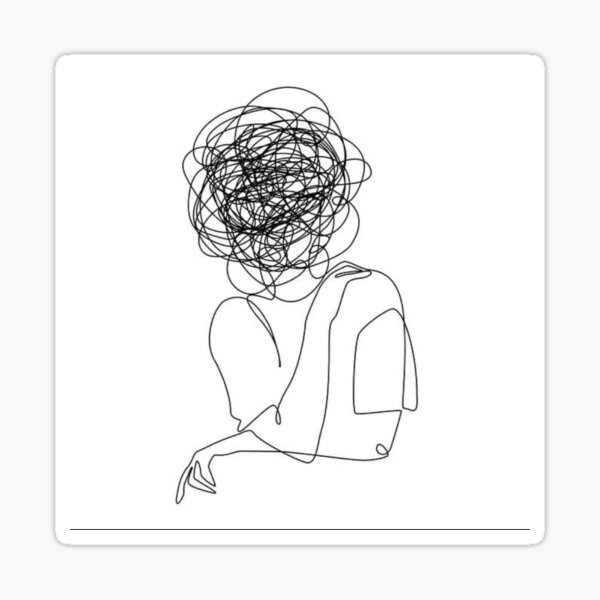

In [2]:
from IPython.display import Image, display

# Mostrar la imagen
display(Image(filename='portada.jpg'))


## Descripción

Este proyecto se centra en un análisis exploratorio de datos (EDA) que busca entender cómo afectan los trastornos alimenticios y la depresión a nivel mundial, dividiendo la población por géneros y edades. Además, el estudio incorpora factores económicos y el impacto del uso de redes sociales para explorar correlaciones clave que puedan arrojar luz sobre las dinámicas detrás de estas enfermedades. Los datos que se van a analizar abarcan de 2009 a 2021. (De forma más centralizada se verá cómo afectan estos datos en España.)

Otros de los objetivos de este análisis es ver si existe un impacto del uso de las redes sociales sobre la salud mental. Una de las dinámicas más frecuentes en estas plataformas es la comparación constante entre nuestro día a día y las versiones cuidadosamente seleccionadas y editadas de las vidas de otras personas que se muestran en cada *post*. ¿Esta comparación puede influir significativamente en la salud mental, afectando aspectos como la autoestima, la ansiedad, y la percepción del bienestar general? 

El objetivo principal es mostrar si exsiste una correlación entre el crecimineto del uso de redes sociales y el aumento de estas enfermedades mentales, aunque no se verificará ni desmentirá una causalidad directa entre ambos sucesos.

Por último, y de forma más aislada y concreta para abrir un nuevo hilo del que investigar, se usará un dataset donde se refleja un grupo de población y las distintas interacciones en las plataformas, como tiempo diario de uso, *posts*, *likes*... y la emoción que predomina. El objetivo es aportar una pequeña pincelada de como puede afectar emocionalmente a una población la interacción en redes.

## CUESTIONES PLANTEADAS

1. ¿Estas enfermedades mentales afectan más a las mujeres?,¿y a los adolescentes y adultos jóvenes?
2. ¿Existe una correlación entre el uso de RR.SS y sufrir depresión o un trastorno alimenticio?
3. ¿Cómo influye el nivel económico?
4. ¿Son los adolescentes y adultos jóvenes los grupos de edad donde más relación directa hay entre trastornos depresivos o alimenticios y el uso de redes?
5. ¿Cuantos más *likes* más felicidad?


### **Importar:**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class display(object):
    """Representador HTML de múltiples objetos"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    
import warnings
warnings.filterwarnings("ignore")

#  **FUENTE DE DATOS**

- https://ourworldindata.org/grapher/eating-disorders-prevalence-by-age?tab=table&time=2009..latest

- https://ourworldindata.org/grapher/eating-disorders-prevalence-males-vs-females?tab=table

- https://ourworldindata.org/grapher/depressive-disorders-prevalence-by-age?tab=table

- https://ourworldindata.org/grapher/depressive-disorders-prevalence-males-vs-females?tab=table



## **0. Lectura de datos**


In [3]:
s_m_09= pd.read_csv("Data/social_media(09-21).csv", sep=";")#Plación (millones) que usa RRSS en 2009 y 2021
eat_age=pd.read_csv("Data/eat_edad.csv", sep=";")# Porcentaje por edades de población que sufre trastornos alimenticios 2009 y 2021
eat_gen=pd.read_csv("Data/eat_gen.csv", sep=";")# Porcentaje por género de población que sufre trastornos alimenticios 2009 y 2021
dep_age=pd.read_csv("Data/dep_edad.csv", sep=";")# Porcentaje por edades de población que sufre depresión 2009 y 2021
dep_gen=pd.read_csv("Data/dep_gen.csv", sep=";")# Porcentaje por género de población que sufre trastornos depresión 2009 y 2021
test=pd.read_csv("Data/test.csv")

###  **0.1Limpieza de datos**

In [390]:
def multi_index(arrays,data):
    name=["Ages", "Measure"]
    tuples = list(zip(*arrays))
    multi_index = pd.MultiIndex.from_tuples(tuples, names=name)

# Asignamos los multi_index jerarquicos a los nimbre de las columnsa
    data.columns = multi_index

    #establecemos como nombre de las filas a los paises
    data = data.set_index("Country/area")

    #eliminamos la primera fila con los nombre que hemos puesto como indices
    data= data.loc["Afghanistan":, :]
    return data

In [391]:
#eliminamos ls filas y columnas que no nos interesan en el estudio
eat_age=eat_age.rename(columns={"Unnamed: 0":"","Unnamed: 2":"","Unnamed: 3":"","Unnamed: 5":"","Unnamed: 6":"","Unnamed: 8":"","Unnamed: 9":"","Unnamed: 11":"","Unnamed: 12":"","Unnamed: 14":"","Unnamed: 15":"","Unnamed: 17":"","Unnamed: 18":"","Unnamed: 21":"","Unnamed: 20":"","Unnamed: 23":"","Unnamed: 24":"","Unnamed: 26":"","Unnamed: 27":""})
arrays1 = [["Country/area","Ages 5-14","Ages 5-14","Ages 5-14","Ages 15-19","Ages 15-19","Ages 15-19", "Ages 20-24", "Ages 20-24", "Ages 20-24", "Ages 25-29", "Ages 25-29", "Ages 25-29","Ages 30-34","Ages 30-34","Ages 30-34", "Ages 35-39", "Ages 35-39", "Ages 35-39","Ages 40-44","Ages 40-44","Ages 40-44","Ages 45-49","Ages 45-49","Ages 45-49", "All ages", "All ages", "All ages"],
    ["","2009", "2021","Relative Change","2009", "2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change"],
]

eat_age=multi_index(arrays1,eat_age)
cols3 = eat_age.columns #seleccionamos todas las columnas
# Limpiar '%' y convertir a float en las columnas seleccionadas
eat_age[cols3] = eat_age[cols3].replace({'%': ''}, regex=True).astype(float)

eat_age.duplicated().sum()
eat_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, Afghanistan to World
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Ages 5-14, 2009)              222 non-null    float64
 1   (Ages 5-14, 2021)              222 non-null    float64
 2   (Ages 5-14, Relative Change)   222 non-null    float64
 3   (Ages 15-19, 2009)             222 non-null    float64
 4   (Ages 15-19, 2021)             222 non-null    float64
 5   (Ages 15-19, Relative Change)  222 non-null    float64
 6   (Ages 20-24, 2009)             222 non-null    float64
 7   (Ages 20-24, 2021)             222 non-null    float64
 8   (Ages 20-24, Relative Change)  222 non-null    float64
 9   (Ages 25-29, 2009)             222 non-null    float64
 10  (Ages 25-29, 2021)             222 non-null    float64
 11  (Ages 25-29, Relative Change)  222 non-null    float64
 12  (Ages 30-34, 2009)             222 non-null

In [392]:
eat_gen=eat_gen.rename(columns={"Unnamed: 0":"","Unnamed: 2":"","Unnamed: 3":"","Unnamed: 5":"","Unnamed: 6":"","Unnamed: 8":"","Unnamed: 9":"","Unnamed: 10":""})

arrays2 = [["Country/area","MALE","MALE","MALE","FAMEL","FAMEL","FAMEL","POPULATION","POPULATION","POPULATION","POPULATION"],
    ["","2009", "2021","Relative Change","2009", "2021","Relative Change", "2009", "2021", "Absolute Change","Relative Change"],
]
eat_gen=multi_index(arrays2,eat_gen)
cols2 = eat_gen.columns #seleccionamos todas las columnas
# Limpiar '%' y convertir a float en las columnas seleccionadas
eat_gen[cols2] = eat_gen[cols2].replace({'%': '',',': ''}, regex=True).astype(float)
eat_gen=eat_gen.drop_duplicates()
eat_gen.duplicated().sum()
eat_gen.info()


<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, Afghanistan to World
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (MALE, 2009)                   216 non-null    float64
 1   (MALE, 2021)                   216 non-null    float64
 2   (MALE, Relative Change)        216 non-null    float64
 3   (FAMEL, 2009)                  216 non-null    float64
 4   (FAMEL, 2021)                  216 non-null    float64
 5   (FAMEL, Relative Change)       216 non-null    float64
 6   (POPULATION, 2009)             261 non-null    float64
 7   (POPULATION, 2021)             260 non-null    float64
 8   (POPULATION, Absolute Change)  260 non-null    float64
 9   (POPULATION, Relative Change)  260 non-null    float64
dtypes: float64(10)
memory usage: 23.1+ KB


In [393]:
#eliminamos ls filas y columnas que no nos interesan en el estudio
dep_age=dep_age.rename(columns={"Unnamed: 0":"","Unnamed: 2":"","Unnamed: 3":"","Unnamed: 5":"","Unnamed: 6":"","Unnamed: 8":"","Unnamed: 9":"","Unnamed: 11":"","Unnamed: 12":"","Unnamed: 14":"","Unnamed: 15":"","Unnamed: 17":"","Unnamed: 18":"","Unnamed: 21":"","Unnamed: 20":"","Unnamed: 23":"","Unnamed: 24":"","Unnamed: 26":"","Unnamed: 27":""})
dep_all=dep_age.loc[:,["All ages"]]
dep_age=dep_age.loc[:,:"Ages 50-54"].drop(columns=["Ages 50-54"])
arrays3 = [["Country/area","Ages 5-14","Ages 5-14","Ages 5-14","Ages 15-19","Ages 15-19","Ages 15-19", "Ages 20-24", "Ages 20-24", "Ages 20-24", "Ages 25-29", "Ages 25-29", "Ages 25-29","Ages 30-34","Ages 30-34","Ages 30-34", "Ages 35-39", "Ages 35-39", "Ages 35-39","Ages 40-44","Ages 40-44","Ages 40-44","Ages 45-49","Ages 45-49","Ages 45-49"],
    ["","2009", "2021","Relative Change","2009", "2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change","2009","2021","Relative Change", "2009", "2021","Relative Change"],
]
dep_age=multi_index(arrays3,dep_age)
cols = dep_age.columns #seleccionamos todas las columnas

# Limpiar '%' y convertir a float en las columnas seleccionadas
dep_age[cols] = dep_age[cols].replace('%', '', regex=True).astype(float)

dep_age.duplicated().sum()
dep_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223 entries, Afghanistan to World
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Ages 5-14, 2009)              222 non-null    float64
 1   (Ages 5-14, 2021)              222 non-null    float64
 2   (Ages 5-14, Relative Change)   222 non-null    float64
 3   (Ages 15-19, 2009)             222 non-null    float64
 4   (Ages 15-19, 2021)             222 non-null    float64
 5   (Ages 15-19, Relative Change)  222 non-null    float64
 6   (Ages 20-24, 2009)             222 non-null    float64
 7   (Ages 20-24, 2021)             222 non-null    float64
 8   (Ages 20-24, Relative Change)  222 non-null    float64
 9   (Ages 25-29, 2009)             222 non-null    float64
 10  (Ages 25-29, 2021)             222 non-null    float64
 11  (Ages 25-29, Relative Change)  222 non-null    float64
 12  (Ages 30-34, 2009)             222 non-null

In [394]:
#eliminamos ls filas y columnas que no nos interesan en el estudio
dep_gen=dep_gen.rename(columns={"Unnamed: 0":"","Unnamed: 2":"","Unnamed: 3":"","Unnamed: 5":"","Unnamed: 6":"","Unnamed: 8":"","Unnamed: 9":"","Unnamed: 10":""})

arrays4 = [["Country/area","MALE","MALE","MALE","FAMEL","FAMEL","FAMEL","POPULATION","POPULATION","POPULATION","POPULATION"],
    ["","2009", "2021","Relative Change","2009", "2021","Relative Change", "2009", "2021", "Absolute Change","Relative Change"],
]
dep_gen=multi_index(arrays4,dep_gen)
cols1 = dep_gen.columns #seleccionamos todas las columnas
# Limpiar '%' y convertir a float en las columnas seleccionadas
dep_gen[cols1] = dep_gen[cols1].replace({'%': '',',': ''}, regex=True).astype(float)
dep_gen=dep_gen.drop_duplicates()
dep_gen.duplicated().sum()
dep_gen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269 entries, Afghanistan to World
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (MALE, 2009)                   216 non-null    float64
 1   (MALE, 2021)                   216 non-null    float64
 2   (MALE, Relative Change)        216 non-null    float64
 3   (FAMEL, 2009)                  216 non-null    float64
 4   (FAMEL, 2021)                  216 non-null    float64
 5   (FAMEL, Relative Change)       216 non-null    float64
 6   (POPULATION, 2009)             261 non-null    float64
 7   (POPULATION, 2021)             260 non-null    float64
 8   (POPULATION, Absolute Change)  260 non-null    float64
 9   (POPULATION, Relative Change)  260 non-null    float64
dtypes: float64(10)
memory usage: 23.1+ KB


In [395]:
s_m_09= s_m_09.set_index("Country/area")
cols4 = s_m_09.columns #seleccionamos todas las columnas
# Limpiar '%' y convertir a float en las columnas seleccionadas
s_m_09[cols4] =s_m_09[cols4].replace({'%': '',",":""}, regex=True).astype(float)
s_m_09.info()


<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, Afghanistan to World
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2009             213 non-null    float64
 1   2021             194 non-null    float64
 2   Absolute Change  191 non-null    float64
 3   Relative Change  191 non-null    float64
dtypes: float64(4)
memory usage: 8.8+ KB


Los datos que tenemos nulos se deben a missing values en algunos paises. No vamos a elimirar por ahora ninguna fila ya que en algunos casos tendremos valores en la división por continentes o en algunos paises de alguna columna con los que podemos obtener resultados válidos al hacer agrupaciones.

In [396]:
test.drop(columns="User_ID",inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         103 non-null    int64 
 1   Gender                      103 non-null    object
 2   Platform                    103 non-null    object
 3   Daily_Usage_Time (minutes)  103 non-null    int64 
 4   Posts_Per_Day               103 non-null    int64 
 5   Likes_Received_Per_Day      103 non-null    int64 
 6   Comments_Received_Per_Day   103 non-null    int64 
 7   Messages_Sent_Per_Day       103 non-null    int64 
 8   Dominant_Emotion            103 non-null    object
dtypes: int64(6), object(3)
memory usage: 7.4+ KB


**NOTA:** Tenemos datos nulos si dividimos la población por géneros. No eliminamos las filas ya que estos missing vaules son o de paises que no tenemos datos completos (en los casos donde puede influir hacemos una excepción para esos Nan) o de las filas de los continentes donde no tenemos datos por géneros pero si de la población total, valores necesarios durante el EDA (los missing values nos afectará en ningún análisis).

### **0.2.Descripción general de cada dataset**

In [397]:
round(dep_gen.describe(),2)

Ages       MALE                           FAMEL                          \
Measure    2009    2021 Relative Change    2009    2021 Relative Change   
count    216.00  216.00          216.00  216.00  216.00          216.00   
mean       3.08    3.45           12.52    4.61    5.22           13.92   
std        0.87    0.94            6.22    1.24    1.33            8.20   
min        1.30    1.50           -6.00    1.90    2.30           -8.00   
25%        2.50    2.80            8.00    3.60    4.40            7.00   
50%        2.90    3.30           12.00    4.50    5.30           13.00   
75%        3.52    4.00           17.00    5.50    6.02           20.00   
max        7.10    6.90           28.00    8.80    9.80           32.00   

Ages       POPULATION                                                
Measure          2009          2021 Absolute Change Relative Change  
count    2.610000e+02  2.600000e+02    2.600000e+02          260.00  
mean     1.470764e+08  1.687738e+08    2.112204e+07           16.11  
std      6.348715e+08  7.254979e+08    9.336660e+07           17.85  
min      2.400000e+01  2.400000e+01   -2.513130e+06          -20.00  
25%      3.849640e+05  5.224510e+05    3.778250e+03            3.00  
50%      5.671245e+06  6.827958e+06    6.025160e+05           13.50  
75%      2.746610e+07  3.425337e+07    4.983389e+06           27.00  
max      6.932766e+09  7.954448e+09    1.021682e+09           77.00

In [398]:
round(dep_age.describe(),2)

Ages    Ages 5-14                         Ages 15-19                          \
Measure      2009    2021 Relative Change       2009    2021 Relative Change   
count      222.00  222.00          222.00     222.00  222.00          222.00   
mean         0.64    0.83           31.34       3.08    3.87           26.43   
std          0.29    0.39           17.32       1.10    1.38           14.38   
min          0.28    0.27          -31.00       1.37    1.37          -22.00   
25%          0.43    0.56           21.00       2.28    2.93           17.00   
50%          0.52    0.66           31.50       2.80    3.40           26.00   
75%          0.84    1.07           42.00       3.76    4.70           36.00   
max          1.64    2.23           86.00       9.18   11.92           65.00   

Ages    Ages 20-24                         Ages 25-29  ...      Ages 30-34  \
Measure       2009    2021 Relative Change       2009  ... Relative Change   
count       222.00  222.00          222.00     222.00  ...          222.00   
mean          4.36    5.27           21.84       4.64  ...           16.56   
std           1.39    1.62           12.07       1.38  ...            9.01   
min           1.92    2.05           -9.00       2.27  ...           -3.00   
25%           3.45    4.11           13.00       3.62  ...           10.00   
50%           4.08    5.00           20.50       4.41  ...           16.00   
75%           4.93    6.03           29.00       5.38  ...           22.00   
max          12.42   15.44           53.00      11.31  ...           38.00   

Ages    Ages 35-39                         Ages 40-44                          \
Measure       2009    2021 Relative Change       2009    2021 Relative Change   
count       222.00  222.00          222.00     222.00  222.00          222.00   
mean          5.35    6.07           13.91       5.72    6.36           11.70   
std           1.49    1.63            8.09       1.53    1.64            7.39   
min           2.16    2.44           -5.00       2.11    2.36           -7.00   
25%           4.15    4.74            8.00       4.55    5.06            6.00   
50%           5.22    6.00           14.00       5.58    6.38           11.00   
75%           6.29    6.92           19.00       6.67    7.34           16.00   
max          10.78   11.39           36.00      11.34   11.21           42.00   

Ages    Ages 45-49                          
Measure       2009    2021 Relative Change  
count       222.00  222.00          222.00  
mean          5.94    6.53           10.27  
std           1.53    1.60            6.49  
min           2.09    2.33           -7.00  
25%           4.81    5.30            6.00  
50%           5.65    6.31           10.00  
75%           6.97    7.48           14.75  
max          11.37   11.74           32.00  

[8 rows x 24 columns]

In [399]:
round(eat_age.describe(),2)

Ages    Ages 5-14                         Ages 15-19                          \
Measure      2009    2021 Relative Change       2009    2021 Relative Change   
count      222.00  222.00          222.00     222.00  222.00          222.00   
mean         0.08    0.08            4.83       0.48    0.50            5.72   
std          0.05    0.05            6.46       0.29    0.29            7.46   
min          0.02    0.02          -20.00       0.13    0.13          -27.00   
25%          0.04    0.04            1.00       0.27    0.30            1.00   
50%          0.06    0.06            4.00       0.38    0.41            5.00   
75%          0.09    0.08            8.75       0.59    0.59           10.00   
max          0.28    0.30           25.00       1.85    1.87           28.00   

Ages    Ages 20-24                         Ages 25-29  ...      Ages 35-39  \
Measure       2009    2021 Relative Change       2009  ... Relative Change   
count       222.00  222.00          222.00     222.00  ...          222.00   
mean          0.66    0.69            6.64       0.62  ...            6.64   
std           0.42    0.42            8.35       0.41  ...            8.32   
min           0.17    0.17          -29.00       0.15  ...          -31.00   
25%           0.36    0.39            2.00       0.33  ...            1.00   
50%           0.51    0.55            6.00       0.47  ...            6.00   
75%           0.82    0.86           12.00       0.77  ...           11.00   
max           2.82    3.13           31.00       2.79  ...           31.00   

Ages    Ages 40-44                         Ages 45-49                          \
Measure       2009    2021 Relative Change       2009    2021 Relative Change   
count       222.00  222.00          222.00     222.00  222.00          222.00   
mean          0.21    0.23            7.38       0.11    0.11            8.52   
std           0.15    0.15            9.45       0.09    0.09           10.51   
min           0.04    0.04          -33.00       0.02    0.02          -36.00   
25%           0.11    0.12            2.00       0.05    0.06            3.00   
50%           0.16    0.17            7.00       0.07    0.08            8.00   
75%           0.28    0.28           12.00       0.14    0.14           14.00   
max           0.94    1.00           36.00       0.51    0.58           42.00   

Ages    All ages                          
Measure     2009    2021 Relative Change  
count     222.00  222.00          222.00  
mean        0.24    0.24            1.09  
std         0.14    0.13           10.72  
min         0.06    0.06          -39.00  
25%         0.14    0.14           -5.00  
50%         0.19    0.19            1.00  
75%         0.32    0.30            8.00  
max         0.92    0.96           35.00  

[8 rows x 27 columns]

In [400]:
round(eat_gen.describe(),2)

Ages       MALE                           FAMEL                          \
Measure    2009    2021 Relative Change    2009    2021 Relative Change   
count    216.00  216.00          216.00  216.00  216.00          216.00   
mean       0.15    0.16            6.56    0.31    0.32            6.79   
std        0.08    0.09            7.74    0.23    0.23            8.50   
min        0.00    0.00          -29.00    0.10    0.10          -31.00   
25%        0.10    0.10            2.00    0.20    0.20            2.00   
50%        0.10    0.10            6.00    0.20    0.20            6.00   
75%        0.20    0.20           11.00    0.40    0.40           11.00   
max        0.70    0.80           30.00    1.30    1.40           30.00   

Ages       POPULATION                                                
Measure          2009          2021 Absolute Change Relative Change  
count    2.610000e+02  2.600000e+02    2.600000e+02          260.00  
mean     1.470764e+08  1.687738e+08    2.112204e+07           16.11  
std      6.348715e+08  7.254979e+08    9.336660e+07           17.85  
min      2.400000e+01  2.400000e+01   -2.513130e+06          -20.00  
25%      3.849640e+05  5.224510e+05    3.778250e+03            3.00  
50%      5.671245e+06  6.827958e+06    6.025160e+05           13.50  
75%      2.746610e+07  3.425337e+07    4.983389e+06           27.00  
max      6.932766e+09  7.954448e+09    1.021682e+09           77.00

In [401]:
round(s_m_09.describe())

2009          2021  Absolute Change  Relative Change
count  2.130000e+02  1.940000e+02     1.910000e+02            191.0
mean   3.403532e+07  1.023455e+08     6.603120e+07            269.0
std    1.581879e+08  4.646057e+08     3.125835e+08            286.0
min    0.000000e+00  6.885000e+03     5.971000e+03              4.0
25%    1.062910e+05  1.199595e+06     6.974760e+05             74.0
50%    9.253040e+05  5.162318e+06     3.384330e+06            172.0
75%    6.129455e+06  2.330309e+07     1.383823e+07            381.0
max    1.772016e+09  5.016978e+09     3.244962e+09           2185.0

In [402]:
test.describe()

Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  103.000000                  103.000000     103.000000   
mean    27.368932                   88.009709       2.864078   
std      3.624509                   33.979087       1.732326   
min     21.000000                   40.000000       1.000000   
25%     24.500000                   60.000000       1.000000   
50%     27.000000                   75.000000       2.000000   
75%     30.000000                  105.000000       4.000000   
max     35.000000                  200.000000       8.000000   

       Likes_Received_Per_Day  Comments_Received_Per_Day  \
count              103.000000                 103.000000   
mean                33.456311                  13.766990   
std                 23.031426                   8.107372   
min                  5.000000                   2.000000   
25%                 15.000000                   7.000000   
50%                 27.000000                  12.000000   
75%                 40.000000                  19.500000   
max                110.000000                  40.000000   

       Messages_Sent_Per_Day  
count             103.000000  
mean               20.388350  
std                 7.372755  
min                10.000000  
25%                15.000000  
50%                20.000000  
75%                25.000000  
max                45.000000

### **Datos que necesitaremos posteriormente**

In [403]:
'''Agrupacion de paises por contientes'''
cont_paises={"Asia":["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", 
        "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", 
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
        "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", 
        "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", 
        "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", 
        "Sri Lanka", "Syria","Tajikistan", "Thailand", "Turkey", 
        "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Yemen"],

"Europe":["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", 
        "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", 
        "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", "Ireland", 
        "Israel", "Italy", "Kazakhstan", "Latvia", "Lithuania", 
        "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", 
        "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", 
        "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", 
        "Ukraine", "United Kingdom"],

"Africa":["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cape Verde", 
        "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo", 
        "Democratic Republic of Congo", "Djibouti", "Egypt", "Equatorial Guinea", 
        "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", 
        "Guinea-Bissau", "Cote d'Ivoire", "Kenya", "Lesotho", "Liberia", "Libya", 
        "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", 
        "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", 
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", 
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"],

"North America":["Antigua and Barbuda","Bahamas", "Barbados","Canada", "Cuba", "Costa Rica",
                  "Dominica", "Grenada", "Trinidad and Tobago", "Jamaica", "Panama","Dominican Republic", "United States", "Mexico"],

"South America":["Argentina", "Belize", "Bolivia", 
        "Brazil", "Chile", "Colombia",
         "Ecuador", "El Salvador","Guatemala", "Guyana", 
        "Haiti", "Honduras", "Nicaragua", "Paraguay", "Peru", 
        "Puerto Rico", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", 
        "Suriname", "Uruguay", "Venezuela"],

"Oceania":["American Samoa", "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia (country)", 
        "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", 
        "Tonga", "Tuvalu", "Vanuatu"
]}
#hago una lista con los continentes que son las claves del diccionario
cont=["Africa", "Asia", "North America", "Oceania", "South America", "Europe"]
'''POBLACIONES DE 2009 Y 2021 POR CONTINENTES'''
#n la columna de POPULATION de los dataset de genero tenemos la población total de cada región
pob_09=dep_gen.loc[["Africa", "Asia", "North America", "Oceania", "South America", "Europe"],("POPULATION","2009")]
pob_21=dep_gen.loc[["Africa", "Asia", "North America", "Oceania", "South America", "Europe"],("POPULATION","2021")]

eat_all=eat_age.loc[:,"All ages"]
eat_age=eat_age.drop(columns="All ages")

# **1.Análisis de los casos de depresión, desórdenes alimenticios**

1. *Comenzamos obteniendo los maximos y minimos del dataFrame del transtorno depresivo(edades y género) y desórdenes alimenticios(edades y género).*

In [404]:
#Obtenemos las areas donde se han dado los max valores de depresion en cada edad 
max_21_area=pd.DataFrame((dep_age.loc[dep_age[:]["2021"].idxmax()]).idxmax()).T
max_21_area=max_21_area[:]["2021"]

max_09_area=pd.DataFrame((dep_age.loc[dep_age[:]["2009"].idxmax()]).idxmax()).T
max_09_area=max_09_area[:]["2021"]
#obtenemos el maximo de los datos de 2021 y 2009
max_21=pd.DataFrame(dep_age[:]["2021"].max()).T
max_09=pd.DataFrame(dep_age[:]["2009"].max()).T

#Obtenemos las areas donde se han dado los max valores de desordenes alimenticios en cada edad 
max_21_area_eat=pd.DataFrame((eat_age.loc[eat_age[:]["2021"].idxmax()]).idxmax()).T
max_21_area_eat=max_21_area_eat[:]["2021"]

max_09_area_eat=pd.DataFrame((eat_age.loc[eat_age[:]["2009"].idxmax()]).idxmax()).T
max_09_area_eat=max_09_area_eat[:]["2021"]
#obtenemos el maximo de los datos de 2021 y 2009
max_21_eat=pd.DataFrame(eat_age[:]["2021"].max()).T
max_09_eat=pd.DataFrame(eat_age[:]["2009"].max()).T

display("max_21_eat","max_09_eat","max_21","max_09","max_21_area_eat","max_09_area_eat","max_21_area","max_09_area")

max_21_eat
Measure  2021  2021  2021  2021  2021  2021  2021  2021
0         0.3  1.87  3.13   3.1  2.49  1.71   1.0  0.58

max_09_eat
Measure  2009  2009  2009  2009  2009  2009  2009  2009
0        0.28  1.85  2.82  2.79  2.34  1.64  0.94  0.51

max_21
Measure  2021   2021   2021   2021   2021   2021   2021   2021
0        2.23  11.92  15.44  13.72  12.24  11.39  11.21  11.74

max_09
Measure  2009  2009   2009   2009   2009   2009   2009   2009
0        1.64  9.18  12.42  11.31  10.17  10.78  11.34  11.37

max_21_area_eat
Measure    2021       2021       2021       2021       2021       2021  \
0        Monaco  Australia  Australia  Australia  Australia  Australia   

Measure       2021    2021  
0        Australia  Monaco  

max_09_area_eat
Measure    2021       2021       2021       2021       2021       2021  \
0        Monaco  Australia  Australia  Australia  Australia  Australia   

Measure       2021    2021  
0        Australia  Monaco  

max_21_area
Measure     2021       2021       2021       2021       2021       2021  \
0        Tunisia  Greenland  Greenland  Greenland  Greenland  Greenland   

Measure     2021    2021  
0        Lesotho  Uganda  

max_09_area
Measure       2021       2021       2021       2021       2021       2021  \
0        Greenland  Greenland  Greenland  Greenland  Greenland  Greenland   

Measure       2021    2021  
0        Palestine  Uganda

Los maximos de desórdenes alimenticios se dan en Mónaco y Autralia, mientras que de depresión destacan en Greenland.

En ambos transtornos vemos que tienen mayor incidencia en la población de 20-29 años, concretamente alcanzan su cifra más alta en edades de 20 a 24 años

In [405]:
#Obtenemos las areas donde se han dado los  min valores de depresion en cada edad 
min_21_area=pd.DataFrame((dep_age.loc[dep_age[:]["2021"].idxmin()]).idxmin()).T
min_21_area=min_21_area[:]["2021"]

min_09_area=pd.DataFrame((dep_age.loc[dep_age[:]["2009"].idxmin()]).idxmin()).T
min_09_area=min_09_area[:]["2021"]
#obtenemos el minimo de los datos de 2021 y 2009
min_21=pd.DataFrame(dep_age[:]["2021"].min()).T
min_09=pd.DataFrame(dep_age[:]["2009"].min()).T


#Obtenemos las areas donde se han dado los min valores de desordenes alimenticios en cada edad 
min_21_area_eat=pd.DataFrame((eat_age.loc[eat_age[:]["2021"].idxmin()]).idxmin()).T
min_21_area_eat=min_21_area_eat[:]["2021"]

min_09_area_eat=pd.DataFrame((eat_age.loc[eat_age[:]["2009"].idxmin()]).idxmin()).T
min_09_area_eat=min_09_area_eat[:]["2021"]
#obtenemos el minimo de los datos de 2021 y 2009
min_21_eat=pd.DataFrame(eat_age[:]["2021"].min()).T
min_09_eat=pd.DataFrame(eat_age[:]["2009"].min()).T

display("min_21_eat","min_09_eat","min_21","min_09","min_21_area_eat","min_09_area_eat","min_21_area","min_09_area")


min_21_eat
Measure  2021  2021  2021  2021  2021  2021  2021  2021
0        0.02  0.13  0.17  0.15  0.12  0.09  0.04  0.02

min_09_eat
Measure  2009  2009  2009  2009  2009  2009  2009  2009
0        0.02  0.13  0.17  0.15  0.12  0.09  0.04  0.02

min_21
Measure  2021  2021  2021  2021  2021  2021  2021  2021
0        0.27  1.37  2.05  2.48  2.57  2.44  2.36  2.33

min_09
Measure  2009  2009  2009  2009  2009  2009  2009  2009
0        0.28  1.37  1.92  2.27  2.19  2.16  2.11  2.09

min_21_area_eat
Measure     2021     2021     2021     2021     2021     2021     2021  \
0        Somalia  Somalia  Somalia  Somalia  Somalia  Somalia  Somalia   

Measure     2021  
0        Somalia  

min_09_area_eat
Measure     2021     2021     2021     2021     2021     2021     2021  \
0        Somalia  Somalia  Somalia  Somalia  Somalia  Somalia  Somalia   

Measure     2021  
0        Somalia  

min_21_area
Measure   2021   2021    2021   2021    2021    2021    2021    2021
0        China  China  Taiwan  China  Brunei  Brunei  Brunei  Brunei

min_09_area
Measure    2021    2021    2021    2021    2021    2021    2021    2021
0        Taiwan  Taiwan  Taiwan  Taiwan  Brunei  Brunei  Brunei  Brunei

Nuevamente vemos que las cifras más altas dentro de los mínimos se dan en edades de 20-29 años y las más bajas de 5-14.

Por otro lado, si nos fijamos por areas vemos que el país menos afectado en desordenes alimenticios es Somalia y por trastorno depresivo destacan Taiwan, Brunei y China

2. *Lo siguiente será crear un nuevo DataFrame donde tengamos separados los valosres por años. Para eso vamos a usar **.xs(año,nivel del MultiIndex)***

In [406]:
dep_age_09=(dep_age.T).xs("2009",level="Measure")
#Traspongo la tabla y creo un nuevo DataFrame con todas las edades, paises y los datos de 2009
dep_age_21=(dep_age.T).xs("2021",level="Measure")

'''Hacemos la media por edades y añadimos la columna a los dataframe'''
#Ponemos que sea hasta "Zimbabwe" para que haga la media de los paises
dep_age_21["media"] = dep_age_21.loc[:, :"Zimbabwe"].mean(axis=1)
dep_age_09["media"]=dep_age_09.loc[:, :"Zimbabwe"].mean(axis='columns')
#Hacemos lo mismo con los max y minimos
dep_age_21["min"]=dep_age_21.loc[:, :"Zimbabwe"].min(axis='columns')
dep_age_09["min"]=dep_age_09.loc[:, :"Zimbabwe"].min(axis='columns')

dep_age_21["max"]=dep_age_21.loc[:, :"Zimbabwe"].max(axis='columns')
dep_age_09["max"]=dep_age_09.loc[:, :"Zimbabwe"].max(axis='columns')

'''Hacemos lo mismo para los desordenes alimenticios'''
eat_age_09=(eat_age.T).xs("2009",level="Measure")
#Traspongo la tabla y creo un nuevo DataFrame con todas las edades, paises y los datos de 2009
eat_age_21=(eat_age.T).xs("2021",level="Measure")
#Hacemos la media por edades y añadimos la columna a los dataframe
eat_age_21["media"] = eat_age_21.loc[:, :"Zimbabwe"].mean(axis=1)
eat_age_09["media"]=eat_age_09.loc[:, :"Zimbabwe"].mean(axis='columns')
#Hacemos lo mismo con los max y minimos
eat_age_21["min"]=eat_age_21.loc[:, :"Zimbabwe"].min(axis='columns')
eat_age_09["min"]=eat_age_09.loc[:, :"Zimbabwe"].min(axis='columns')

eat_age_21["max"]=eat_age_21.loc[:, :"Zimbabwe"].max(axis='columns')
eat_age_09["max"]=eat_age_09.loc[:, :"Zimbabwe"].max(axis='columns')

'''Veamos los mismo estadísticos por género'''
dep_gen_09=(dep_gen[["MALE","FAMEL"]].T).xs("2009",level="Measure")
#Traspongo la tabla y creo un nuevo DataFrame con todas los generos, paises y los datos de 2009
dep_gen_21=(dep_gen[["MALE","FAMEL"]].T).xs("2021",level="Measure")
#Hacemos la media por géneros y añadimos la columna a los dataframe
dep_gen_21_p=(dep_gen_21.loc[:, :"Zimbabwe"]).dropna(axis=1, how='all')#eliminamos los paises sin datos para que no afecte a la media
dep_gen_09_p=(dep_gen_21_p.loc[:, :"Zimbabwe"]).dropna(axis=1, how='all')
dep_gen_21_p["media"]=dep_gen_21_p.mean(axis='columns')
dep_gen_09_p["media"]=dep_gen_09_p.mean(axis='columns')
'''--------Desviación estamdar por continentes---------'''#esto nos va a permitir tener una vision mas acertada del cambio entre un año y otro por contientes
dev_dep_gen_21_p_africa=dep_gen_21_p.loc[:,cont_paises["Africa"]].std()
dev_dep_gen_21_p_asia=dep_gen_21_p.loc[:,cont_paises["Asia"]].std()
dev_dep_gen_21_p_oceania=dep_gen_21_p.loc[:,cont_paises["Oceania"]].std()
dev_dep_gen_21_p_sa=dep_gen_21_p.loc[:,cont_paises["South America"]].std()
dev_dep_gen_21_p_na=dep_gen_21_p.loc[:,cont_paises["North America"]].std()
dev_dep_gen_21_p_eu=dep_gen_21_p.loc[:,cont_paises["Europe"]].std()

dev_dep_gen_09_p_africa=dep_gen_09_p.loc[:,cont_paises["Africa"]].std()
dev_dep_gen_09_p_asia=dep_gen_09_p.loc[:,cont_paises["Asia"]].std()
dev_dep_gen_09_p_oceania=dep_gen_09_p.loc[:,cont_paises["Oceania"]].std()
dev_dep_gen_09_p_sa=dep_gen_09_p.loc[:,cont_paises["South America"]].std()
dev_dep_gen_09_p_na=dep_gen_09_p.loc[:,cont_paises["North America"]].std()
dev_dep_gen_09_p_eu=dep_gen_09_p.loc[:,cont_paises["Europe"]].std()

dev_dep_age_21_p_africa=dep_age_21.loc[:,cont_paises["Africa"]].std()
dev_dep_age_21_p_asia=dep_age_21.loc[:,cont_paises["Asia"]].std()
dev_dep_age_21_p_oceania=dep_age_21.loc[:,cont_paises["Oceania"]].std()
dev_dep_age_21_p_sa=dep_age_21.loc[:,cont_paises["South America"]].std()
dev_dep_age_21_p_na=dep_age_21.loc[:,cont_paises["North America"]].std()
dev_dep_age_21_p_eu=dep_age_21.loc[:,cont_paises["Europe"]].std()

dev_dep_age_09_p_africa=dep_age_09.loc[:,cont_paises["Africa"]].std()
dev_dep_age_09_p_asia=dep_age_09.loc[:,cont_paises["Asia"]].std()
dev_dep_age_09_p_oceania=dep_age_09.loc[:,cont_paises["Oceania"]].std()
dev_dep_age_09_p_sa=dep_age_09.loc[:,cont_paises["South America"]].std()
dev_dep_age_09_p_na=dep_age_09.loc[:,cont_paises["North America"]].std()
dev_dep_age_09_p_eu=dep_age_09.loc[:,cont_paises["Europe"]].std()
'''-----------------'''
#Hacemos lo mismo con los max y minimos
dep_gen_21_p["min"]=dep_gen_21_p.min(axis='columns')
dep_gen_09_p["min"]=dep_gen_09_p.min(axis='columns')

dep_gen_21_p["max"]=dep_gen_21_p.max(axis='columns')
dep_gen_09_p["max"]=dep_gen_09_p.max(axis='columns')

'''Hacemos el mismo procedimiento con eat_gen'''
eat_gen_09=(eat_gen[["MALE","FAMEL"]].T).xs("2009",level="Measure")
#Traspongo la tabla y creo un nuevo DataFrame con todas los generos, paises y los datos de 2009
eat_gen_21=(eat_gen[["MALE","FAMEL"]].T).xs("2021",level="Measure")

eat_gen_21_p=(eat_gen_21.loc[:, :"Zimbabwe"]).dropna(axis=1, how='all')#eliminamos los paises sin datos para que no afecte a la media
eat_gen_09_p=(eat_gen_09.loc[:, :"Zimbabwe"]).dropna(axis=1, how='all')
#Hacemos la media por géneros y añadimos la columna a los dataframe
eat_gen_21_p["media"]=eat_gen_21_p.mean(axis='columns')
eat_gen_09_p["media"]=eat_gen_09_p.mean(axis='columns')
#Hacemos lo mismo con los max y minimos
eat_gen_21_p["min"]=eat_gen_21_p.min(axis='columns')
eat_gen_09_p["min"]=eat_gen_09_p.min(axis='columns')

eat_gen_21_p["max"]=eat_gen_21_p.max(axis='columns')
eat_gen_09_p["max"]=eat_gen_09_p.max(axis='columns')

'''--------Desviación estamdar por continentes---------'''
dev_eat_gen_21_p_africa=eat_gen_21_p.loc[:,cont_paises["Africa"]].std()
dev_eat_gen_21_p_asia=eat_gen_21_p.loc[:,cont_paises["Asia"]].std()
dev_eat_gen_21_p_oceania=eat_gen_21_p.loc[:,cont_paises["Oceania"]].std()
dev_eat_gen_21_p_sa=eat_gen_21_p.loc[:,cont_paises["South America"]].std()
dev_eat_gen_21_p_na=eat_gen_21_p.loc[:,cont_paises["North America"]].std()
dev_eat_gen_21_p_eu=eat_gen_21_p.loc[:,cont_paises["Europe"]].std()

dev_eat_gen_09_p_africa=eat_gen_09_p.loc[:,cont_paises["Africa"]].std()
dev_eat_gen_09_p_asia=eat_gen_09_p.loc[:,cont_paises["Asia"]].std()
dev_eat_gen_09_p_oceania=eat_gen_09_p.loc[:,cont_paises["Oceania"]].std()
dev_eat_gen_09_p_sa=eat_gen_09_p.loc[:,cont_paises["South America"]].std()
dev_eat_gen_09_p_na=eat_gen_09_p.loc[:,cont_paises["North America"]].std()
dev_eat_gen_09_p_eu=eat_gen_09_p.loc[:,cont_paises["Europe"]].std()
'''-----------------------------'''
dev_eat_age_21_p_africa=eat_age_21.loc[:,cont_paises["Africa"]].std()
dev_eat_age_21_p_asia=eat_age_21.loc[:,cont_paises["Asia"]].std()
dev_eat_age_21_p_oceania=eat_age_21.loc[:,cont_paises["Oceania"]].std()
dev_eat_age_21_p_sa=eat_age_21.loc[:,cont_paises["South America"]].std()
dev_eat_age_21_p_na=eat_age_21.loc[:,cont_paises["North America"]].std()
dev_eat_age_21_p_eu=eat_age_21.loc[:,cont_paises["Europe"]].std()

dev_eat_age_09_p_africa=eat_age_09.loc[:,cont_paises["Africa"]].std()
dev_eat_age_09_p_asia=eat_age_09.loc[:,cont_paises["Asia"]].std()
dev_eat_age_09_p_oceania=eat_age_09.loc[:,cont_paises["Oceania"]].std()
dev_eat_age_09_p_sa=eat_age_09.loc[:,cont_paises["South America"]].std()
dev_eat_age_09_p_na=eat_age_09.loc[:,cont_paises["North America"]].std()
dev_eat_age_09_p_eu=eat_age_09.loc[:,cont_paises["Europe"]].std()

Comenzamos viendo una desviación estandar de los datos, es decir, empezamos viendo a nivel mundial y luego de forma más, específica en un continente(solo lo veremos en uno de ellos para explicar mejor los gráficos generales).

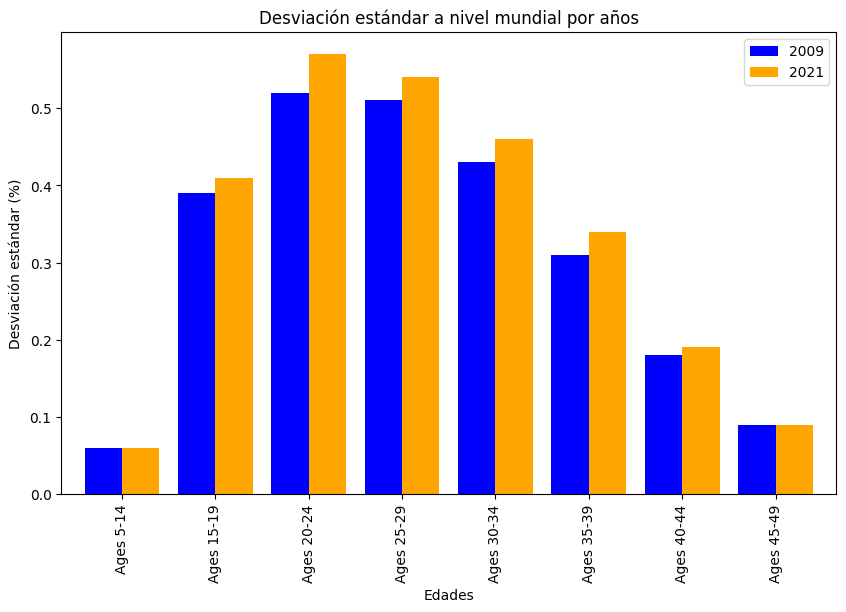

In [407]:
a=pd.concat([eat_age_09["World"].T, eat_age_21["World"].T],axis=1)
a.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Edades")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar a nivel mundial por años")
plt.legend(labels=["2009","2021"]);

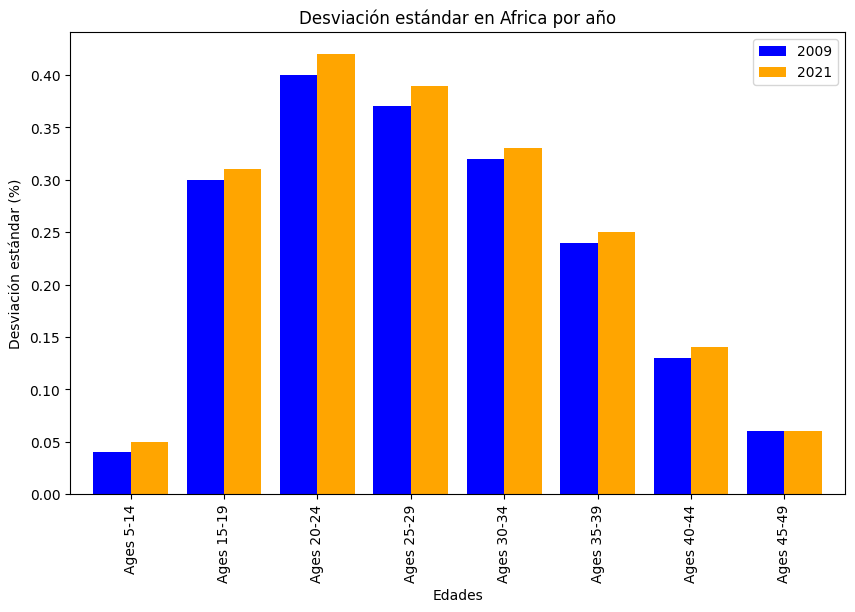

In [408]:
x=pd.concat([eat_age_09["Africa"].T, eat_age_21["Africa"].T],axis=1)
x.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Edades")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar en Africa por año")
plt.legend(labels=["2009","2021"]);

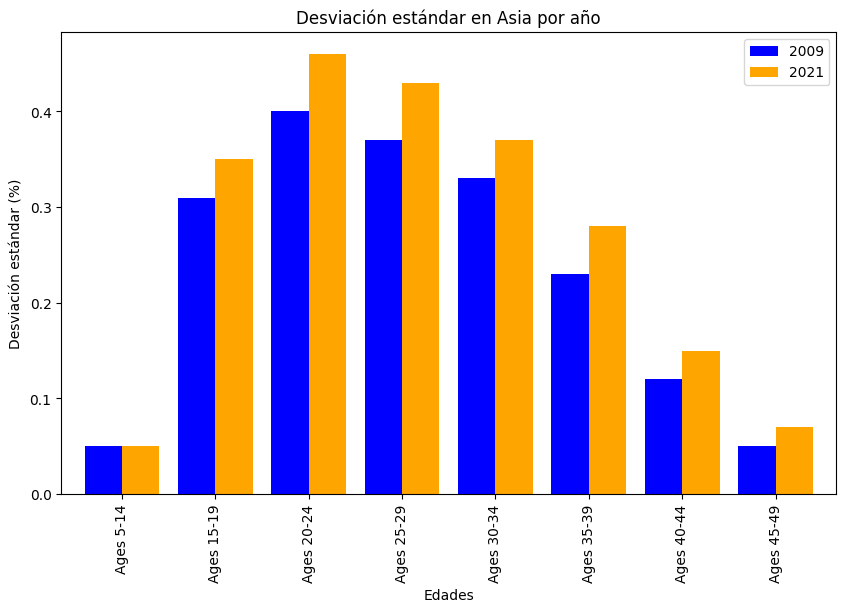

In [409]:
asi=pd.concat([eat_age_09["Asia"].T, eat_age_21["Asia"].T],axis=1)
asi.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Edades")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar en Asia por año")
plt.legend(labels=["2009","2021"]);

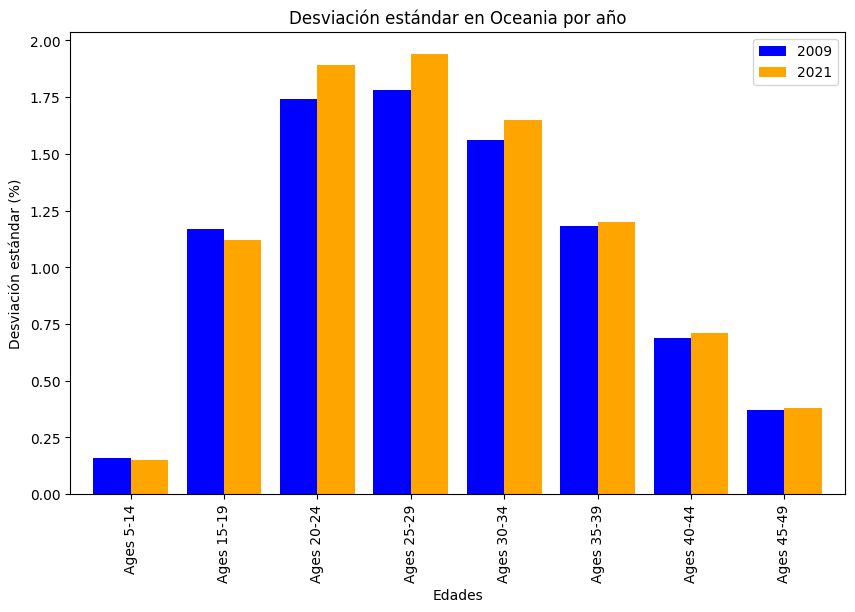

In [410]:
x=pd.concat([eat_age_09["Oceania"].T, eat_age_21["Oceania"].T],axis=1)
x.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Edades")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar en Oceania por año")
plt.legend(labels=["2009","2021"]);

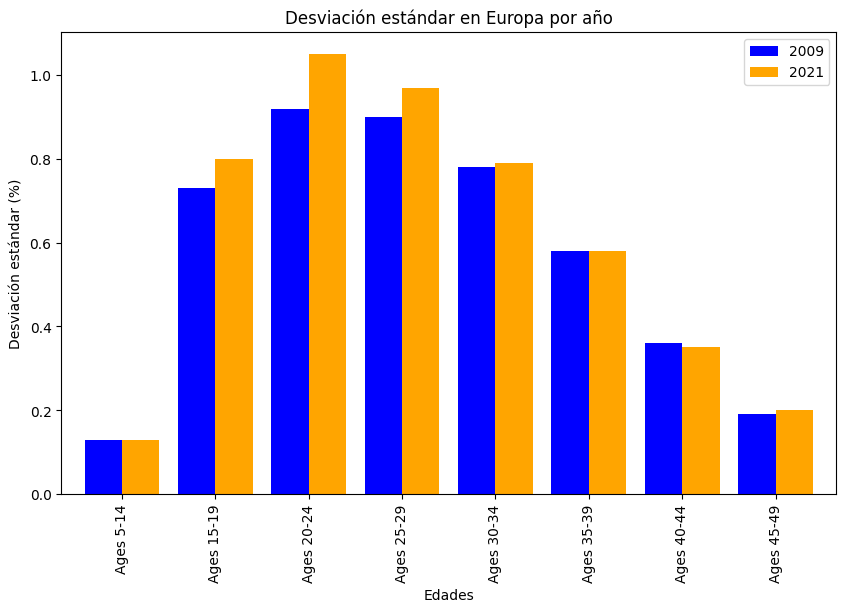

In [411]:
x=pd.concat([eat_age_09["Europe"].T, eat_age_21["Europe"].T],axis=1)
x.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Edades")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar en Europa por año")
plt.legend(labels=["2009","2021"]);

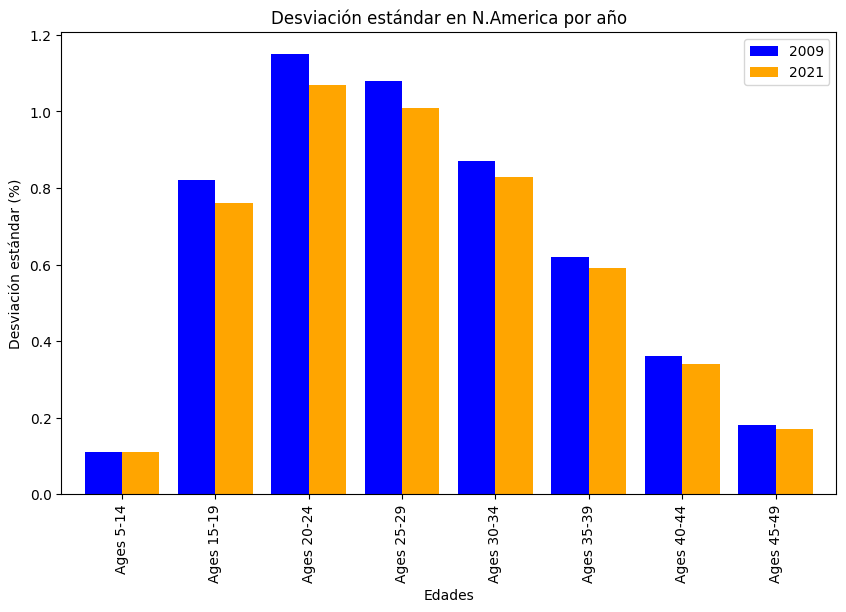

In [412]:
x=pd.concat([eat_age_09["North America"].T, eat_age_21["North America"].T],axis=1)
x.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Edades")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar en N.America por año")
plt.legend(labels=["2009","2021"]);

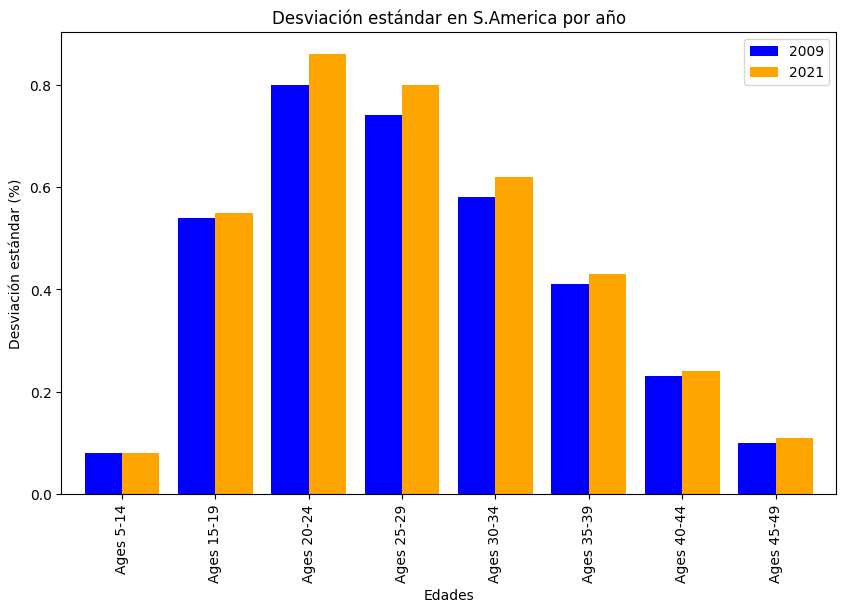

In [413]:
x=pd.concat([eat_age_09["South America"].T, eat_age_21["South America"].T],axis=1)
x.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Edades")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar en S.America por año")
plt.legend(labels=["2009","2021"]);

Se observa un aumneto en la desviación estándar de los desórdenes alimenticios, lo que suguiere que en algunos paises se concentra más este trastorno en un rango de edad concreto mientras que en otros paises abarca más edades. También puede deberse a que algunos países pueden haber tenido un aumento significativo en la población afectada, mientras que otros han tenido un cambio más leve.

Vemos que el grupo de edad de 20-24 años es el que tiene una mayor desviación, esto se debe a que hay una gran variedad en los datos en como afecta a un país y otro de este continente, por ejemplo, en un país el 20-30% de las personas de 20-24 años podría estar afectado, mientras que en otro solo el 5-10%.

Vamos a verlo con un ejemplo. Para ello vamos a analizar los paises de Europa

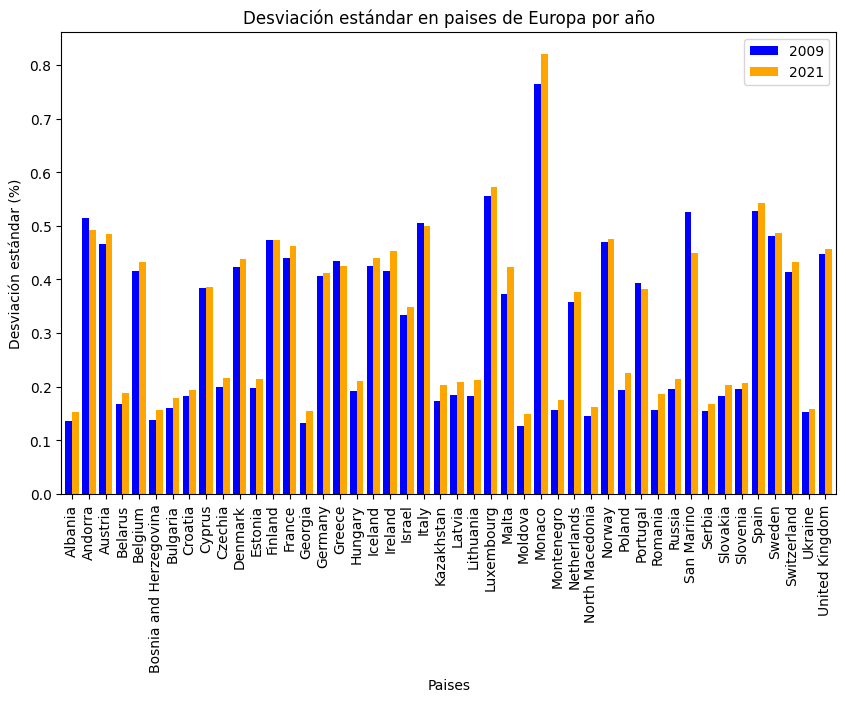

In [414]:
x=pd.concat([dev_eat_age_09_p_eu.T, dev_eat_age_21_p_eu.T],axis=1)
x.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Paises")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar en paises de Europa por año")
plt.legend(labels=["2009","2021"]);

Comparando la desviación a nivel mundial y por continentes vemos que siempre se sigue la misma tendencia. Salvo en Norte Ameria, en el resto de continentes vemos un aumento de la dispersión en 2021. Los datos nos indican que hay una mayor desviación estándar en edades de 20-29 años, mientras que en los extremos (5-14 / 45-49) se mantienen sin mucha variación y con valores muy bajos.

#### Veamos ahora el mismo estudio de dispersión para el trastorno depresivo

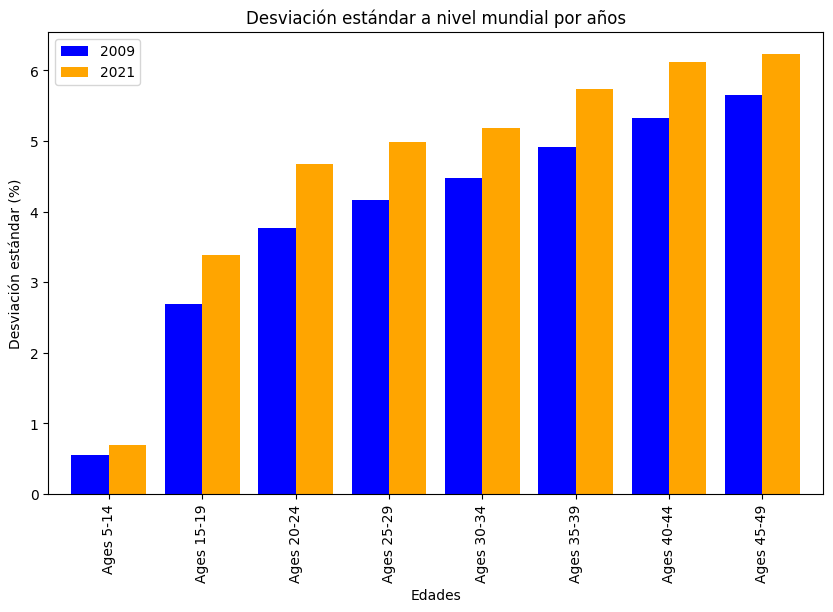

In [415]:
a=pd.concat([dep_age_09["World"].T, dep_age_21["World"].T],axis=1)
a.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Edades")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar a nivel mundial por años")
plt.legend(labels=["2009","2021"]);

La incidencia de depresión en personas de mayor edad varía mucho entre países o regiones.

En algunos países, las personas mayores podrían estar significativamente más afectadas por la depresión, mientras que en otros países, este grupo podría tener valores bajos de prevalencia.

Esto sugiere que factores locales o específicos del contexto tienen un impacto más grande en la población de mayor edad.

#### **Analizamos por géneros**

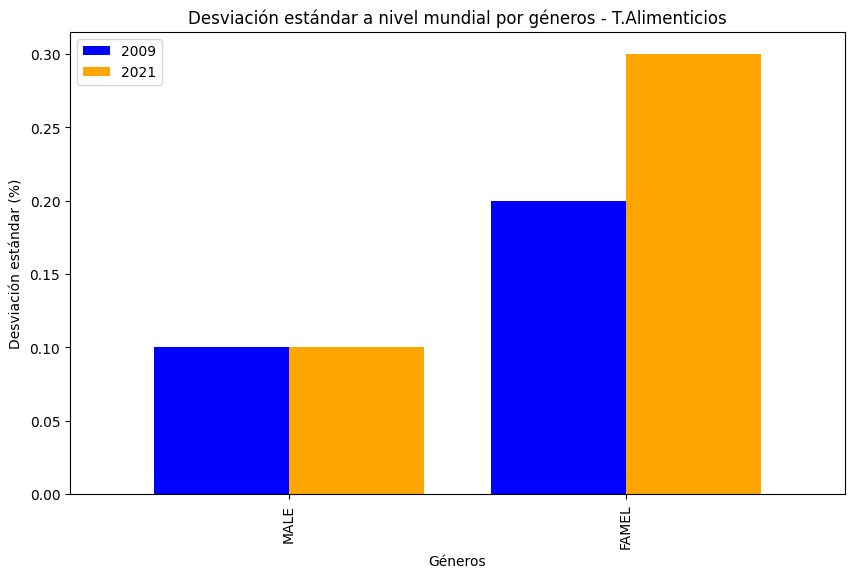

In [416]:
a=pd.concat([eat_gen_09["World"].T, eat_gen_21["World"].T],axis=1)
a.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Géneros")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar a nivel mundial por géneros - T.Alimenticios")
plt.legend(labels=["2009","2021"]);

En hombres se mantiene una dispersión muy baja y no hay variación, esto se debe a que los datos por paises son muy similares entre si y de un año a otro. Sin embargo en mujeres vemos una alta dispersión, que puede deberse a las distintas presiones socioculturales asociadas a cada país. 

En algunos países, las mujeres enfrentan estándares de belleza más estrictos y expectativas sociales más exigentes, lo que aumenta el riesgo de desarrollar trastornos alimenticios.
En otros países, las dinámicas familiares o el acceso limitado a alimentos podrían influir en los trastornos alimenticios de forma distinta.

El aumento de un año a otro puede debrse también a una mayor concienciación sobre la salud mental

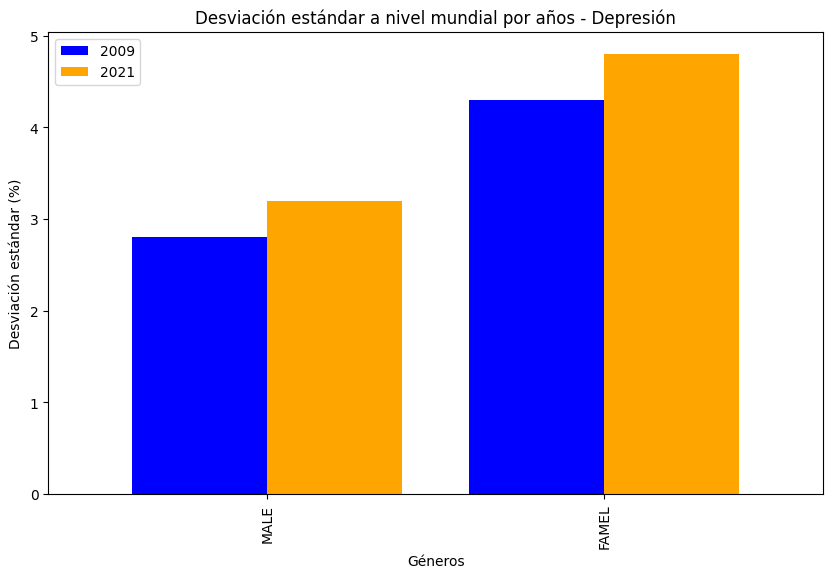

In [417]:
a=pd.concat([dep_gen_09["World"].T, dep_gen_21["World"].T],axis=1)
a.plot(kind='bar', width=0.8, figsize=(10, 6), color=["blue", "orange"])
# Configurar etiquetas y título
plt.xlabel("Géneros")
plt.ylabel("Desviación estándar (%)")
plt.title("Desviación estándar a nivel mundial por años - Depresión")
plt.legend(labels=["2009","2021"]);

Vemos una mayor dispersión en mujeres, aunque la variación entre un año y en otro es muy similar en ambos sexos. El crecimineto igualitario de un año a otro sugiere que los factores que afectan la prevalencia o gravedad de la depresión (como la pandemia, crisis económicas, o cambios culturales) tienen un impacto similar en hombres y mujeres de un año a otro.

Por otro lado el que exista una mayor desviación en mujeres podría reflejar diferencias en cómo la depresión afecta a distintos subgrupos dentro del género femenino. Por ejemplo en algunos países, las mujeres pueden tener mayores restricciones sociales, desigualdad de género o menor acceso a servicios de salud mental, lo que contribuye a mayores diferencias en la experiencia de depresión entre países.

En otros países con mayor equidad o conciencia sobre salud mental, las mujeres pueden recibir más apoyo, lo que también influye en la variabilidad.


Una vez vista la desviación estándar, de forma más general, vamos a centrarnos en un análisis más visual onde podamos desmentir o corroborar nuestra primera hipótesis

--------------------

3. *Veamos gráficamente la diferencia en los porcentajes de la población afectada entra 2009 y 2021 de ambos trastornos*

In [418]:
color=["#B0E0E6","#DDA0DD"]
color2=["#00BFFF","#FF1493"]
colors=["#00CED1","#FFB6C1"]
colors2=["#000080","#FF00FF"]
col_F="#FFB6C1"
col_M="#00CED1"


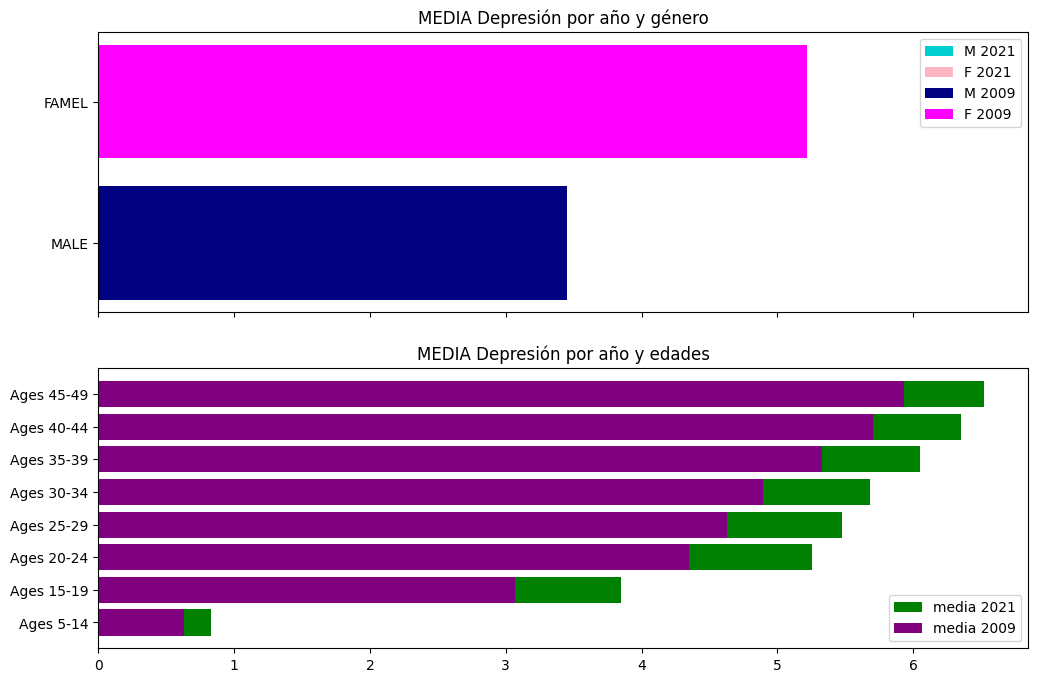

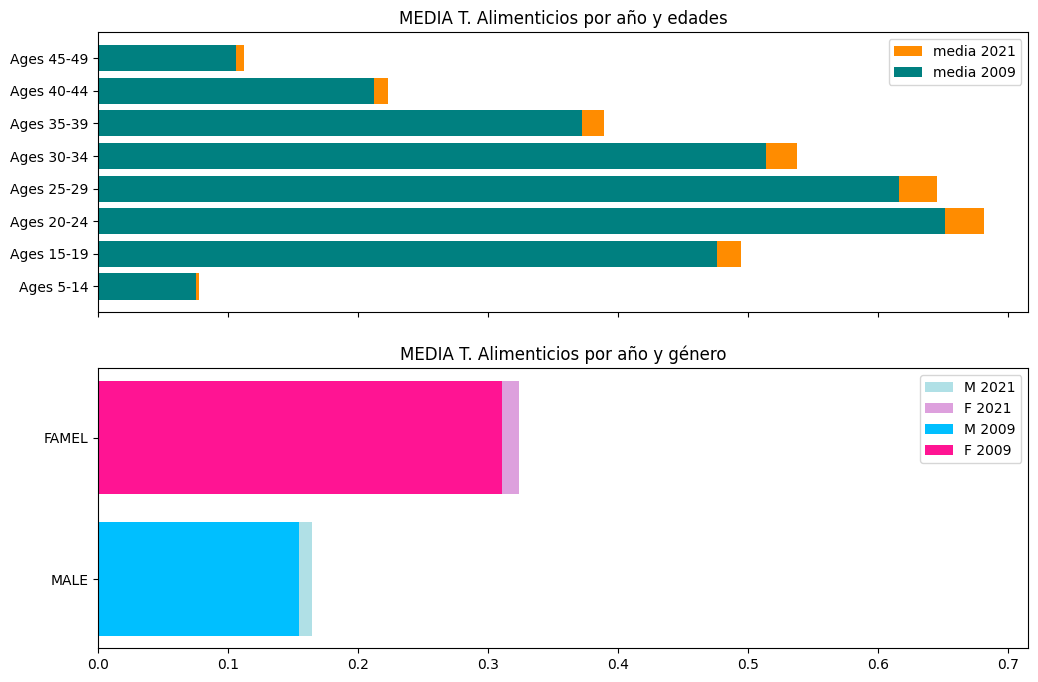

In [419]:
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

'''Depresión por género 2009-21'''
axes[0].barh(y=dep_gen_21_p.index, width=dep_gen_21_p["media"],color=colors,label=["M 2021","F 2021"]);
axes[0].barh(y=dep_gen_09_p.index, width=dep_gen_09_p["media"],color=colors2,label =["M 2009","F 2009"]);
axes[0].set_title("MEDIA Depresión por año y género");
axes[0].legend();
'''Depresión por edad 2009-21'''
axes[1].barh(y=dep_age_21.index, width=dep_age_21["media"],color=["green"],label="media 2021");
axes[1].barh(y=dep_age_09.index, width=dep_age_09["media"],color=["purple"],label ="media 2009");
axes[1].set_title("MEDIA Depresión por año y edades");
axes[1].legend();

f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

'''Desordenes alimenticios por género 2009-21'''
axes[1].barh(y=eat_gen_21_p.index, width=eat_gen_21_p["media"],color=color,label=["M 2021","F 2021"]);
axes[1].barh(y=eat_gen_09_p.index, width=eat_gen_09_p["media"],color=color2,label =["M 2009","F 2009"]);
axes[1].set_title("MEDIA T. Alimenticios por año y género");
axes[1].legend();

'''Desordenes alimenticios por edad 2009-21'''
axes[0].barh(y=eat_age_21.index, width=eat_age_21["media"],color="#FF8C00",label="media 2021");
axes[0].barh(y=eat_age_09.index, width=eat_age_09["media"],color="#008080",label ="media 2009");
axes[0].set_title("MEDIA T. Alimenticios por año y edades")
axes[0].legend();


Parece que en lo que respecta a la división por géneros no tenemos mucha variación, esto puede deberse a que los patrones culturales que fomentan preocupaciones sobre el peso y la imagen corporal pueden haberse mantenido constantes. 
Es posible que el número real de casos no se refleje en los datos debido al subdiagnóstico, especialmente en géneros que suelen ser menos propensos a buscar ayuda, como los hombres.
Muchas personas con trastornos alimenticios no reciben atención médica formal, por lo que los datos podrían no reflejar el problema completo.

Respecto a los trastornos depresivos vemos datos muy altos que se mantienen.
Debemos tener presente que estamos analizando la media, es decir, puede que tengamos paises donde el porcentaje ha bajado y otros donde ha incrementado.

Para tener una visión más general veamos los máximos y los mínimos

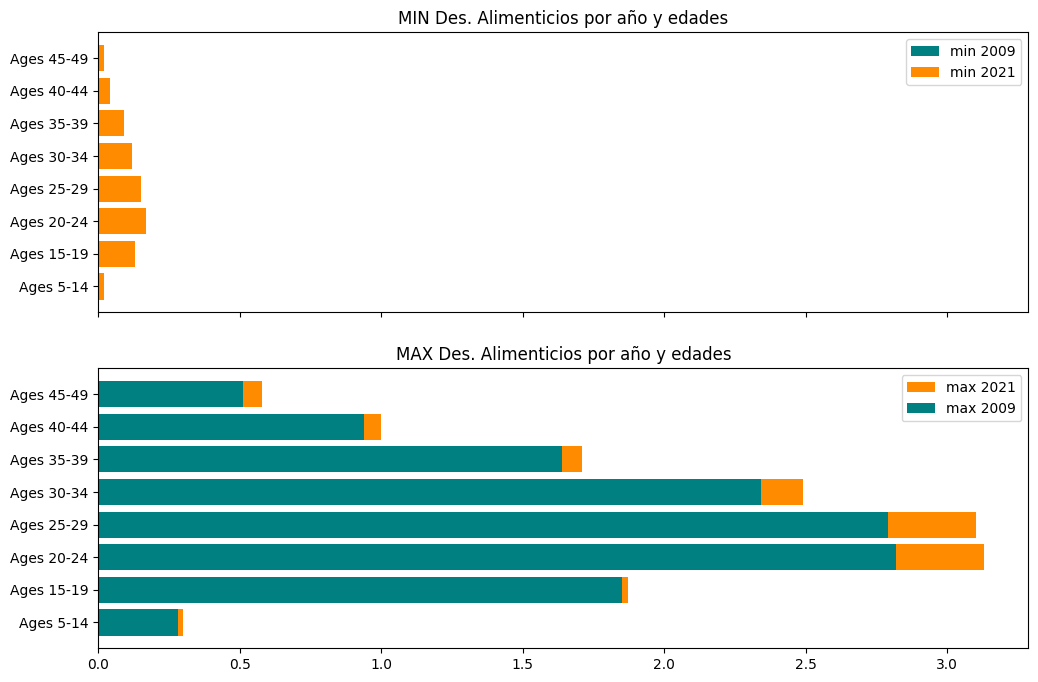

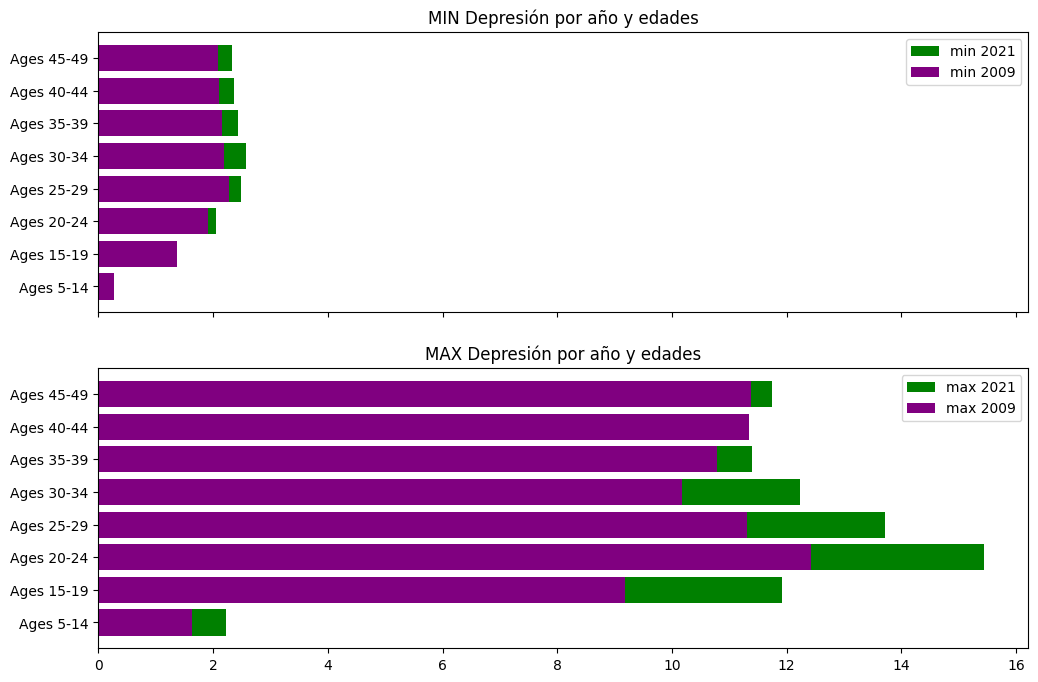

In [420]:
'''MAXIMOS'''
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)


'''Desordenes alimenticios por edad 2009-21'''

axes[0].barh(y=eat_age_09.index, width=eat_age_09["min"],color="#008080",label ="min 2009");
axes[0].barh(y=eat_age_21.index, width=eat_age_21["min"],color="#FF8C00",label="min 2021");
axes[0].set_title("MIN Des. Alimenticios por año y edades")
axes[0].legend();


'''Desordenes alimenticios por edad 2009-21'''
axes[1].barh(y=eat_age_21.index, width=eat_age_21["max"],color="#FF8C00",label="max 2021");
axes[1].barh(y=eat_age_09.index, width=eat_age_09["max"],color="#008080",label ="max 2009");
axes[1].set_title("MAX Des. Alimenticios por año y edades")
axes[1].legend();
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)


'''Depresión por edad 2009-21'''
axes[0].barh(y=dep_age_21.index, width=dep_age_21["min"],color=["green"],label="min 2021");
axes[0].barh(y=dep_age_09.index, width=dep_age_09["min"],color=["purple"],label ="min 2009");
axes[0].set_title("MIN Depresión por año y edades");
axes[0].legend();
'''Depresión por edad 2009-21'''
axes[1].barh(y=dep_age_21.index, width=dep_age_21["max"],color=["green"],label="max 2021");
axes[1].barh(y=dep_age_09.index, width=dep_age_09["max"],color=["purple"],label ="max 2009");
axes[1].set_title("MAX Depresión por año y edades");
axes[1].legend();

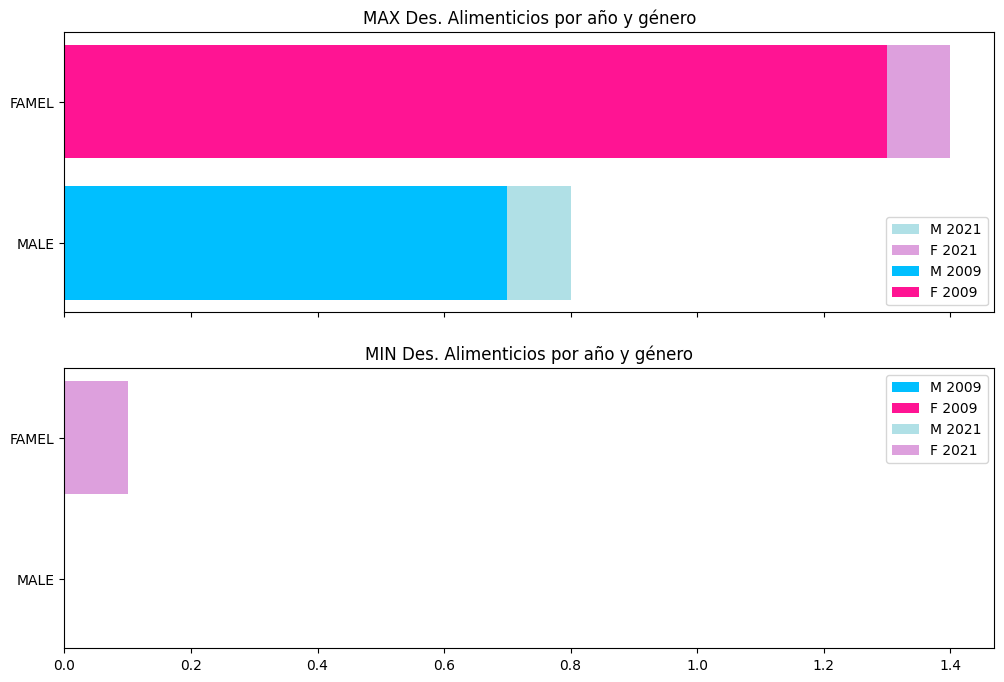

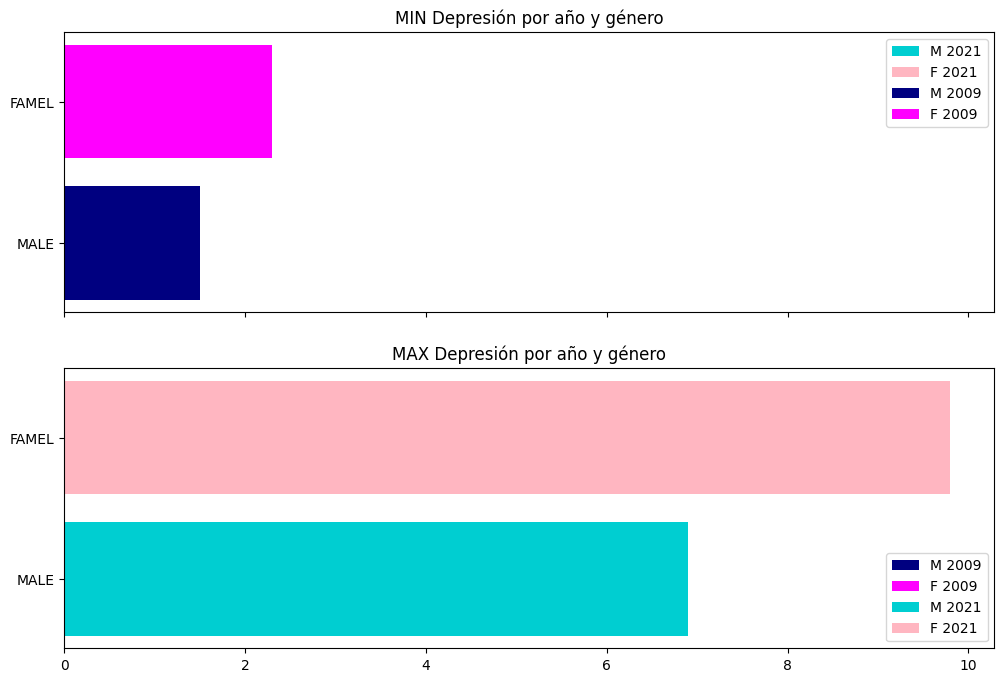

In [421]:
'''MINIMOS'''
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

'''Desordenes alimenticios por género 2009-21'''

axes[1].barh(y=eat_gen_09_p.index, width=eat_gen_09_p["min"],color=color2,label =["M 2009","F 2009"]);
axes[1].barh(y=eat_gen_21_p.index, width=eat_gen_21_p["min"],color=color,label=["M 2021","F 2021"]);
axes[1].set_title("MIN Des. Alimenticios por año y género");
axes[1].legend();
'''Desordenes alimenticios por género 2009-21'''
axes[0].barh(y=eat_gen_21_p.index, width=eat_gen_21_p["max"],color=color,label=["M 2021","F 2021"]);
axes[0].barh(y=eat_gen_09_p.index, width=eat_gen_09_p["max"],color=color2,label =["M 2009","F 2009"]);
axes[0].set_title("MAX Des. Alimenticios por año y género");
axes[0].legend();

f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

'''Depresión por género 2009-21'''
axes[0].barh(y=dep_gen_21_p.index, width=dep_gen_21_p["min"],color=colors,label=["M 2021","F 2021"]);
axes[0].barh(y=dep_gen_09_p.index, width=dep_gen_09_p["min"],color=colors2,label =["M 2009","F 2009"]);
axes[0].set_title("MIN Depresión por año y género");
axes[0].legend();
'''Depresión por género 2009-21'''
axes[1].barh(y=dep_gen_09_p.index, width=dep_gen_09_p["max"],color=colors2,label =["M 2009","F 2009"]);
axes[1].barh(y=dep_gen_21_p.index, width=dep_gen_21_p["max"],color=colors,label=["M 2021","F 2021"]);
axes[1].set_title("MAX Depresión por año y género");
axes[1].legend();


---------------------------

*4. Separamos los datos por continentes*

Lo primero que vamos a hacer es usar la columna de *POPULATION* para pasar los porcentajes de la población masculina y femenina a cifras de población


In [422]:
def calcular_medias_num(data,clasificacion,continentes,cont_paises):#ponemos clasificacion ya que lo usaremos en genero y edades
    medias=[]
    for continente in continentes: #tengo las listas de continentes y poblacion con el mismo orden
        try:
            #hacemos una lista de los paises por continente y comprobamos si estan en el DF
            paises=cont_paises.get(continente,[])
            #devuelveme el pais de la lista de paises (de cada continente) si ese pais esta en el DF
            paises_noeliminados=[pais for pais in paises if pais in data.index]
            if paises_noeliminados: #para los paises que estan en en el DF
                media=data.loc[paises_noeliminados,clasificacion].mean()
                medias.append(media)
            else:
                medias.append(None)
        except KeyError:
            medias.append(None)
    return medias


In [423]:

dep_gen["male_09"] = (dep_gen[("MALE", "2009")] * dep_gen[("POPULATION", "2009")]) / 100
dep_gen["famel_09"] = (dep_gen[("FAMEL", "2009")] * dep_gen[("POPULATION", "2009")]) / 100
dep_gen["male_21"] = (dep_gen[("MALE", "2021")] * dep_gen[("POPULATION", "2021")]) / 100
dep_gen["famel_21"] = (dep_gen[("FAMEL", "2021")] * dep_gen[("POPULATION", "2021")]) / 100

eat_gen["male_09"] = (eat_gen[("MALE", "2009")] * eat_gen[("POPULATION", "2009")]) / 100
eat_gen["famel_09"] = (eat_gen[("FAMEL", "2009")] * eat_gen[("POPULATION", "2009")]) / 100
eat_gen["male_21"] = (eat_gen[("MALE", "2021")] * eat_gen[("POPULATION", "2021")]) / 100
eat_gen["famel_21"] = (eat_gen[("FAMEL", "2021")] * eat_gen[("POPULATION", "2021")]) / 100

'''2009'''
medias_f_09_num=calcular_medias_num(dep_gen,"famel_09",cont,cont_paises)
dep_F_09_num = pd.DataFrame({"Country/area": cont, "Famel_09": medias_f_09_num}).set_index("Country/area")

medias_M_09_num=calcular_medias_num(dep_gen,"male_09",cont,cont_paises)
dep_M_09_num = pd.DataFrame({"Country/area": cont, "Male_09": medias_M_09_num}).set_index("Country/area")

'''2021'''
medias_F_21_num=calcular_medias_num(dep_gen,"famel_21",cont,cont_paises)
dep_F_21_num = pd.DataFrame({"Country/area": cont, "Famel_21": medias_F_21_num}).set_index("Country/area")

medias_M_21_num=calcular_medias_num(dep_gen,"male_21",cont,cont_paises)
dep_M_21_num = pd.DataFrame({"Country/area": cont, "Male_21": medias_M_21_num}).set_index("Country/area")
'''2009'''
med_f_09_num=calcular_medias_num(eat_gen,"famel_09",cont,cont_paises)
eat_F_09_num = pd.DataFrame({"Country/area": cont, "Famel_09": med_f_09_num}).set_index("Country/area")

med_M_09_num=calcular_medias_num(eat_gen,"male_09",cont,cont_paises)
eat_M_09_num = pd.DataFrame({"Country/area": cont, "Male_09": med_M_09_num}).set_index("Country/area")

'''2021'''
med_F_21_num=calcular_medias_num(eat_gen,"famel_21",cont,cont_paises)
eat_F_21_num = pd.DataFrame({"Country/area": cont, "Famel_21": med_F_21_num}).set_index("Country/area")

med_M_21_num=calcular_medias_num(eat_gen,"male_21",cont,cont_paises)
eat_M_21_num = pd.DataFrame({"Country/area": cont, "Male_21": med_M_21_num}).set_index("Country/area")

'''De cada año seleccionamos solo los continentes'''
continentes=["Africa","Asia","North America","Oceania","South America","Europe"]

s_m_cont_años=s_m_09.loc[["Africa","Asia","North America","Oceania","South America","Europe"],["2009","2021"]]
s_m_cont_años=s_m_cont_años.rename(columns={"2009":"2009_RS","2021":"2021_RS"})

- **Nota:** estos datos los usaremos en otras secciones

---------------------------------------------

*5. Clasificación por economía*

In [424]:
'''Analizamos los datos clasificando los paises por su nivel economico'''
dep_gen_icm= dep_gen.loc[["High-income countries","Upper-middle-income countries","Lower-middle-income countries","Low-income countries"]]
dep_age_icm= dep_age.loc[["High-income countries","Upper-middle-income countries","Lower-middle-income countries","Low-income countries"]]

'''Lo mismo para eat_gen'''
eat_gen_icm= eat_gen.loc[["High-income countries","Upper-middle-income countries","Lower-middle-income countries","Low-income countries"]]
eat_age_icm= eat_age.loc[["High-income countries","Upper-middle-income countries","Lower-middle-income countries","Low-income countries"]]

'''Evolución de las Redes de 2009 a 2021'''
s_m_icm= s_m_09.loc[["High-income countries","Upper-middle-income countries","Lower-middle-income countries","Low-income countries"],["2009","2021"]]
#Separamos en distintos DataFram por años

'''Volvemos a separar los dato en dos dataFrame distintos por años'''
dep_gen_icm_09=(dep_gen_icm.T).xs("2009",level="Measure")
dep_gen_icm_21=(dep_gen_icm.T).xs("2021",level="Measure")
dep_age_icm_09=(dep_age_icm.T).xs("2009",level="Measure")
dep_age_icm_21=(dep_age_icm.T).xs("2021",level="Measure")
'''eat_gen'''
eat_gen_icm_09=(eat_gen_icm.T).xs("2009",level="Measure")
eat_gen_icm_21=(eat_gen_icm.T).xs("2021",level="Measure")
eat_age_icm_09=(eat_age_icm.T).xs("2009",level="Measure")
eat_age_icm_21=(eat_age_icm.T).xs("2021",level="Measure")
'''Redes sociales'''
s_m_icm_09=(s_m_icm.loc[:,["2009"]]).T
s_m_icm_21=(s_m_icm.loc[:,["2021"]]).T

Veamos gráficamente como afecta a hombres y mujeres, según el estatus económico, cada trastorno mental

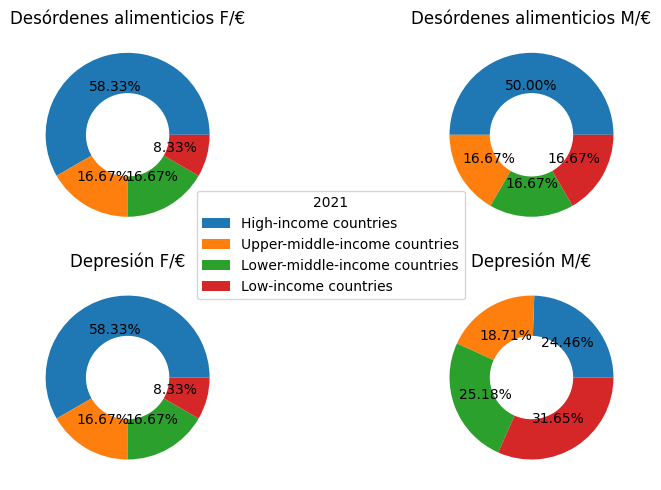

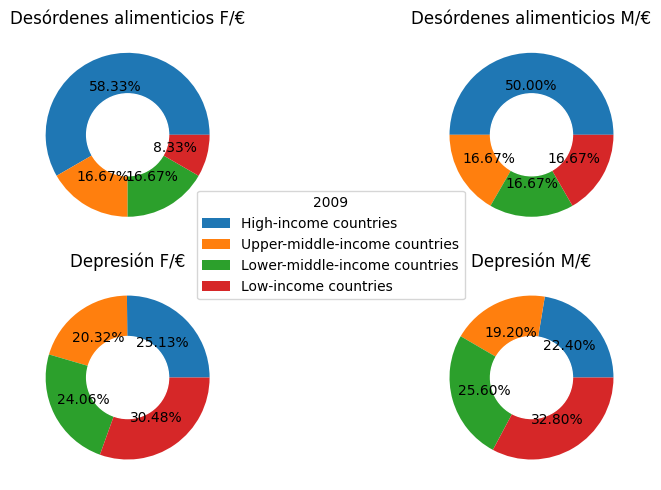

In [425]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
data_f=(eat_gen_icm_21.T)["FAMEL"]

# Crear el gráfico de pastel
axes[0,0].pie(data_f,autopct = '%1.2f%%')
# add a circle at the center to transform it in a donut chart
circle_f=plt.Circle( (0,0), 0.5, color='white')
axes[0,0].add_artist(circle_f)
axes[0,0].set_title("Desórdenes alimenticios F/€");

data_m=(eat_gen_icm_21.T)["MALE"]


# Crear el gráfico de pastel
axes[0,1].pie(data_m,autopct = '%1.2f%%')
# add a circle at the center to transform it in a donut chart
circle_m=plt.Circle( (0,0), 0.5, color='white')
axes[0,1].add_artist(circle_m)
axes[0,1].set_title("Desórdenes alimenticios M/€");

data=(dep_gen_icm_21.T)["FAMEL"]

axes[1,0].pie(data_f,autopct = '%1.2f%%')
# add a circle at the center to transform it in a donut chart
circle_f=plt.Circle( (0,0), 0.5, color='white')
axes[1,0].add_artist(circle_f)
axes[1,0].set_title("Depresión F/€");


data_m=(dep_gen_icm_21.T)["MALE"]


# Crear el gráfico de pastel
axes[1,1].pie(data_m,autopct = '%1.2f%%')
# add a circle at the center to transform it in a donut chart
circle_m=plt.Circle( (0,0), 0.5, color='white')
axes[1,1].add_artist(circle_m)
axes[1,1].set_title("Depresión M/€");

labels = data.index
fig.legend(labels=labels,title="2021",loc='center')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
data_f=(eat_gen_icm_09.T)["FAMEL"]

# Crear el gráfico de pastel
axes[0,0].pie(data_f,autopct = '%1.2f%%')
# add a circle at the center to transform it in a donut chart
circle_f=plt.Circle( (0,0), 0.5, color='white')
axes[0,0].add_artist(circle_f)
axes[0,0].set_title("Desórdenes alimenticios F/€");

data_m=(eat_gen_icm_09.T)["MALE"]


# Crear el gráfico de pastel
axes[0,1].pie(data_m,autopct = '%1.2f%%')
# add a circle at the center to transform it in a donut chart
circle_m=plt.Circle( (0,0), 0.5, color='white')
axes[0,1].add_artist(circle_m)
axes[0,1].set_title("Desórdenes alimenticios M/€");

data1=(dep_gen_icm_09.T)["FAMEL"]

axes[1,0].pie(data1,autopct = '%1.2f%%')
# add a circle at the center to transform it in a donut chart
circle1=plt.Circle( (0,0), 0.5, color='white')
axes[1,0].add_artist(circle1)
axes[1,0].set_title("Depresión F/€");


data2=(dep_gen_icm_09.T)["MALE"]


# Crear el gráfico de pastel
axes[1,1].pie(data2,autopct = '%1.2f%%')
# add a circle at the center to transform it in a donut chart
circle2=plt.Circle( (0,0), 0.5, color='white')
axes[1,1].add_artist(circle2)
axes[1,1].set_title("Depresión M/€");

labels = data.index
fig.legend(labels=labels,title="2009",loc='center')

plt.tight_layout()
plt.show()


1. **2009**: los paises más afectados por t. de la alimentación son los más ricos, tanto en hombres como en mujeres. Sin embargo respecto a la depresión destacan los paises más pobres.
2. **2021**: en este caso los trastornos alimenticios siguen destacando en los mismo paises, mientras que en los paises que sufren depresión, en el caso de las mujeres, ha aumentado en los paises con la economía más alta. En los hombres se mantiene sin mucha variación.

- **NOTA:** Estos gráficos nos hablan solo de la proporción de la población afectada en cada caso, no sobre la población total si sobre los porcentajes reales.Para ver los datos sobre la población total hagamos un gráfico de barras

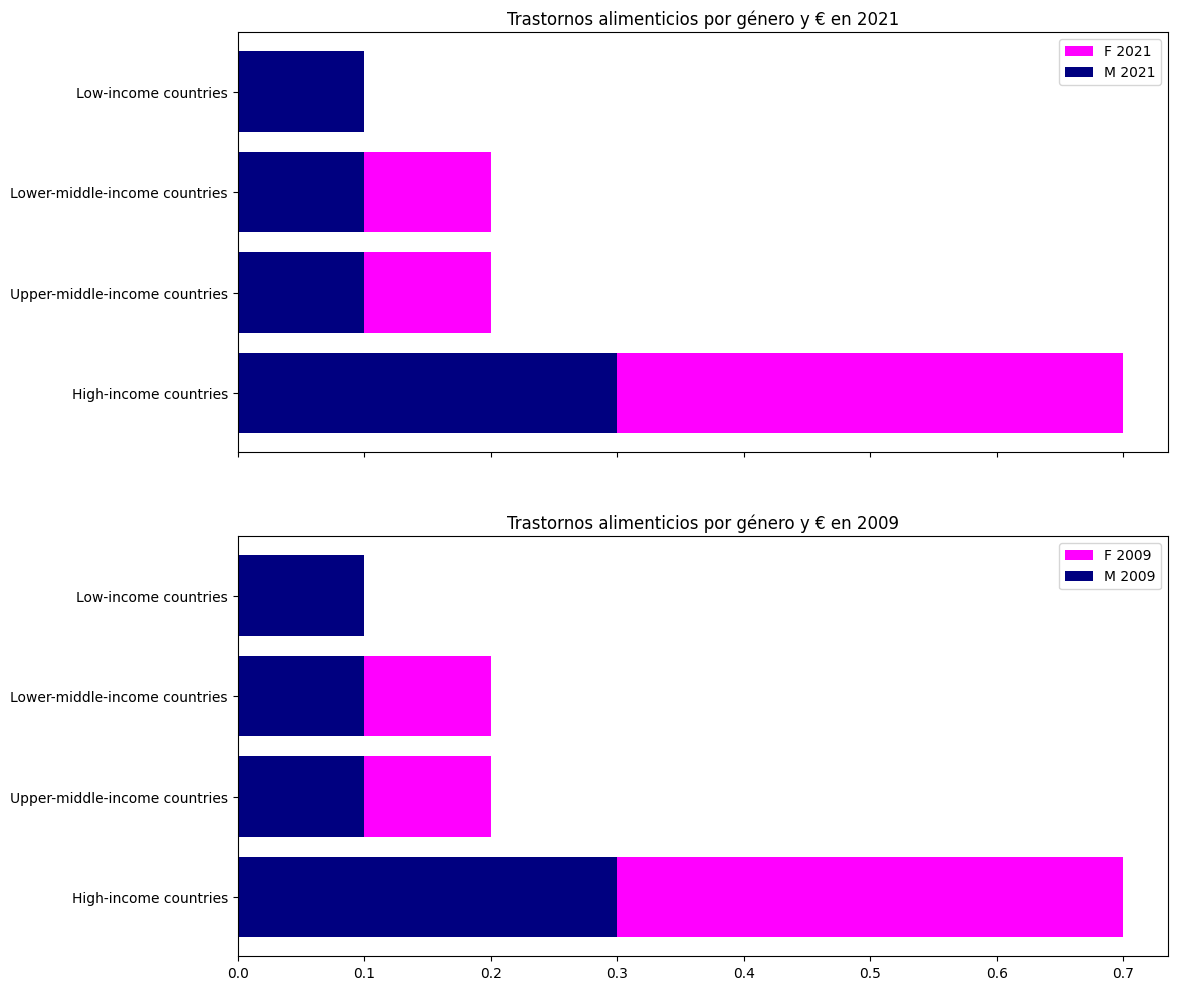

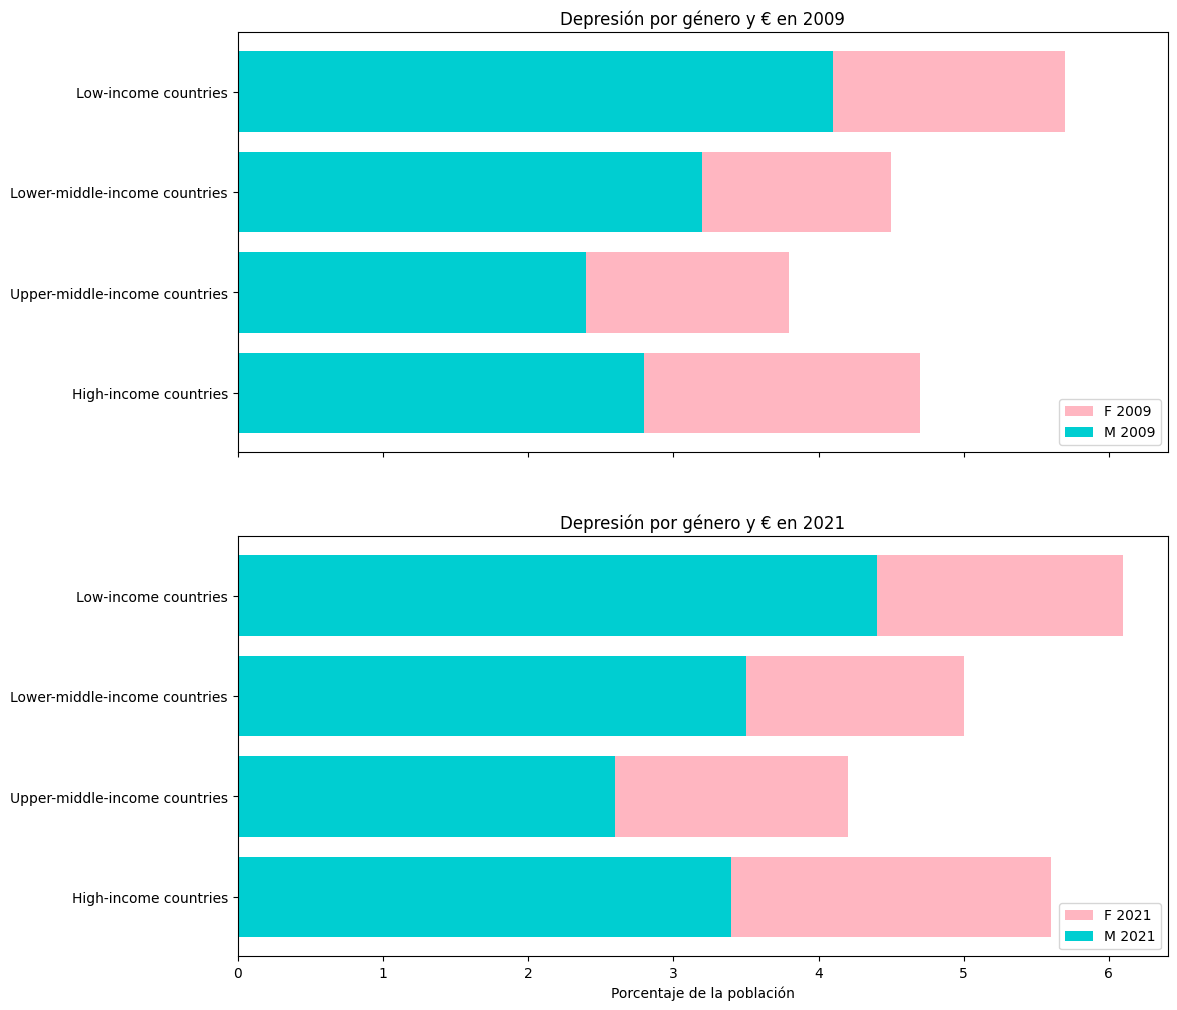

In [426]:
f, axes = plt.subplots(2, 1, figsize=(12,12), sharex=True)

'''Desordenes alimenticios por género 2009-21'''
axes[0].barh(y=eat_gen_icm_21.columns, width=eat_gen_icm_21.T["FAMEL"],color="#FF00FF",label="F 2021");
axes[0].barh(y=eat_gen_icm_21.columns, width=eat_gen_icm_21.T["MALE"],color="#000080",label ="M 2021");
axes[0].set_title("Trastornos alimenticios por género y € en 2021");
axes[0].legend();
axes[1].barh(y=eat_gen_icm_09.columns, width=eat_gen_icm_09.T["FAMEL"],color="#FF00FF",label="F 2009");
axes[1].barh(y=eat_gen_icm_09.columns, width=eat_gen_icm_09.T["MALE"],color="#000080",label ="M 2009");
axes[1].set_title("Trastornos alimenticios por género y € en 2009");
axes[1].legend();


f, axes = plt.subplots(2, 1, figsize=(12,12), sharex=True)


axes[1].barh(y=dep_gen_icm_21.columns, width=dep_gen_icm_21.T["FAMEL"],color=col_F,label="F 2021");
axes[1].barh(y=dep_gen_icm_21.columns, width=dep_gen_icm_21.T["MALE"],color=col_M,label ="M 2021");
axes[1].set_title("Depresión por género y € en 2021");
axes[1].legend();
axes[0].barh(y=dep_gen_icm_09.columns, width=dep_gen_icm_09.T["FAMEL"],color=col_F,label="F 2009");
axes[0].barh(y=dep_gen_icm_09.columns, width=dep_gen_icm_09.T["MALE"],color=col_M,label ="M 2009");
axes[0].set_title("Depresión por género y € en 2009")
axes[0].legend();

axes[1].set_xlabel("Porcentaje de la población");


Veamos estos datos por edades

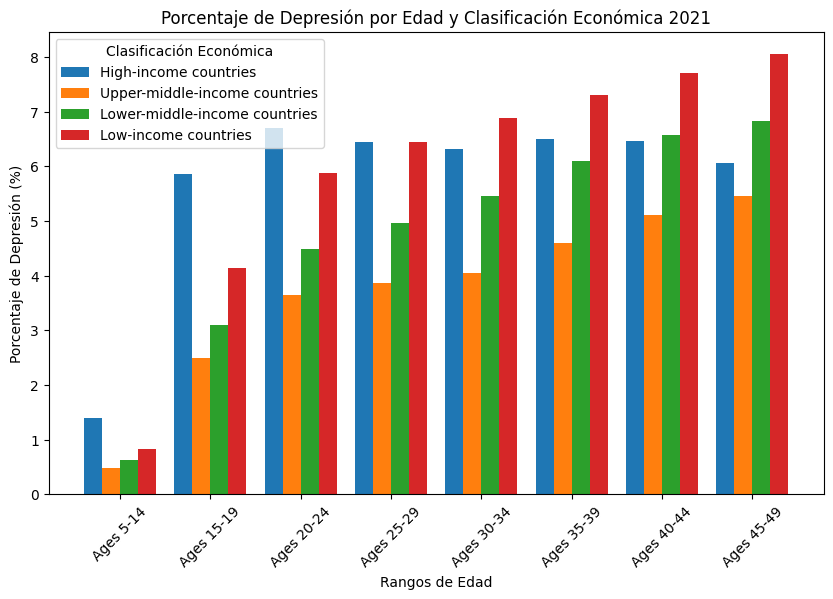

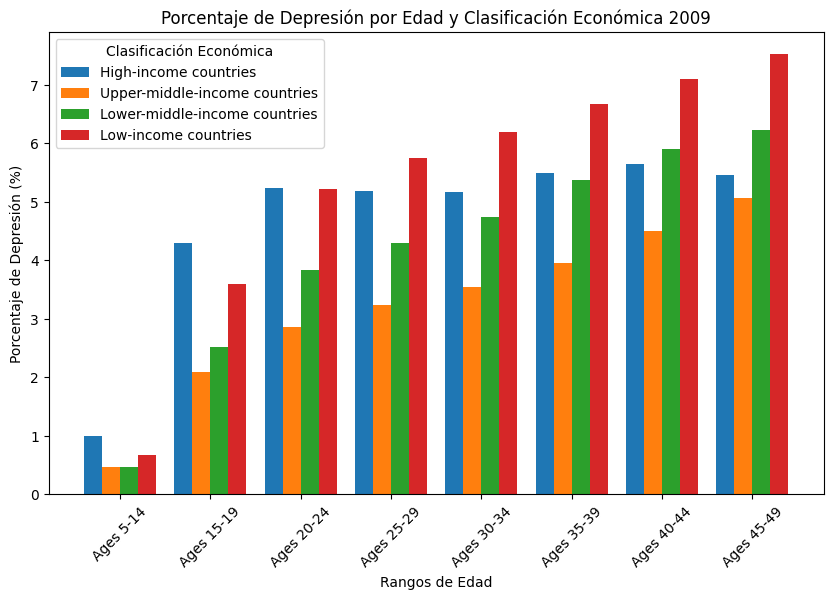

In [427]:
x = np.arange(len(dep_age_icm_21))  # Posiciones para los rangos de edad
width = 0.2 
fig, ax = plt.subplots(figsize=(10, 6))

for i, col in enumerate(dep_age_icm_21.columns):
    ax.bar(x + i * width, dep_age_icm_21[col], width, label=col)
ax.set_xlabel('Rangos de Edad')
ax.set_ylabel('Porcentaje de Depresión (%)')
ax.set_title('Porcentaje de Depresión por Edad y Clasificación Económica 2021')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(eat_age_icm_21.index, rotation=45)
ax.legend(title='Clasificación Económica')

fig, ax = plt.subplots(figsize=(10, 6))

for i, col in enumerate(dep_age_icm_09.columns):
    ax.bar(x + i * width, dep_age_icm_09[col], width, label=col)
ax.set_xlabel('Rangos de Edad')
ax.set_ylabel('Porcentaje de Depresión (%)')
ax.set_title('Porcentaje de Depresión por Edad y Clasificación Económica 2009')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(eat_age_icm_09.index, rotation=45)
ax.legend(title='Clasificación Económica')

--------------------------------------

- ## **HIPÓTESIS**
        En 2009 destacan en edades más tempranas los paises con una economía muy alta, pero a partir de los 25 años los paises más pobres son los que tomas los valors más altos, observando también un crecimineto progresivo en los paises "Lower-income". 

        Si nos fijamos en 2021, vemos que ese cambio entre los paises se produce a partir de los 29 años, es decir, ha aumentado la tasa de depresión en los paises con mejor economñia en edades más tempranas. El resto de la gráfica se muestra muy similar a la de 2009, es decir, vemos un mayor aumento en edades de 15-29 años. Con este estudio podemos concluir nuestra hipótesis de que los adolescentes y adultos jóvenes sufren un aumento en la tasa de depresión en los paises más desarrollados económicamente.

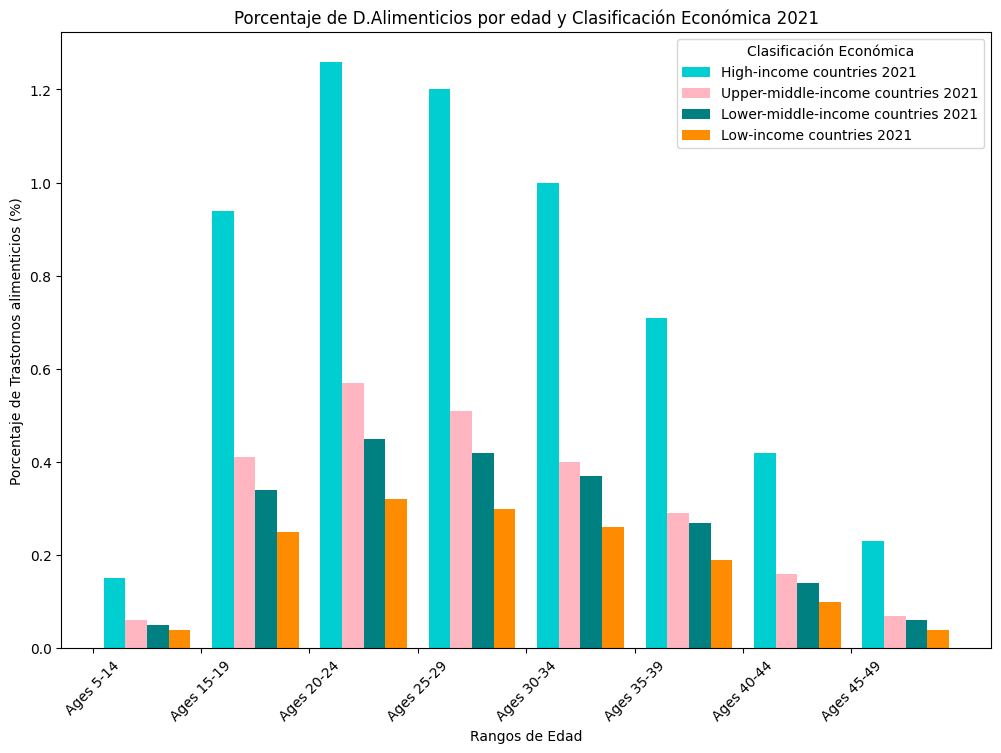

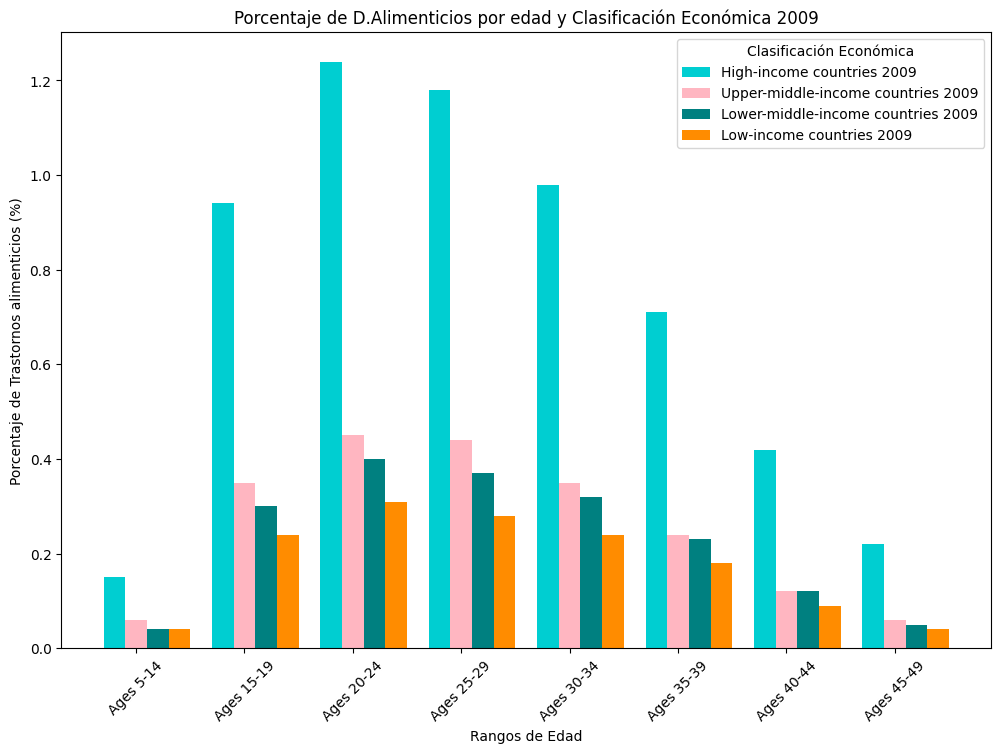

In [428]:
x = np.arange(len(eat_age_icm_09))
width = 0.2  # Ancho de las barras
colores_3= ["#00CED1", "#FFB6C1", "#008080", "#FF8C00"]  

fig, ax = plt.subplots(figsize=(12, 8))

# Agregar barras para cada clasificación económica en 2021
for i, col in enumerate(eat_age_icm_21.columns):
    ax.bar(x + i * width + width, eat_age_icm_21[col], width, label=f"{col} 2021", color=colores_3[i])

ax.set_xlabel('Rangos de Edad')
ax.set_ylabel('Porcentaje de Trastornos alimenticios (%)')
ax.set_title('Porcentaje de D.Alimenticios por edad y Clasificación Económica 2021')
ax.set_xticks(x)
ax.set_xticklabels(eat_age_icm_21.index, rotation=45)
ax.legend(title='Clasificación Económica')


fig, ax = plt.subplots(figsize=(12, 8))
# Agregar barras para cada clasificación económica en 2020
for i, col in enumerate(eat_age_icm_09.columns):
    ax.bar(x + i * width - width, eat_age_icm_09[col], width, label=f"{col} 2009", color=colores_3[i])



ax.set_xlabel('Rangos de Edad')
ax.set_ylabel('Porcentaje de Trastornos alimenticios (%)')
ax.set_title('Porcentaje de D.Alimenticios por edad y Clasificación Económica 2009')
ax.set_xticks(x)
ax.set_xticklabels(eat_age_icm_09.index, rotation=45)
ax.legend(title='Clasificación Económica')

    En los desórdenes alimenticios vemos un leve creciminento generalizado, no podemos destacar que una región socioeconómica crezca más rápido que otro. Pero si podemos destacar que los paises con mejor economía tienen una tasa disparada de casos en relación al resto, especialmente en edades de 20 a 24 años. 

    También cabe recalca que los casos se muestar escalonados en orden descendente de los paises más ricos a los más pobres. Alguna razones por las que puede deberse  este suceso es a una menor conciencia sobre la salud mental en paises con menos recursos sanitarios, o a que en los paises con una economía mayor se tiene una mayor presión respecto al aspecto físico.

------------------------------------------------------------------------------------------------

Por último haremos una comparación de los datos separados por trastornos, para visualizar mejor el grado de aumneto por años en cada caso

Text(0.5, 0, 'Porcentaje de población')

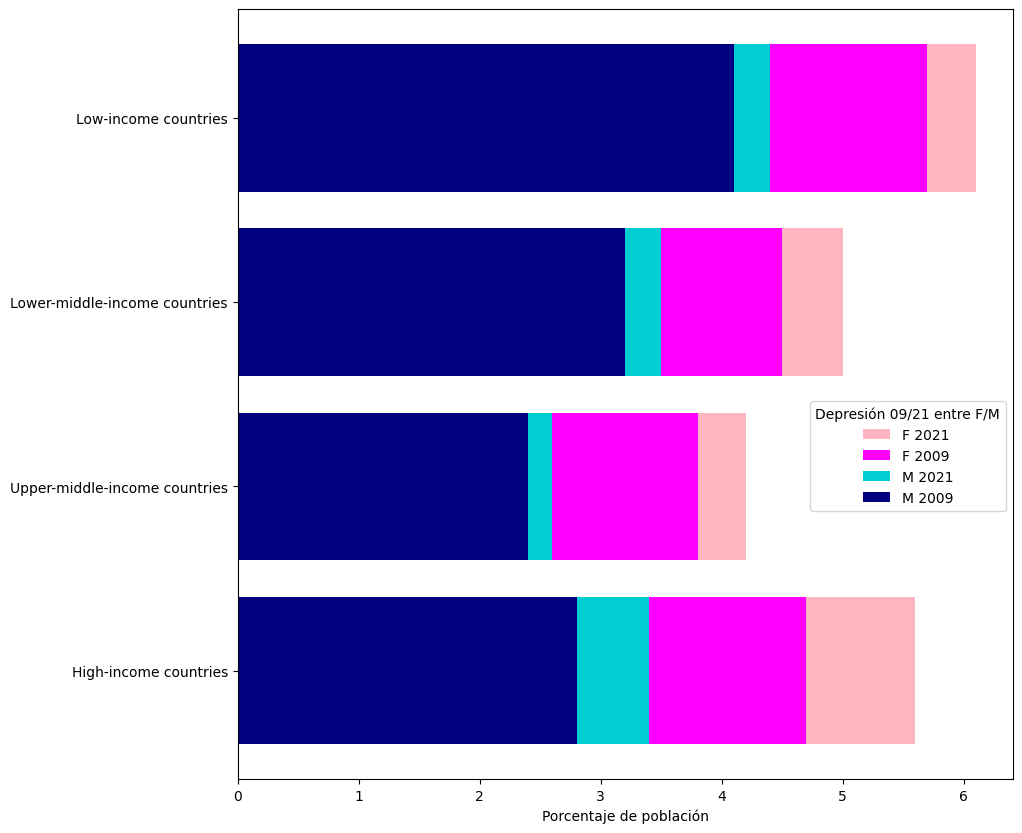

In [429]:
'''DEP'''
plt.figure(figsize=(10,10))
plt.barh(y=dep_gen_icm_21.columns, width=dep_gen_icm_21.T["FAMEL"],color=col_F,label="F 2021");
plt.barh(y=dep_gen_icm_09.columns, width=dep_gen_icm_09.T["FAMEL"],color="#FF00FF",label="F 2009");
plt.barh(y=dep_gen_icm_21.columns, width=dep_gen_icm_21.T["MALE"],color=col_M,label ="M 2021");
plt.barh(y=dep_gen_icm_09.columns, width=dep_gen_icm_09.T["MALE"],color="#000080",label ="M 2009");
plt.legend(title="Depresión 09/21 entre F/M", loc="upper right",bbox_to_anchor=(1,0.5));
plt.xlabel("Porcentaje de población")

    Para los trastornos depresivos podemos ver que los paises más afectados son los que tienen una economía más extrema. Sin embargo, tanto en hombres como en mujeres vemos un mayor crecimiento en los paises con una alta economía. Con estos datos podríamos decir que las mujeres son más propensas a sufrir depresión en comparación a los hombres. Por otro lado hay un crecimineto significativamente mayor en los paises más ricos, especialmente en mujeres, aunque siguen siendo algo mayores los datos de los paises más pobres.


Text(0.5, 0, 'Porcentaje de población')

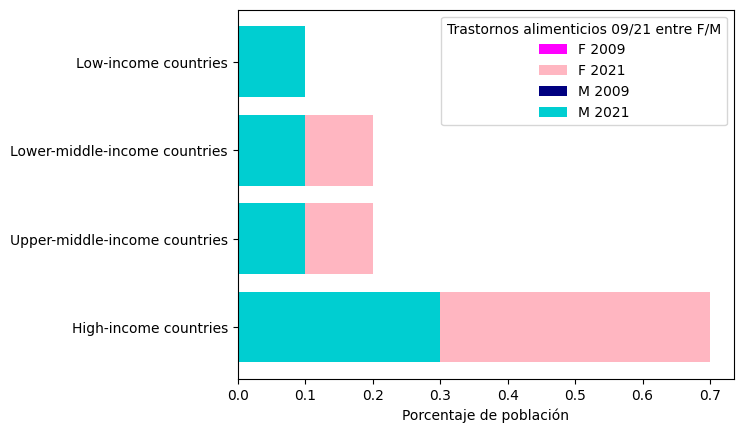

In [430]:
'''EAT'''
plt.barh(y=eat_gen_icm_09.columns, width=eat_gen_icm_09.T["FAMEL"],color="#FF00FF",label="F 2009");
plt.barh(y=eat_gen_icm_21.columns, width=eat_gen_icm_21.T["FAMEL"],color=col_F,label="F 2021");

plt.barh(y=eat_gen_icm_09.columns, width=eat_gen_icm_09.T["MALE"],color="#000080",label ="M 2009");
plt.barh(y=eat_gen_icm_21.columns, width=eat_gen_icm_21.T["MALE"],color=col_M,label ="M 2021");

plt.legend(title="Trastornos alimenticios 09/21 entre F/M");
plt.xlabel("Porcentaje de población")

    Para los trastornos de la conducta alimenticia vemos que afectan más a los paises con mayor desarollo económico y el cambio en los años no es muy significativo. Por otro lado, se observa que hay una gran diferencia entre hombres y mujeres, lo que indica que las mujeres son más propensas a este tipo de enfermedades.

    Comparando ambas gráficas y aventurandonos a sacar una conclusión, se podría decir que, viendo el crecimiento de los últimos años, en los paises con mayor economía las mujeres son más propensas a sufrir depresión y trastornos alimenticios.
    Aunque los trastornos depresivos toman valores más altos en los paises *low-income*, el creciento de 2009 a 2021 es más significativo en paises *High-income*.

# **2.REDES SOCIALES 2009-2021**

Vamos a comenzar añadiendo las columnas de media, min y max de los paises en cada año. Para tener una visión general antes de comenzar el análisis vamos a ver estos datos con gráficas. De este modo podemos ver de forma más visual las diferencias generales entre 2009 y 2021.

*En este apartado no trabajamos con porcentajes, sino con población total*

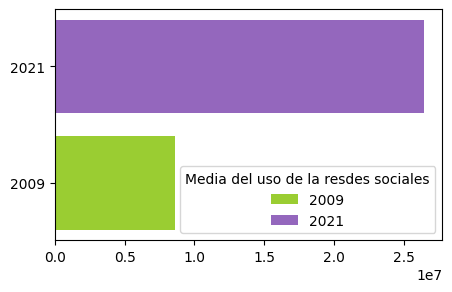

In [431]:
s_m=s_m_09.T.loc[["2009","2021"],:"Zimbabwe"]
s_m["media"]=s_m.T.mean()
s_m["min"]=s_m.T.min()
s_m["max"]=s_m.T.max()
plt.figure(figsize=(5,3))
plt.barh(y=s_m.index, width=s_m["media"],color=["#9ACD32","#9467bd"],label =["2009","2021"]);
plt.legend(title="Media del uso de la resdes sociales");

Podemos ver un crecimineto significativo en la cantidad de personas que usan redes sociales en cada año.Pero,¿cómo afecta a cada continente?,¿el crecimineto de las enfermedades mentales en cada continente será igual que el crecimiento de redes por continete?

*Separamos los datos por continentes para poder hacer la comparación*

In [432]:
s_m_continent=s_m_09.T.loc[["2009","2021"],["Africa","Asia","North America","Oceania","South America","Europe"]]
s_m_continent_09=s_m_09.T.loc[["2009"],["Africa","Asia","North America","Oceania","South America","Europe"]]
s_m_continent_21=s_m_09.T.loc[["2021"],["Africa","Asia","North America","Oceania","South America","Europe"]]

Creamos un nuevo dataframe con la suma de la poblacion masculina y femenina que sufra trastornos de la salud mental. De este modo podemos tener una visión más general de la población afectada

In [433]:
c=pd.concat([dep_M_09_num.T,dep_M_21_num.T]).T
z=pd.concat([dep_F_09_num.T,dep_F_21_num.T]).T
z["suma09"]=z["Famel_09"]+c["Male_09"]
c["suma21"]=z["Famel_21"]+c["Male_21"]
c=c.drop(columns=["Male_09","Male_21"])
z=z.drop(columns=["Famel_09","Famel_21"])
dep_sum=pd.concat([z,c],axis=1).T

In [434]:

q=pd.concat([eat_M_09_num.T,eat_M_21_num.T]).T
l=pd.concat([eat_F_09_num.T,eat_F_21_num.T]).T
l["suma09"]=l["Famel_09"]+q["Male_09"]
q["suma21"]=l["Famel_21"]+q["Male_21"]
q=q.drop(columns=["Male_09","Male_21"])
l=l.drop(columns=["Famel_09","Famel_21"])
eat_sum=pd.concat([l,q],axis=1).T

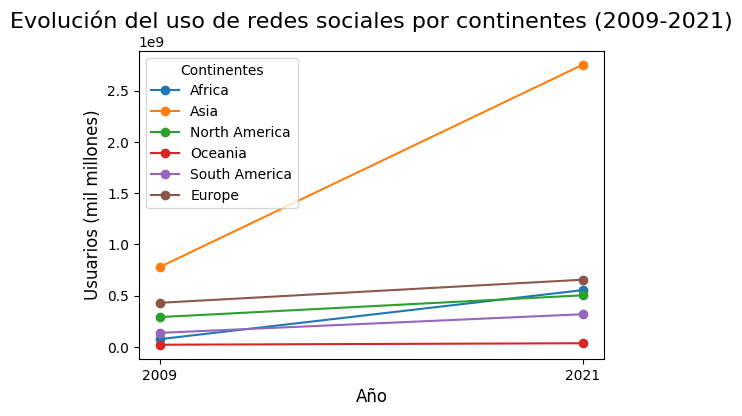

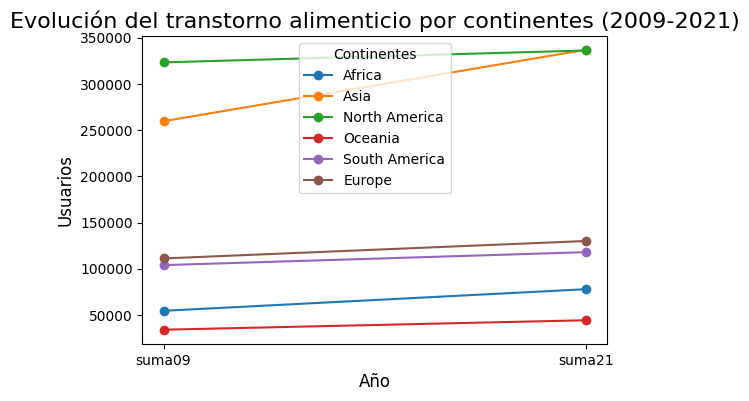

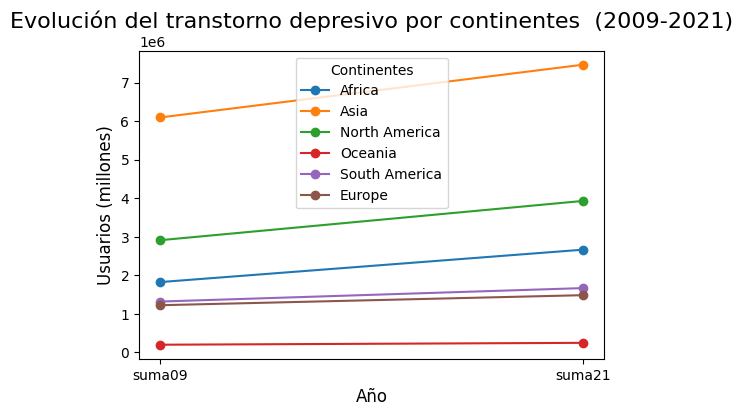

In [435]:
plt.figure(figsize=(6,4))
'''Vamos a ver la evolución de las redes sociales en los ultimos años por continentes. Así podremos compararlo con la gráfica de aumneto de depresión por continentes'''

for column in s_m_continent.columns:
    plt.plot(s_m_continent.index, s_m_continent[column], marker='o', label=column)

# Personalizar el gráfico
plt.title("Evolución del uso de redes sociales por continentes (2009-2021)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Usuarios (mil millones)", fontsize=12)
plt.legend(title="Continentes")

plt.figure(figsize=(6,4))
'''Desordenes alimenticios por género(population) 2009-21'''
for column in eat_sum.columns:
    plt.plot(eat_sum.index,eat_sum[column], marker='o', label=column)

# Personalizar el gráfico
plt.title("Evolución del transtorno alimenticio por continentes (2009-2021)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Usuarios", fontsize=12)
plt.legend(title="Continentes")


plt.figure(figsize=(6,4))
'''Depresión por género(population) 2009-21'''
for column in dep_sum.columns:
    plt.plot(dep_sum.index, dep_sum[column], marker='o', label=column)

# Personalizar el gráfico
plt.title("Evolución del transtorno depresivo por continentes  (2009-2021)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Usuarios (millones)", fontsize=12)
plt.legend(title="Continentes")



Comparando ambas gráficas vemos que en las dos Asia destaca con un alto crecimiento, sin embargo en redes sociales le sigue Europa mientras que en casos de depresión es África. Esto puede deberse a otros factores relacinados con las condiciones de vida entre un continente y otro. Si vamos a la gráfica que nos muestra la evolución por paises según su economía vemos que los extremos, los más pobres y los más ricos, son los que destacan en trastornos depresivos.

--------------------------------------

## **2.1.Correlación entre los datos por género**

Veamos si existe una correlación entre estas variables. Vamos a comenzar analizando la población total (suma de hombres y mujeres por continentes) en cada año.

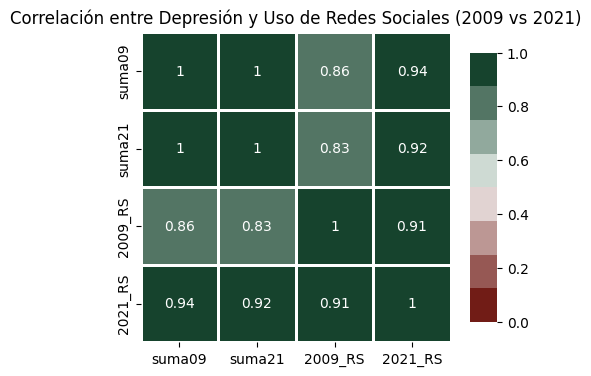

In [436]:
corr_RS_dep_gen=pd.concat([dep_sum.T,s_m_cont_años],axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(corr_RS_dep_gen.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(14, 145, s=80, l=25, n=8),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión y Uso de Redes Sociales (2009 vs 2021)");


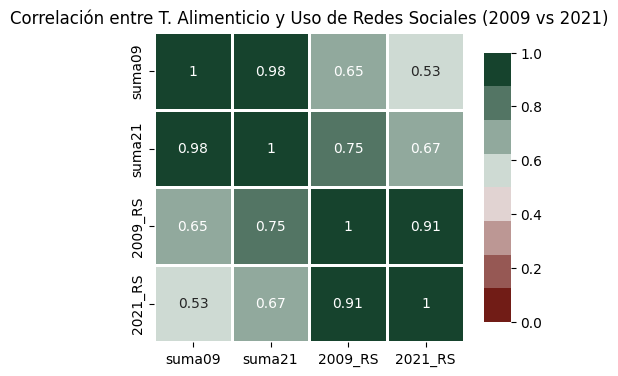

In [437]:
corr_RS_eat_gen=pd.concat([eat_sum.T,s_m_cont_años],axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(corr_RS_eat_gen.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(14, 145, s=80, l=25, n=8),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T. Alimenticio y Uso de Redes Sociales (2009 vs 2021)");

Hacemos un test para ver si las correlaciones obtenidas son o no significativas.

In [438]:
def test_corr(r,n):#correlacion y muestra(continentes)
    # Grados de libertad
    df = n - 2

    # Cálculo de t
    t = r * ((n - 2) ** 0.5) / ((1 - r**2) ** 0.5)

    # Valor p (dos colas)
    p_value = stats.t.sf(abs(t), df) * 2

    return p_value

In [439]:
p_eat_09=test_corr(0.64,6)
p_eat_21=test_corr(0.66,6)

p_dep_09=test_corr(0.92,6)
p_dep_21=test_corr(0.86,6)

print(f"p_value depresión 2009: {round(p_dep_09,2)}")
print(f"p_value depresión 2021: {round(p_dep_21,2)}")
print(f"p_value t. alimenticios 2009: {round(p_eat_09,2)}")
print(f"p_value t. alimenticios 2021: {round(p_eat_21,2)}")

p_value depresión 2009: 0.01
p_value depresión 2021: 0.03
p_value t. alimenticios 2009: 0.17
p_value t. alimenticios 2021: 0.15


Vemos una alta correlación entre el número de personas que usan redes sociales y que sufren depresión. También podemeos notar que en 2021 la correlación es mayor que en 2009, lo que nos puede indicar que cuanto más integradas están las redes sociales en nuestras vidas, más vulnerables somos a sufrir un trastorno depresivo. 

Respecto a trastornos alimenticios vemos que la correlación s de 0.64 en 2009 y de 0.64 en 2021. Podríamos pensar que hay una cierta correlación, sin embarco el p_valor en ambos casos es mayor que 0.05(umbral). Esto también puede deberse a que el tamaño de la muestra(continentes) es muy pequeño, lo que hace que sea más difícil tener una correlación. Por otro lado con la depresión parece que si que exsite una correlación, aunque al igual que antes, al tener ua muestra pequeña no se puede asegurar esta relación directa.

- **IMPORTANTE:** no estamos mostrando una causalidad entre los datos con la correlación, solo estamos probando si el crecimiento de los datos que comparamos es similar. Podemos intuir que puede existir una cierta causalidad, pero no asegurarlo.

-----------------------

### Veamos los datos por separación en géneros
Vamos a ver que correlación obteneos si suponemos que el uso de redes es igual en hombres y en mujeres. Considaremos que los datos obtenidos son válidos si coinciden con los obtenidos en la población total afectada

In [440]:
c=pd.concat([dep_M_09_num.T,dep_M_21_num.T]).T
z=pd.concat([dep_F_09_num.T,dep_F_21_num.T]).T
c1=pd.concat([eat_M_09_num.T,eat_M_21_num.T]).T
z1=pd.concat([eat_F_09_num.T,eat_F_21_num.T]).T

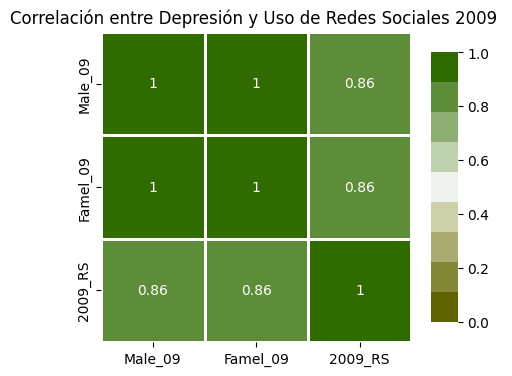

In [441]:
RS_dep_09=pd.concat([c["Male_09"],z["Famel_09"],s_m_cont_años[["2009_RS"]]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(RS_dep_09.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión y Uso de Redes Sociales 2009 ");

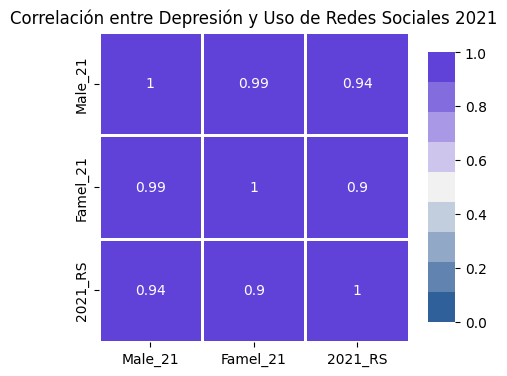

In [442]:
RS_dep_21=pd.concat([c["Male_21"],z["Famel_21"],s_m_cont_años[["2021_RS"]]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(RS_dep_21.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión y Uso de Redes Sociales 2021");

#### Veamos ahora los casos para trastornos alimenticios

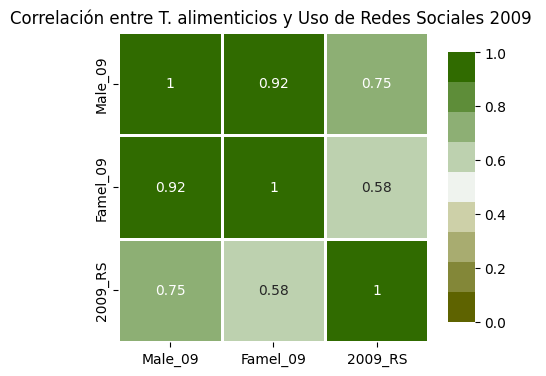

In [443]:
RS_eat_09=pd.concat([c1["Male_09"],z1["Famel_09"],s_m_cont_años[["2009_RS"]]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(RS_eat_09.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T. alimenticios y Uso de Redes Sociales 2009 ");

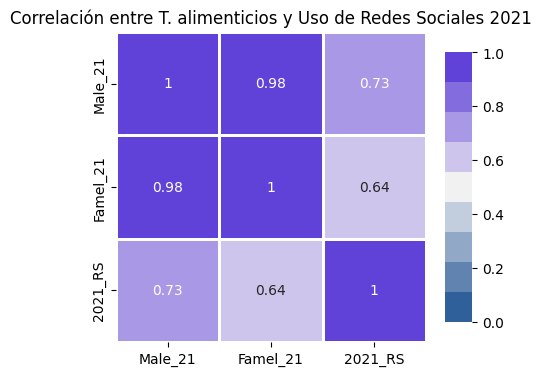

In [444]:
RS_eat_21=pd.concat([c1["Male_21"],z1["Famel_21"],s_m_cont_años[["2021_RS"]]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(RS_eat_21.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T. alimenticios y Uso de Redes Sociales 2021");

In [445]:
p_eat_09_M=test_corr(0.74,6)
p_eat_21_M=test_corr(0.72,6)
p_eat_09_F=test_corr(0.57,6)
p_eat_21_F=test_corr(0.63,6)

p_dep_09_M=test_corr(0.86,6)
p_dep_21_M=test_corr(0.94,6)
p_dep_09_F=test_corr(0.85,6)
p_dep_21_F=test_corr(0.90,6)

print(f"p_value depresión 2009 M: {round(p_dep_09_M,2)}")
print(f"p_value depresión 2021 M: {round(p_dep_21_M,2)}")
print(f"p_value t. alimenticios 2009 M: {round(p_eat_09_M,2)}")
print(f"p_value t. alimenticios 2021 M: {round(p_eat_21_M,2)}")
print(f"p_value depresión 2009 F: {round(p_dep_09_F,2)}")
print(f"p_value depresión 2021 F: {round(p_dep_21_F,2)}")
print(f"p_value t. alimenticios 2009 F: {round(p_eat_09_F,2)}")
print(f"p_value t. alimenticios 2021 F: {round(p_eat_21_F,2)}")

p_value depresión 2009 M: 0.03
p_value depresión 2021 M: 0.01
p_value t. alimenticios 2009 M: 0.09
p_value t. alimenticios 2021 M: 0.11
p_value depresión 2009 F: 0.03
p_value depresión 2021 F: 0.01
p_value t. alimenticios 2009 F: 0.24
p_value t. alimenticios 2021 F: 0.18


Soponiendo que el uso de redes sociales entre hombres y mujeres es equitativo, hacemos una correlación entre la población que sufre depresión y trastornos alimneticios en cada continente, dividida por género, y el uso de redes sociales por continentes.

En este caso, seguimos viendo una correlación muy alta entre la depresión y el aumento del uso de redes sociales. Aunque los otros datos no podemos considerarlos significativos vemos que hay una mayor correlación en los hombres que en las mujeres.

----------------------------

### *Analizamos las correlaciones en cada continente*

Para tener un análisis un poco más concreto, vamos a analizar estos mismo datos dividiendo los paises según al continente al que pertenecen. De este modo tendremos una visión más completa del impacto del uso de redes sociales en cada continete según el género.

In [446]:
'''Hacemos una separación de los datos de depresión por géneros según los paises de cada continente '''
dep_f_21_africa=(dep_gen.T).loc["famel_21",cont_paises["Africa"]].rename(index={"":"famel_21"})
dep_f_21_asia=(dep_gen.T).loc["famel_21",cont_paises["Asia"]].rename(index={"":"famel_21"})
dep_f_21_oceania=(dep_gen.T).loc["famel_21",cont_paises["Oceania"]].rename(index={"":"famel_21"})
dep_f_21_sa=(dep_gen.T).loc["famel_21",cont_paises["South America"]].rename(index={"":"famel_21"})
dep_f_21_na=(dep_gen.T).loc["famel_21",cont_paises["North America"]].rename(index={"":"famel_21"})
dep_f_21_eu=(dep_gen.T).loc["famel_21",cont_paises["Europe"]].rename(index={"":"famel_21"})

dep_m_21_africa=(dep_gen.T).loc["male_21",cont_paises["Africa"]].rename(index={"":"male_21"})
dep_m_21_asia=(dep_gen.T).loc["male_21",cont_paises["Asia"]].rename(index={"":"male_21"})
dep_m_21_oceania=(dep_gen.T).loc["male_21",cont_paises["Oceania"]].rename(index={"":"male_21"})
dep_m_21_sa=(dep_gen.T).loc["male_21",cont_paises["South America"]].rename(index={"":"male_21"})
dep_m_21_na=(dep_gen.T).loc["male_21",cont_paises["North America"]].rename(index={"":"male_21"})
dep_m_21_eu=(dep_gen.T).loc["male_21",cont_paises["Europe"]].rename(index={"":"male_21"})

dep_f_09_africa=(dep_gen.T).loc["famel_09",cont_paises["Africa"]].rename(index={"":"famel_09"})
dep_f_09_asia=(dep_gen.T).loc["famel_09",cont_paises["Asia"]].rename(index={"":"famel_09"})
dep_f_09_oceania=(dep_gen.T).loc["famel_09",cont_paises["Oceania"]].rename(index={"":"famel_09"})
dep_f_09_sa=(dep_gen.T).loc["famel_09",cont_paises["South America"]].rename(index={"":"famel_09"})
dep_f_09_na=(dep_gen.T).loc["famel_09",cont_paises["North America"]].rename(index={"":"famel_09"})
dep_f_09_eu=(dep_gen.T).loc["famel_09",cont_paises["Europe"]].rename(index={"":"famel_09"})

dep_m_09_africa=(dep_gen.T).loc["male_09",cont_paises["Africa"]].rename(index={"":"male_09"})
dep_m_09_asia=(dep_gen.T).loc["male_09",cont_paises["Asia"]].rename(index={"":"male_09"})
dep_m_09_oceania=(dep_gen.T).loc["male_09",cont_paises["Oceania"]].rename(index={"":"male_09"})
dep_m_09_sa=(dep_gen.T).loc["male_09",cont_paises["South America"]].rename(index={"":"male_09"})
dep_m_09_na=(dep_gen.T).loc["male_09",cont_paises["North America"]].rename(index={"":"male_09"})
dep_m_09_eu=(dep_gen.T).loc["male_09",cont_paises["Europe"]].rename(index={"":"male_09"})

'''Hacemos los mismo para trastornos alimneticios por generos'''
eat_f_21_africa=(eat_gen.T).loc["famel_21",cont_paises["Africa"]].rename(index={"":"famel_21"})
eat_f_21_asia=(eat_gen.T).loc["famel_21",cont_paises["Asia"]].rename(index={"":"famel_21"})
eat_f_21_oceania=(eat_gen.T).loc["famel_21",cont_paises["Oceania"]].rename(index={"":"famel_21"})
eat_f_21_sa=(eat_gen.T).loc["famel_21",cont_paises["South America"]].rename(index={"":"famel_21"})
eat_f_21_na=(eat_gen.T).loc["famel_21",cont_paises["North America"]].rename(index={"":"famel_21"})
eat_f_21_eu=(eat_gen.T).loc["famel_21",cont_paises["Europe"]].rename(index={"":"famel_21"})

eat_m_21_africa=(eat_gen.T).loc["male_21",cont_paises["Africa"]].rename(index={"":"male_21"})
eat_m_21_asia=(eat_gen.T).loc["male_21",cont_paises["Asia"]].rename(index={"":"male_21"})
eat_m_21_oceania=(eat_gen.T).loc["male_21",cont_paises["Oceania"]].rename(index={"":"male_21"})
eat_m_21_sa=(eat_gen.T).loc["male_21",cont_paises["South America"]].rename(index={"":"male_21"})
eat_m_21_na=(eat_gen.T).loc["male_21",cont_paises["North America"]].rename(index={"":"male_21"})
eat_m_21_eu=(eat_gen.T).loc["male_21",cont_paises["Europe"]].rename(index={"":"male_21"})

eat_f_09_africa=(eat_gen.T).loc["famel_09",cont_paises["Africa"]].rename(index={"":"famel_09"})
eat_f_09_asia=(eat_gen.T).loc["famel_09",cont_paises["Asia"]].rename(index={"":"famel_09"})
eat_f_09_oceania=(eat_gen.T).loc["famel_09",cont_paises["Oceania"]].rename(index={"":"famel_09"})
eat_f_09_sa=(eat_gen.T).loc["famel_09",cont_paises["South America"]].rename(index={"":"famel_09"})
eat_f_09_na=(eat_gen.T).loc["famel_09",cont_paises["North America"]].rename(index={"":"famel_09"})
eat_f_09_eu=(eat_gen.T).loc["famel_09",cont_paises["Europe"]].rename(index={"":"famel_09"})

eat_m_09_africa=(eat_gen.T).loc["male_09",cont_paises["Africa"]].rename(index={"":"male_09"})
eat_m_09_asia=(eat_gen.T).loc["male_09",cont_paises["Asia"]].rename(index={"":"male_09"})
eat_m_09_oceania=(eat_gen.T).loc["male_09",cont_paises["Oceania"]].rename(index={"":"male_09"})
eat_m_09_sa=(eat_gen.T).loc["male_09",cont_paises["South America"]].rename(index={"":"male_09"})
eat_m_09_na=(eat_gen.T).loc["male_09",cont_paises["North America"]].rename(index={"":"male_09"})
eat_m_09_eu=(eat_gen.T).loc["male_09",cont_paises["Europe"]].rename(index={"":"male_09"})

'''Redes sociales dividas por los paises a los que pertenece cada continete'''
s_m_africa=s_m.loc[:,cont_paises["Africa"]]
s_m_asia=s_m.loc[:,cont_paises["Asia"]]
s_m_oceania=s_m.loc[:,cont_paises["Oceania"]]
s_m_sa=s_m.loc[:,cont_paises["South America"]]
s_m_na=s_m.loc[:,cont_paises["North America"]]
s_m_eu=s_m.loc[:,cont_paises["Europe"]]

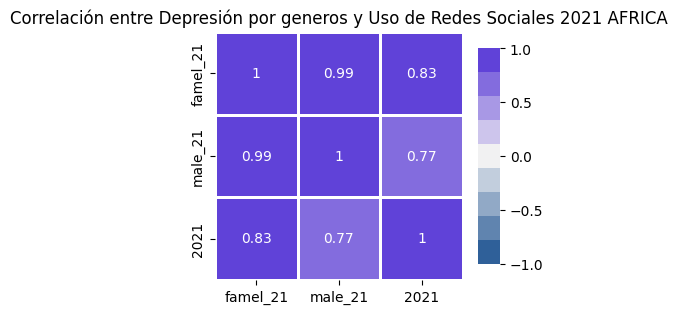

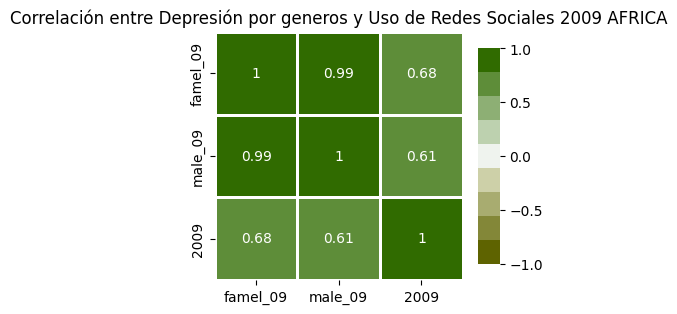

In [447]:
dep_af=pd.concat([dep_f_21_africa.T,dep_m_21_africa.T,(s_m_africa.T)["2021"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(dep_af.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2021 AFRICA");
correl=pd.concat([dep_f_09_africa.T,dep_m_09_africa.T,(s_m_africa.T)["2009"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2009 AFRICA");

In [448]:
p_v_dep_09_af=test_corr(0.61,54)
p_v_dep_21_af=test_corr(0.77,54)
print(f"El p_valor de Africa en 2009 es: {p_v_dep_09_af}")
print(f"El p_valor de Africa en 2021 es: {p_v_dep_21_af}")


El p_valor de Africa en 2009 es: 9.749795744491689e-07
El p_valor de Africa en 2021 es: 1.0051371490569455e-11


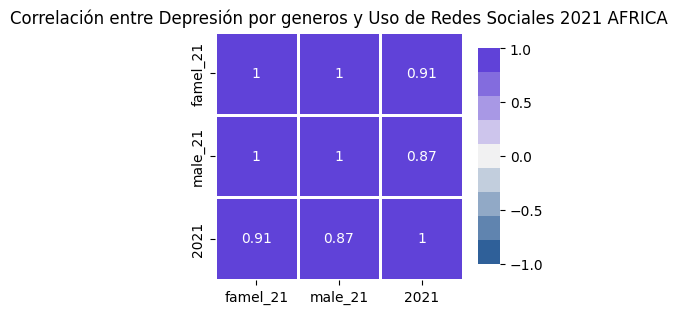

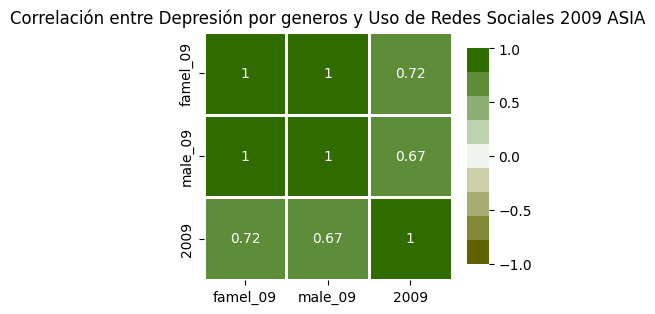

In [449]:
dep_af=pd.concat([dep_f_21_asia.T,dep_m_21_asia.T,(s_m_asia.T)["2021"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(dep_af.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2021 AFRICA");
correl=pd.concat([dep_f_09_asia.T,dep_m_09_asia.T,(s_m_asia.T)["2009"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2009 ASIA");

In [450]:
p_v_dep_09_as=test_corr(67,46)
p_v_dep_21_as=test_corr(0.87,46)
print(f"El p_valor de Asia en 2009 es: {p_v_dep_09_as}")
print(f"El p_valor de Asia en 2021 es: {p_v_dep_21_as}")


El p_valor de Asia en 2009 es: 3.94020638609137e-08
El p_valor de Asia en 2021 es: 4.1928821884543746e-15


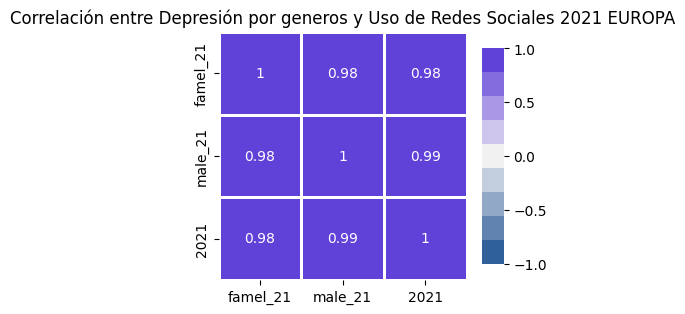

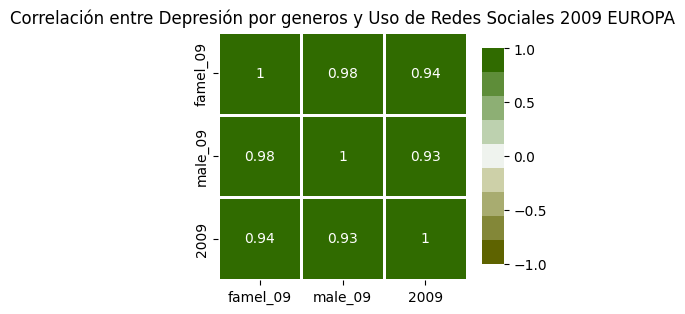

In [451]:
dep_eu=pd.concat([dep_f_21_eu.T,dep_m_21_eu.T,(s_m_eu.T)["2021"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(dep_eu.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2021 EUROPA");
correl=pd.concat([dep_f_09_eu.T,dep_m_09_eu.T,(s_m_eu.T)["2009"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2009 EUROPA");

In [452]:
p_v_dep_09_eu=test_corr(0.93,46)
p_v_dep_21_eu=test_corr(0.98,46)
print(f"El p_valor de Europa en 2009 es: {p_v_dep_09_eu}")
print(f"El p_valor de Europa en 2021 es: {p_v_dep_21_eu}")


El p_valor de Europa en 2009 es: 9.598824630501448e-21
El p_valor de Europa en 2021 es: 1.719593942903765e-32


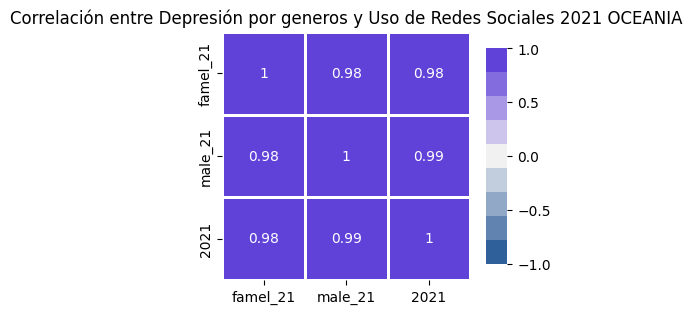

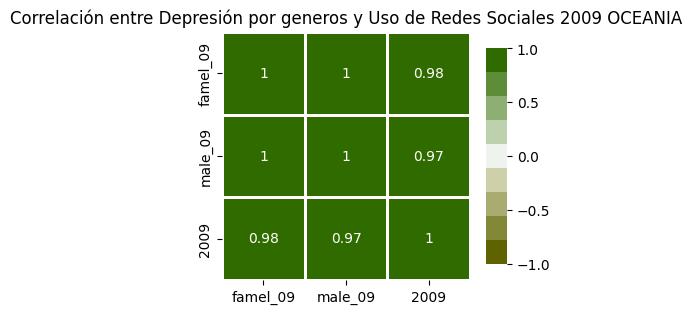

In [453]:
dep_oc=pd.concat([dep_f_21_oceania.T,dep_m_21_oceania.T,(s_m_oceania.T)["2021"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(dep_eu.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2021 OCEANIA");
correl=pd.concat([dep_f_09_oceania.T,dep_m_09_oceania.T,(s_m_oceania.T)["2009"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2009 OCEANIA");

In [454]:
p_v_dep_09_oc=test_corr(0.97,15)
p_v_dep_21_oc=test_corr(0.98,15)
print(f"El p_valor de Europa en 2009 es: {p_v_dep_09_oc}")
print(f"El p_valor de Europa en 2021 es: {p_v_dep_21_oc}")


El p_valor de Europa en 2009 es: 2.308708680588735e-09
El p_valor de Europa en 2021 es: 1.6952374629749205e-10


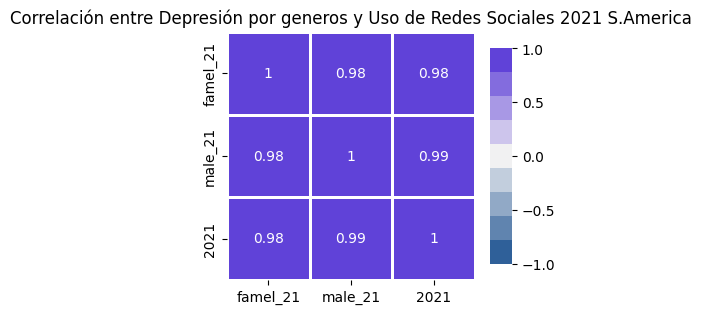

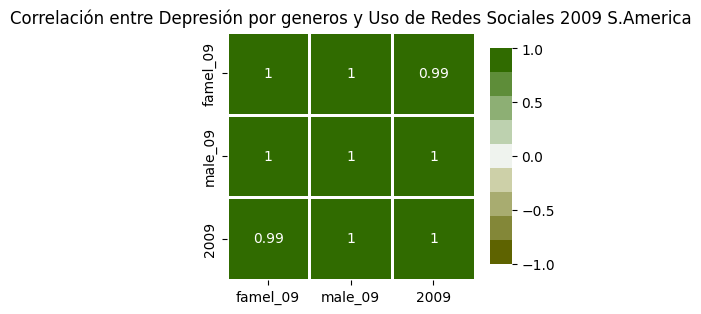

In [455]:
dep_sa=pd.concat([dep_f_21_sa.T,dep_m_21_sa.T,(s_m_sa.T)["2021"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(dep_eu.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2021 S.America");
correl=pd.concat([dep_f_09_sa.T,dep_m_09_sa.T,(s_m_sa.T)["2009"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2009 S.America");

In [456]:
p_v_dep_09_sa=test_corr(0.99,22)
p_v_dep_21_sa=test_corr(0.98,22)
print(f"El p_valor de Europa en 2009 es: {p_v_dep_09_sa}")
print(f"El p_valor de Europa en 2021 es: {p_v_dep_21_sa}")


El p_valor de Europa en 2009 es: 1.7317859871502e-18
El p_valor de Europa en 2021 es: 1.7018209465811399e-15


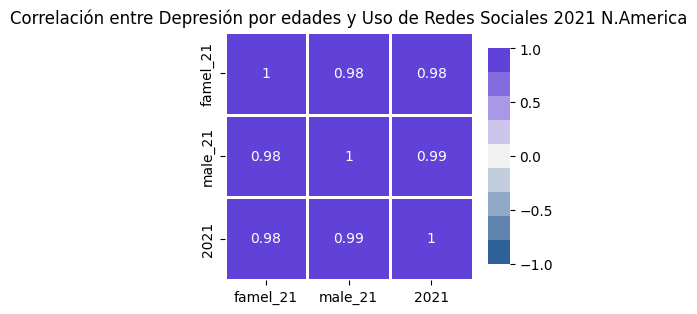

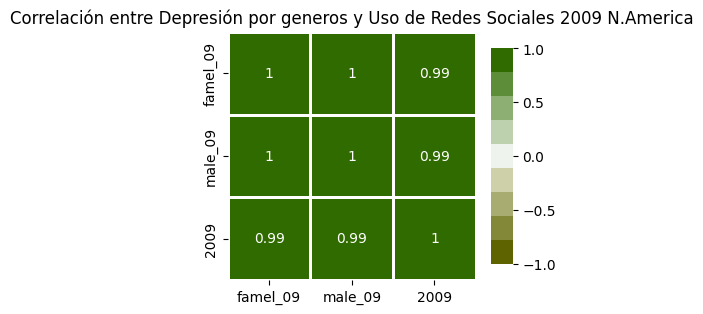

In [457]:
dep_na=pd.concat([dep_f_21_na.T,dep_m_21_na.T,(s_m_na.T)["2021"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(dep_eu.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2021 N.America");
correl=pd.concat([dep_f_09_na.T,dep_m_09_na.T,(s_m_na.T)["2009"]],axis=1)
plt.figure(figsize=(4,4))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por generos y Uso de Redes Sociales 2009 N.America");

In [458]:
p_v_dep_09_na=test_corr(0.99,14)
p_v_dep_21_na=test_corr(0.99,14)
print(f"El p_valor de NA en 2009 es: {p_v_dep_09_na}")
print(f"El p_valor de NA en 2021 es: {p_v_dep_21_na}")

El p_valor de NA en 2009 es: 1.4130820027045868e-11
El p_valor de NA en 2021 es: 1.4130820027045868e-11


Analizanado los datos obtenidos de los p_valores y haciendo el test de correlación, vemos que en todos los continetes existe una correlación fuerte entre el uso de redes sociales con las personas que sufren depresión.

- ### **HIPÓTESIS**

        Los resultados obtenidos confirman en gran medida una de las hipótesis iniciales:  parece exisitir una relación directa entre el uso de redes sociales y el padecer trastornos depresivos. 

        Al analizar los datos de forma general parece exisitir una mayor correlación en 2009, sin embargo, al tomar los datos por continentes observamos que, en la mayoría de los continentes, es mayor en 2021. Esta pequeña diferencia entre un continente y otro es lo que puede estar alterando los datos globales.

        Por otro lado, no podemos asegurar que exista una mayor relación en el caso de mujeres que de hombres. Por tanto,la hipótesis de que las mujeres son más vulnerables a padecer depresión en relación al uso de RRSS no podemos confirmarla. 
        

 **NOTA:** *Hay que tener en cuenta que en el uso de redes sociales estamos comparando valores   totales, sin dividirlos por género, lo que puede hacer que varien ligeramente los resultados. Sin embargo, como los datos obtenidos al dividir la población por géneros son muy similares a los datos globales podemos intuir que el estudio nos aporta una información bastante válida*

------------------------

## **2.2.Veamos la correlación por economía**

Vamos a comenzar haciendo un análisis global de los resultados. Para ello haremos uso de los datos obtenidos al sumar los hombres y mujeres en cada nivel económico, obteniendo así una población total afectada por cada trastorno.
De este modo podremos hacer una comparación con los datos del uso de redes según la economía de la región.

In [459]:
q1=pd.concat([eat_gen_icm.loc[:,["famel_09"]].T,eat_gen_icm.loc[:,["male_09"]].T]).T
l1=pd.concat([eat_gen_icm.loc[:,["famel_21"]].T,eat_gen_icm.loc[:,["male_21"]].T]).T
q1["suma09"]=q1["famel_09"]+q1["male_09"]
l1["suma21"]=l1["famel_21"]+l1["male_21"]
q1=q1.drop(columns=["famel_09","male_09"])
l1=l1.drop(columns=["male_21","famel_21"])
eat_sum_icm=pd.concat([l1,q1],axis=1).T

In [460]:
q2=pd.concat([dep_gen_icm.loc[:,["famel_09"]].T,dep_gen_icm.loc[:,["male_09"]].T]).T
l2=pd.concat([dep_gen_icm.loc[:,["famel_21"]].T,dep_gen_icm.loc[:,["male_21"]].T]).T
q2["suma09"]=q2["famel_09"]+q2["male_09"]
l2["suma21"]=l2["famel_21"]+l2["male_21"]
q2=q2.drop(columns=["famel_09","male_09"])
l2=l2.drop(columns=["male_21","famel_21"])
dep_sum_icm=pd.concat([l2,q2],axis=1).T

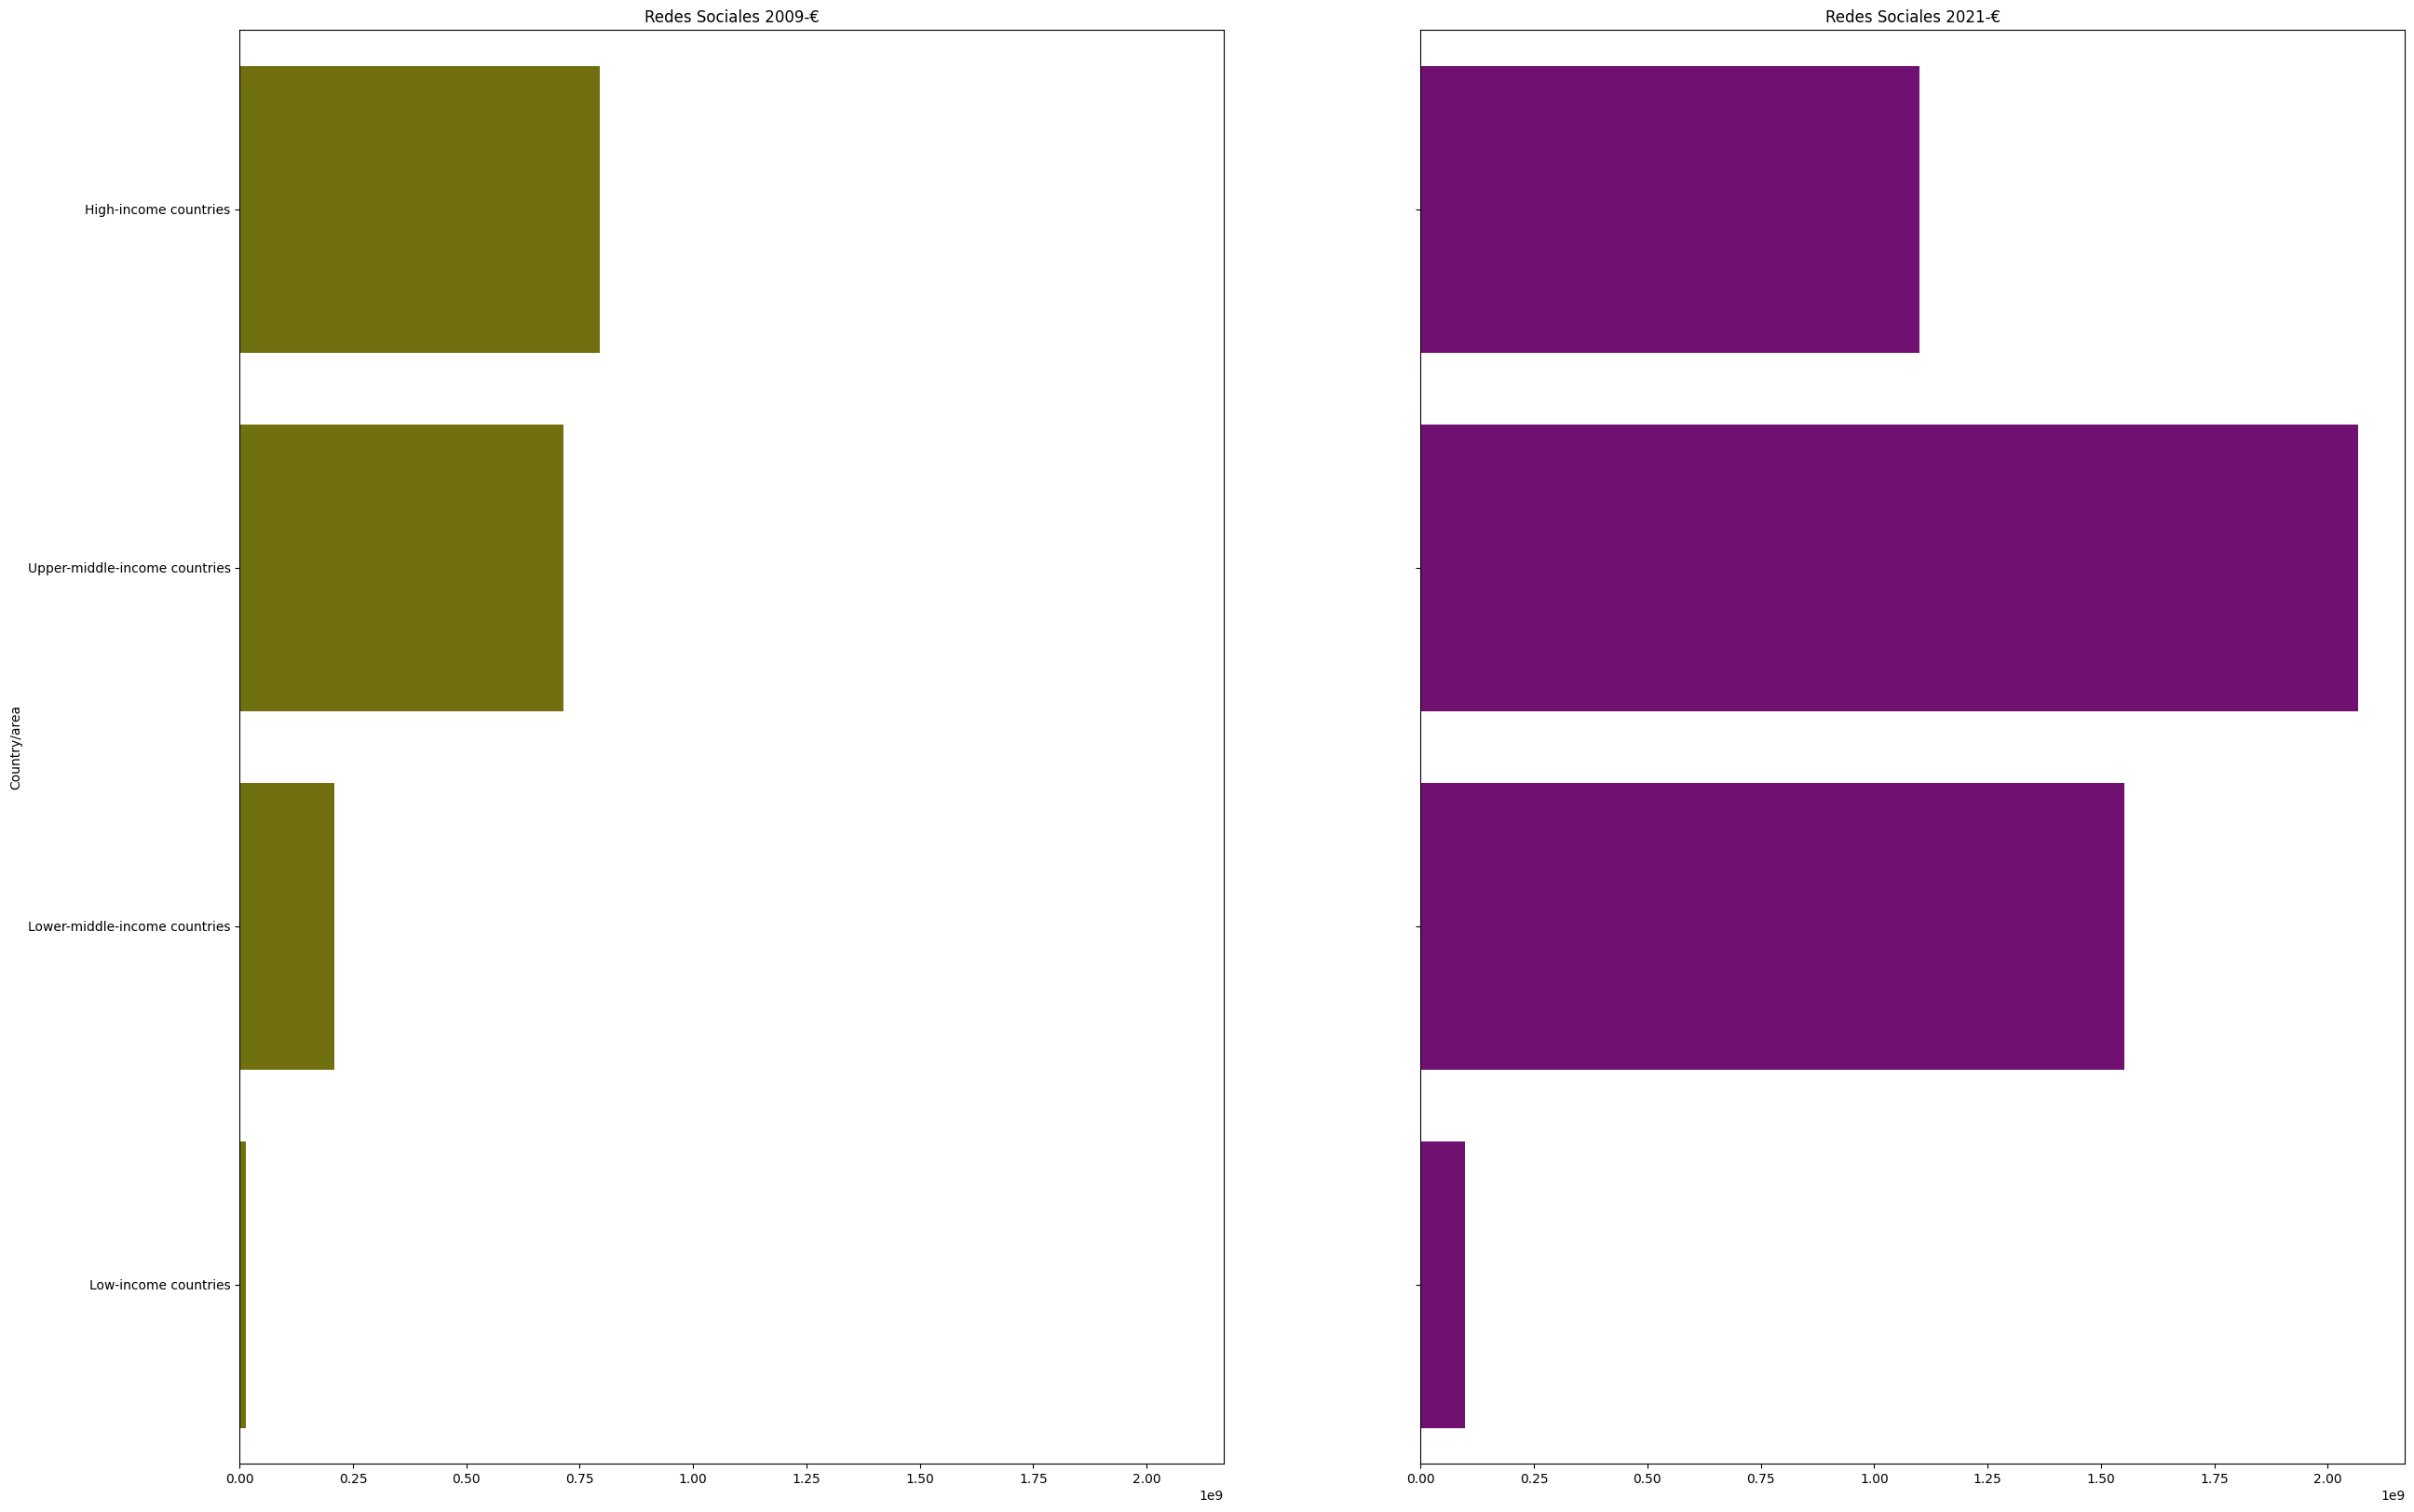

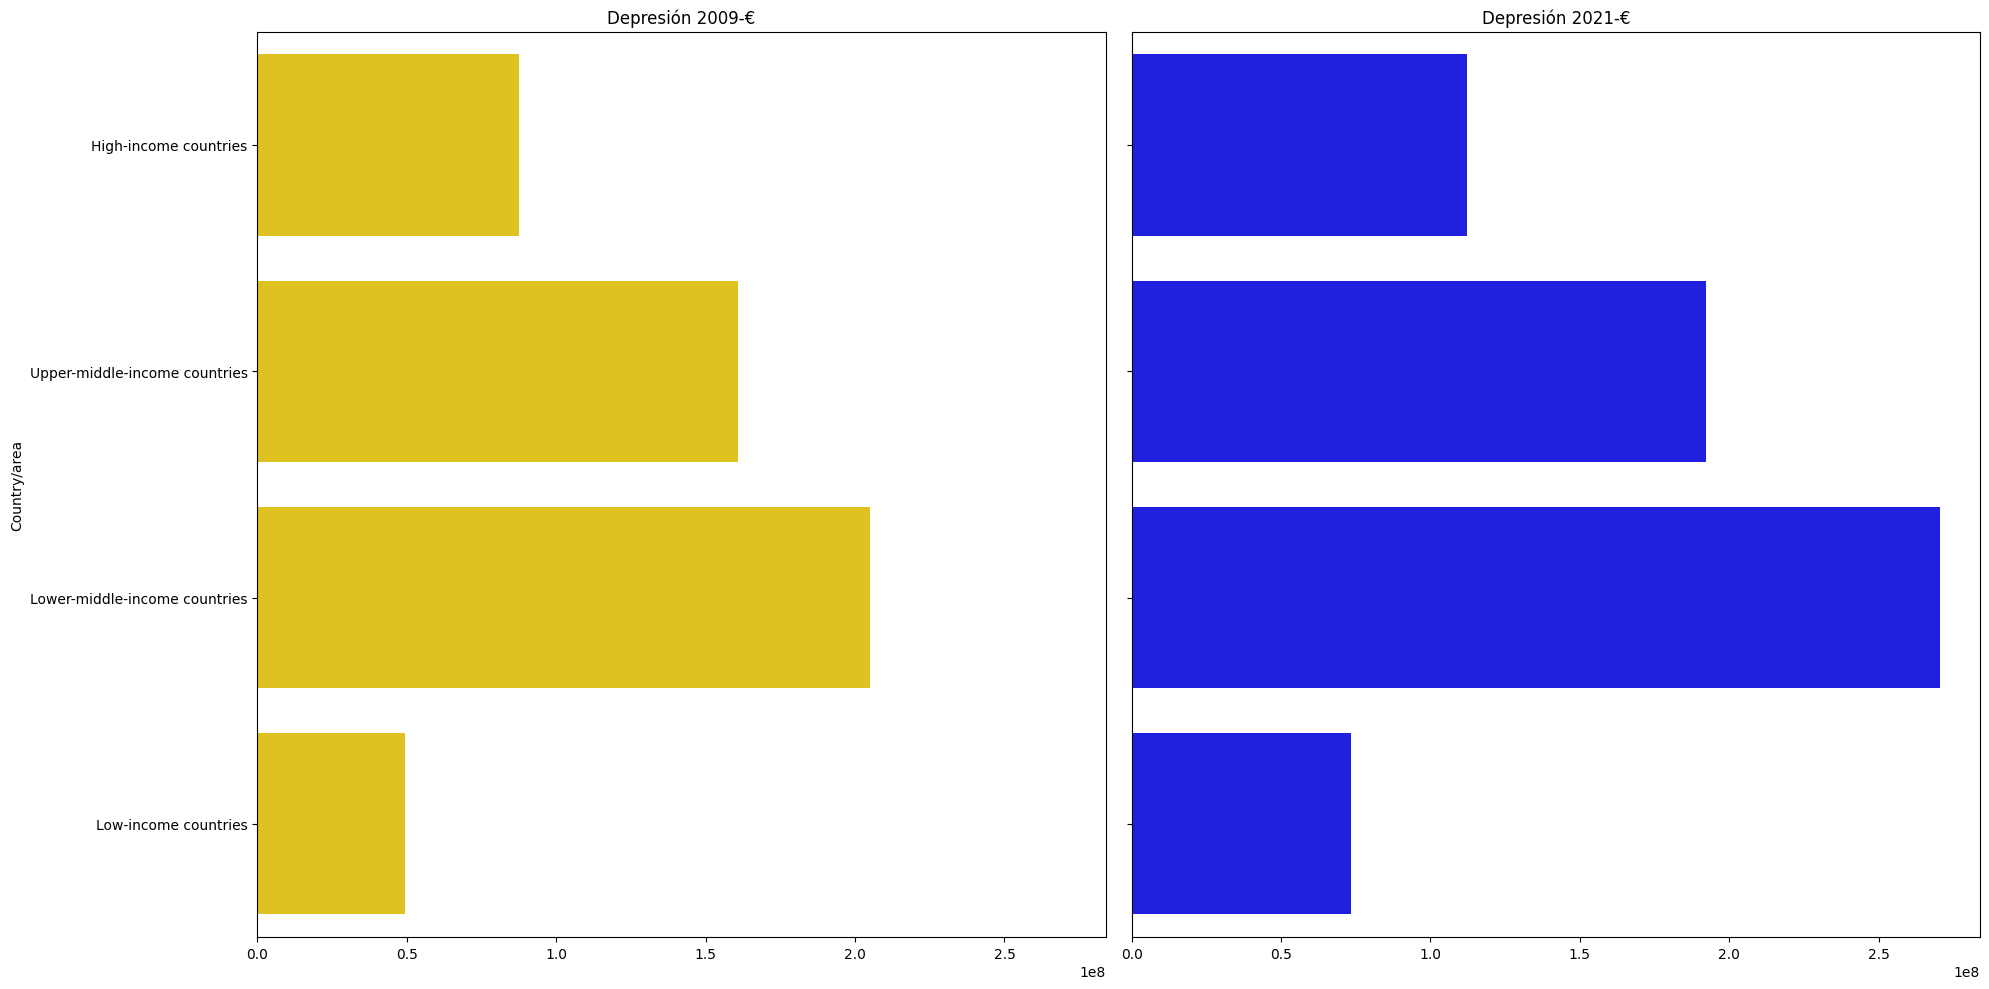

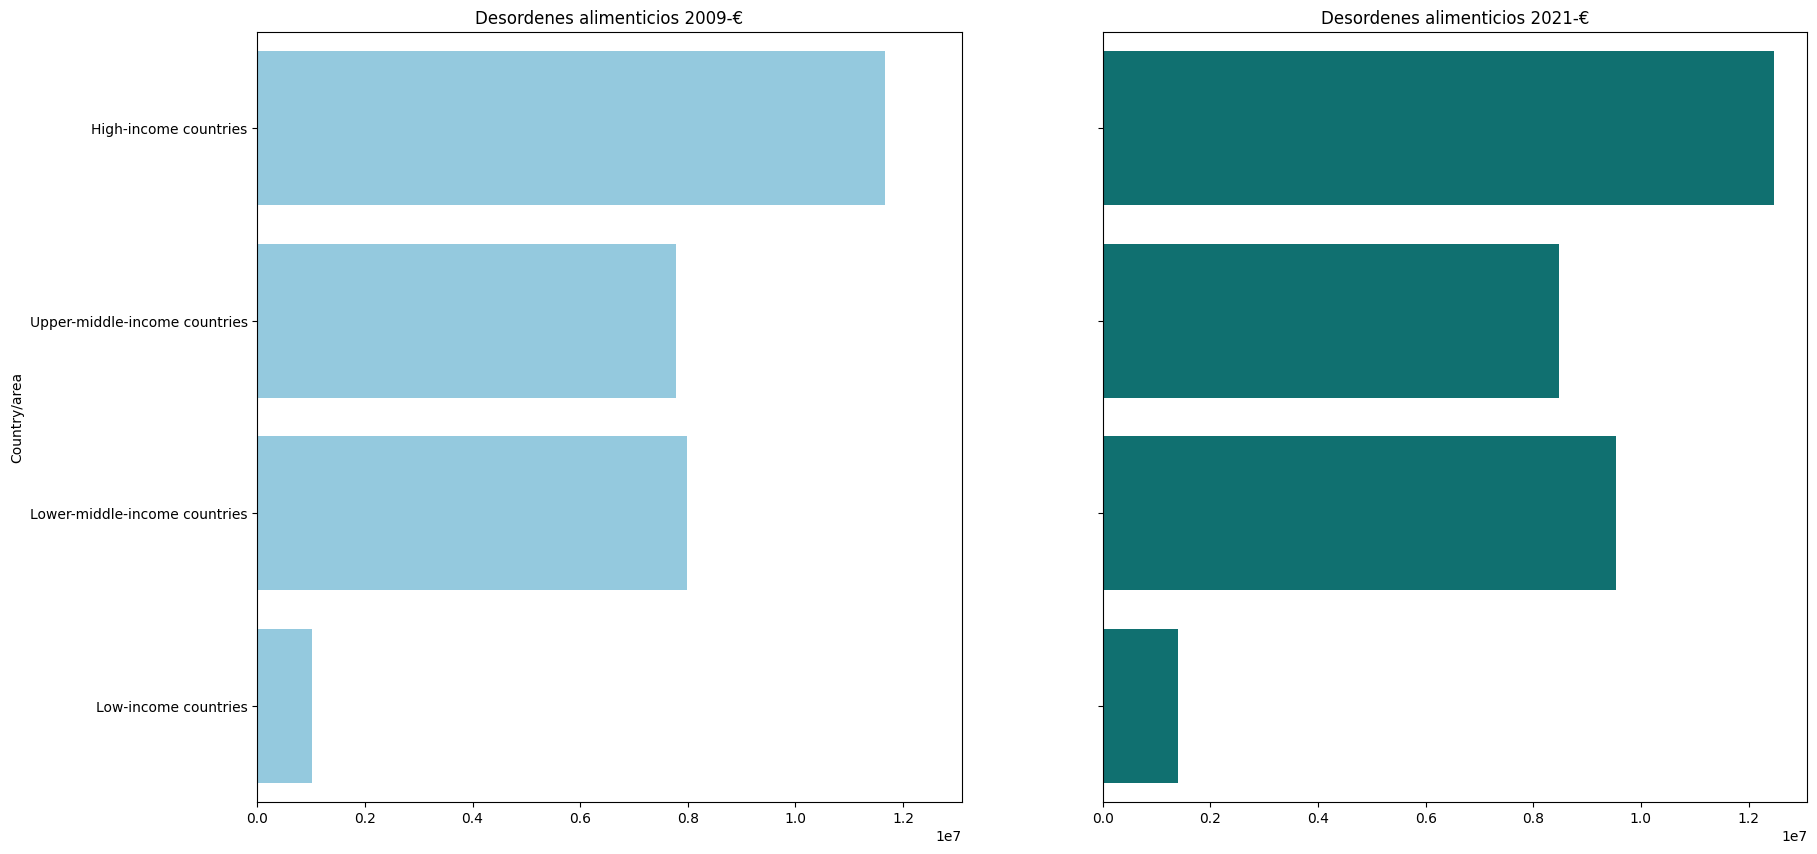

In [461]:
f, axes = plt.subplots(1,2, figsize=(30,20), sharex=True)
h=(dep_sum_icm.T).loc[:,'suma09'].reset_index()
h1=(dep_sum_icm.T).loc[:,'suma21'].reset_index()
l=(s_m_icm_09.T).reset_index()
z=(s_m_icm_21.T).reset_index()

sns.barplot(l,x='2009',y ="Country/area", color="olive", ax=axes[0])
axes[0].set_title('Redes Sociales 2009-€')

sns.barplot(z, x='2021', y ="Country/area", color="purple", ax=axes[1])
axes[1].set_title('Redes Sociales 2021-€')
axes[1].set_ylabel('') 
axes[1].set_xlabel('') 
axes[0].set_xlabel('') 
axes[1].set_yticklabels([]);
 
# Ajustar el diseño
f, axes = plt.subplots(1,2, figsize=(20,10), sharex=True)
sns.barplot(h,x='suma09',y ="Country/area", color="gold", ax=axes[0])
axes[0].set_title('Depresión 2009-€')

sns.barplot(h1, x='suma21',y ="Country/area", color="blue", ax=axes[1])
axes[1].set_title('Depresión 2021-€')
axes[1].set_ylabel('') 
axes[1].set_xlabel('') 
axes[0].set_xlabel('') 
axes[1].set_yticklabels([]);

plt.tight_layout()
plt.show()
f, axes = plt.subplots(1,2, figsize=(20,10), sharex=True)

k=(eat_sum_icm.T).loc[:,'suma09'].reset_index()
k1=(eat_sum_icm.T).loc[:,'suma21'].reset_index()
sns.barplot(k,x='suma09',y ="Country/area", color="skyblue", ax=axes[0])
axes[0].set_title('Desordenes alimenticios 2009-€')
sns.barplot(k1, x='suma21',y ="Country/area", color="teal", ax=axes[1])
axes[1].set_title('Desordenes alimenticios 2021-€')
axes[1].set_ylabel('') 
axes[1].set_xlabel('') 
axes[0].set_xlabel('') 
axes[1].set_yticklabels([]);


Podemos ver que el mayor aumneto del uso de redes sociales se da en paises con un poder adquisitivo medio, esto puede deberse a que en 2009 ya estaban muy normalizadas en la vida cotidiana las plataformas en los paises más ricos. Por otro lado también observamos que la mayor diferencia entre los trastornos de un año a otro se produce también en estos mismo paise.Esto puede deberse a una mayor concienciación sobre la salud mental. 

Tras un vistazo general podríamos pensar que puede existir una cierte relación. Para comprobarlo vamos a analizar los p_values

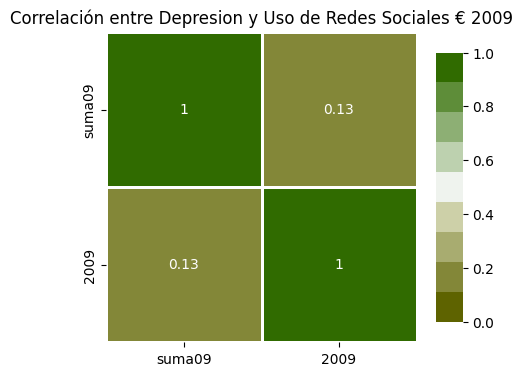

In [462]:
correl=pd.concat([dep_sum_icm.T["suma09"],s_m_icm_09.T],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresion y Uso de Redes Sociales € 2009" );

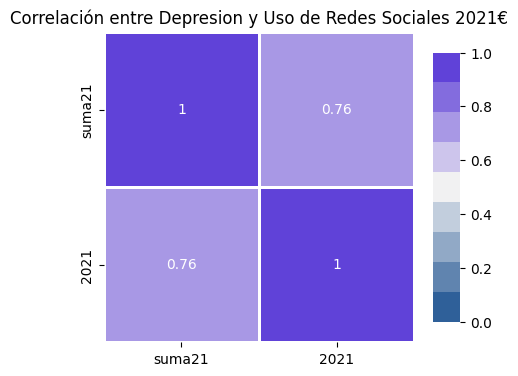

In [463]:
correl=pd.concat([dep_sum_icm.T["suma21"],s_m_icm_21.T],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresion y Uso de Redes Sociales 2021€");

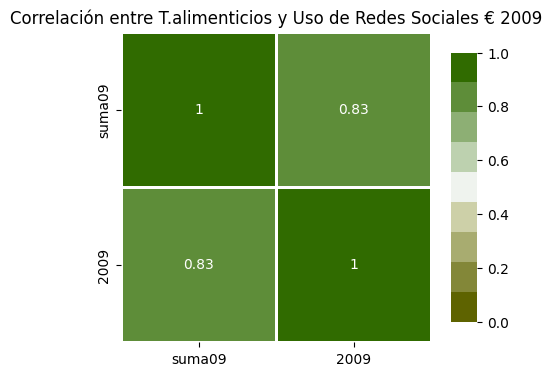

In [464]:
correl=pd.concat([eat_sum_icm.T["suma09"],s_m_icm_09.T],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.alimenticios y Uso de Redes Sociales € 2009" );

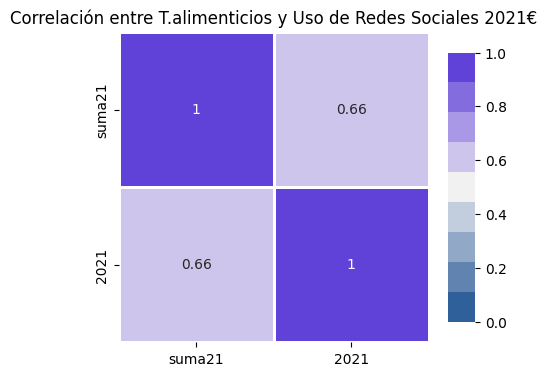

In [465]:
correl=pd.concat([eat_sum_icm.T["suma21"],s_m_icm_21.T],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=0,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.alimenticios y Uso de Redes Sociales 2021€");

In [466]:
p_eat_09_icm=test_corr(0.13,4)#en este caso es 4 que son la clasificación según la economía
p_eat_21_icm=test_corr(0.66,4)
p_dep_09_icm=test_corr(0.57,4)
p_dep_21_icm=test_corr(0.76,4)

print(f"p_value depresión 2009 M: {round(p_dep_09_icm,2)}")
print(f"p_value depresión 2021 M: {round(p_dep_21_icm,2)}")
print(f"p_value t. alimenticios 2009 M: {round(p_eat_09_icm,2)}")
print(f"p_value t. alimenticios 2021 M: {round(p_eat_21_icm,2)}")

p_value depresión 2009 M: 0.43
p_value depresión 2021 M: 0.24
p_value t. alimenticios 2009 M: 0.87
p_value t. alimenticios 2021 M: 0.34


- ## **HIPÓTESIS**
        Al analizar la relación entre la prevalencia de depresión y el uso de redes sociales según la clasificación económica de los países, no se encontró una correlación válida. Esto sugiere que, a nivel económico, no parece haber una relación consistente entre estas variables.

        Una de las causas de este resultado podría ser el acceso a servicios de salud mental o las diferencias culturales en el uso de redes sociales, pueden estar influyendo y limitando la posibilidad de observar una correlación consistente en función de la economía de los países.
        

## --> **2.3.Análisis por edades** <--
Para finalizar esta sección vamos a ver un análisis por edades en relación al crecimiento de las redes sociales.
No teneos la división por edades del uso de redes sociales, por tanto vamos a intentar ver si podemos establecer una correlación más general entre los datos usando las columnas de "All ages" que hemos descartado al principio y comprobar si los resultados son similares a los que obtenemos si los hacemos por continentes. 

En caso de que no tengamos unos resultados válidos veremos de todos modos la correlación, ya que no saldrán valores muy bajos que confirmarán este error.

In [467]:
def calcular_medias(data,clasificacion,continentes,num_pob,cont_paises):#ponemos clasificacion ya que lo usaremos en genero y edades
    medias=[]
    for posicion,continente in enumerate(continentes): #tengo las listas de continentes y poblacion con el mismo orden
        try:
            #hacemos una lista de los paises por continente y comprobamos si estan en el DF
            paises=cont_paises.get(continente,[])
            #devuelveme el pais de la lista de paises (de cada continente) si ese pais esta en el DF
            paises_noeliminados=[pais for pais in paises if pais in data.columns]
            if paises_noeliminados: #para los paises que estan en en el DF
                media=data.loc[clasificacion,paises_noeliminados].mean()
                poblacion_afectada=(media*num_pob[posicion])/100
                medias.append(poblacion_afectada)
            else:
                medias.append(None)
        except KeyError:
            medias.append(None)
    return medias
#se ha modificado ligeramente la función para adaptarla a los datos de la edad

In [468]:
#Datos sin Nan para que no influyan en la media
'''Por paises'''
dep_age_21_pais=dep_age_21.loc[:, :"Zimbabwe"]
dep_age_09_pais=dep_age_09.loc[:, :"Zimbabwe"]
eat_age_21_pais=eat_age_21.loc[:, :"Zimbabwe"]
eat_age_09_pais=eat_age_09.loc[:, :"Zimbabwe"]

'''Limpiamos datos'''
x2=((dep_age_09_pais.T).dropna()).T
y2=((dep_age_21_pais.T).dropna()).T

x3=((eat_age_09_pais.T).dropna()).T
y3=((eat_age_21_pais.T).dropna()).T

Una vez organizados los datos por paises y limpiados los valores nulos hacemos la media de los datos por edades y los aprupamos en dos Dataframe distintos, uno para 2009 y otro para 2021

In [469]:
'''2009'''
medias_5_14=calcular_medias(x2,"Ages 5-14",cont,pob_09,cont_paises)
dep_5_14_09_media_09 = pd.DataFrame({"Country/area": cont, "Ages 5-14": medias_5_14}).set_index("Country/area")

medias_15_19=calcular_medias(x2,"Ages 15-19",cont,pob_09,cont_paises)
dep_15_19_media_09 = pd.DataFrame({"Country/area": cont, "Ages 15-19": medias_15_19}).set_index("Country/area")

medias_20_24=calcular_medias(x2,"Ages 20-24",cont,pob_09,cont_paises)
dep_20_24_media_09 = pd.DataFrame({"Country/area": cont, "Ages 20-24": medias_20_24}).set_index("Country/area")

medias_25_29=calcular_medias(x2,"Ages 25-29",cont,pob_09,cont_paises)
dep_25_25_media_09 = pd.DataFrame({"Country/area": cont, "Ages 25-29": medias_25_29}).set_index("Country/area")

medias_30_34=calcular_medias(x2,"Ages 30-34",cont,pob_09,cont_paises)
dep_30_34_media_09 = pd.DataFrame({"Country/area": cont, "Ages 30-34": medias_30_34}).set_index("Country/area")

medias_35_39=calcular_medias(x2,"Ages 35-39",cont,pob_09,cont_paises)
dep_35_39_media_09 = pd.DataFrame({"Country/area": cont, "Ages 35-39": medias_35_39}).set_index("Country/area")

medias_40_44=calcular_medias(x2,"Ages 40-44",cont,pob_09,cont_paises)
dep_40_44_media_09 = pd.DataFrame({"Country/area": cont, "Ages 40-44": medias_40_44}).set_index("Country/area")

medias_45_49=calcular_medias(x2,"Ages 45-49",cont,pob_09,cont_paises)
dep_45_49_media_09 = pd.DataFrame({"Country/area": cont, "Ages 45-49": medias_45_49}).set_index("Country/area")

'''2021'''
medias_5_14_1=calcular_medias(y2,"Ages 5-14",cont,pob_21,cont_paises)
dep_5_14_09_media_21 = pd.DataFrame({"Country/area": cont, "Ages 5-14": medias_5_14_1}).set_index("Country/area")

medias_15_19_1=calcular_medias(y2,"Ages 15-19",cont,pob_21,cont_paises)
dep_15_19_media_21 = pd.DataFrame({"Country/area": cont, "Ages 15-19": medias_15_19_1}).set_index("Country/area")

medias_20_24_1=calcular_medias(y2,"Ages 20-24",cont,pob_21,cont_paises)
dep_20_24_media_21 = pd.DataFrame({"Country/area": cont, "Ages 20-24": medias_20_24_1}).set_index("Country/area")

medias_25_29_1=calcular_medias(y2,"Ages 25-29",cont,pob_21,cont_paises)
dep_25_25_media_21 = pd.DataFrame({"Country/area": cont, "Ages 25-29": medias_25_29_1}).set_index("Country/area")

medias_30_34_1=calcular_medias(y2,"Ages 30-34",cont,pob_21,cont_paises)
dep_30_34_media_21 = pd.DataFrame({"Country/area": cont, "Ages 30-34": medias_30_34_1}).set_index("Country/area")

medias_35_39_1=calcular_medias(y2,"Ages 35-39",cont,pob_21,cont_paises)
dep_35_39_media_21 = pd.DataFrame({"Country/area": cont, "Ages 35-39": medias_35_39_1}).set_index("Country/area")

medias_40_44_1=calcular_medias(y2,"Ages 40-44",cont,pob_21,cont_paises)
dep_40_44_media_21 = pd.DataFrame({"Country/area": cont, "Ages 40-44": medias_40_44_1}).set_index("Country/area")

medias_45_49_1=calcular_medias(y2,"Ages 45-49",cont,pob_21,cont_paises)
dep_45_49_media_21 = pd.DataFrame({"Country/area": cont, "Ages 45-49": medias_45_49_1}).set_index("Country/area")

'''Eat'''

'''2009'''
medias_5_14_2=calcular_medias(x3,"Ages 5-14",cont,pob_09,cont_paises)
eat_5_14_09_media_09 = pd.DataFrame({"Country/area": cont, "Ages 5-14": medias_5_14_2}).set_index("Country/area")

medias_15_19_2=calcular_medias(x3,"Ages 15-19",cont,pob_09,cont_paises)
eat_15_19_media_09 = pd.DataFrame({"Country/area": cont, "Ages 15-19": medias_15_19_2}).set_index("Country/area")

medias_20_24_2=calcular_medias(x3,"Ages 20-24",cont,pob_09,cont_paises)
eat_20_24_media_09 = pd.DataFrame({"Country/area": cont, "Ages 20-24": medias_20_24_2}).set_index("Country/area")

medias_25_29_2=calcular_medias(x3,"Ages 25-29",cont,pob_09,cont_paises)
eat_25_25_media_09 = pd.DataFrame({"Country/area": cont, "Ages 25-29": medias_25_29_2}).set_index("Country/area")

medias_30_34_2=calcular_medias(x3,"Ages 30-34",cont,pob_09,cont_paises)
eat_30_34_media_09 = pd.DataFrame({"Country/area": cont, "Ages 30-34": medias_30_34_2}).set_index("Country/area")

medias_35_39_2=calcular_medias(x3,"Ages 35-39",cont,pob_09,cont_paises)
eat_35_39_media_09 = pd.DataFrame({"Country/area": cont, "Ages 35-39": medias_35_39_2}).set_index("Country/area")

medias_40_44_2=calcular_medias(x3,"Ages 40-44",cont,pob_09,cont_paises)
eat_40_44_media_09 = pd.DataFrame({"Country/area": cont, "Ages 40-44": medias_40_44_2}).set_index("Country/area")

medias_45_49_2=calcular_medias(x3,"Ages 45-49",cont,pob_09,cont_paises)
eat_45_49_media_09 = pd.DataFrame({"Country/area": cont, "Ages 30-34": medias_45_49_2}).set_index("Country/area")


'''2021'''
medias_5_14_3=calcular_medias(y3,"Ages 5-14",cont,pob_21,cont_paises)
eat_5_14_09_media_21 = pd.DataFrame({"Country/area": cont, "Ages 5-14": medias_5_14_3}).set_index("Country/area")

medias_15_19_3=calcular_medias(y3,"Ages 15-19",cont,pob_21,cont_paises)
eat_15_19_media_21 = pd.DataFrame({"Country/area": cont, "Ages 15-19": medias_15_19_3}).set_index("Country/area")

medias_20_24_3=calcular_medias(y3,"Ages 20-24",cont,pob_21,cont_paises)
eat_20_24_media_21 = pd.DataFrame({"Country/area": cont, "Ages 20-24": medias_20_24_3}).set_index("Country/area")

medias_25_29_3=calcular_medias(y3,"Ages 25-29",cont,pob_21,cont_paises)
eat_25_25_media_21 = pd.DataFrame({"Country/area": cont, "Ages 25-29": medias_25_29_3}).set_index("Country/area")

medias_30_34_3=calcular_medias(y3,"Ages 30-34",cont,pob_21,cont_paises)
eat_30_34_media_21 = pd.DataFrame({"Country/area": cont, "Ages 30-34": medias_30_34_3}).set_index("Country/area")

medias_35_39_3=calcular_medias(y3,"Ages 35-39",cont,pob_21,cont_paises)
eat_35_39_media_21 = pd.DataFrame({"Country/area": cont, "Ages 35-39": medias_35_39_3}).set_index("Country/area")

medias_40_44_3=calcular_medias(y3,"Ages 40-44",cont,pob_21,cont_paises)
eat_40_44_media_21 = pd.DataFrame({"Country/area": cont, "Ages 40-44": medias_40_44_3}).set_index("Country/area")

medias_45_49_3=calcular_medias(y3,"Ages 45-49",cont,pob_21,cont_paises)
eat_45_49_media_21 = pd.DataFrame({"Country/area": cont, "Ages 30-34": medias_45_49_3}).set_index("Country/area")

'''concatenamos las medias segun los años y el desorden alimenticio para crear los nuevos DataFrame'''
n=pd.concat([eat_5_14_09_media_21,eat_15_19_media_21,eat_20_24_media_21,eat_25_25_media_21,eat_30_34_media_21,eat_35_39_media_21,eat_40_44_media_21,eat_45_49_media_21],axis=1)

m=pd.concat([eat_5_14_09_media_09,eat_15_19_media_09,eat_20_24_media_09,eat_25_25_media_09,eat_30_34_media_09,eat_35_39_media_09,eat_40_44_media_09,eat_45_49_media_09],axis=1)
p=pd.concat([dep_5_14_09_media_21,dep_15_19_media_21,dep_20_24_media_21,dep_25_25_media_21,dep_30_34_media_21,dep_35_39_media_21,dep_40_44_media_21,dep_45_49_media_21],axis=1)

q=pd.concat([dep_5_14_09_media_09,dep_15_19_media_09,dep_20_24_media_09,dep_25_25_media_09,dep_30_34_media_09,dep_35_39_media_09,dep_40_44_media_09,dep_45_49_media_09],axis=1)


'Derretimos' los datos para poder acceder mejor a ellos para graficarlos con un merge. Hay que tener en cuenta que tenemos valores aislados de los años no son progresivos.

In [470]:
def melt_datos(dato_inicial):
    dato_reset=dato_inicial.reset_index()
    melted = pd.melt(dato_reset, id_vars=['Country/area'], var_name='Rango de Edad', value_name='Num de Personas')
    return melted
    

In [471]:
m_melted = melt_datos(m)
n_melted = melt_datos(n)
p_melted = melt_datos(p)
q_melted = melt_datos(q)

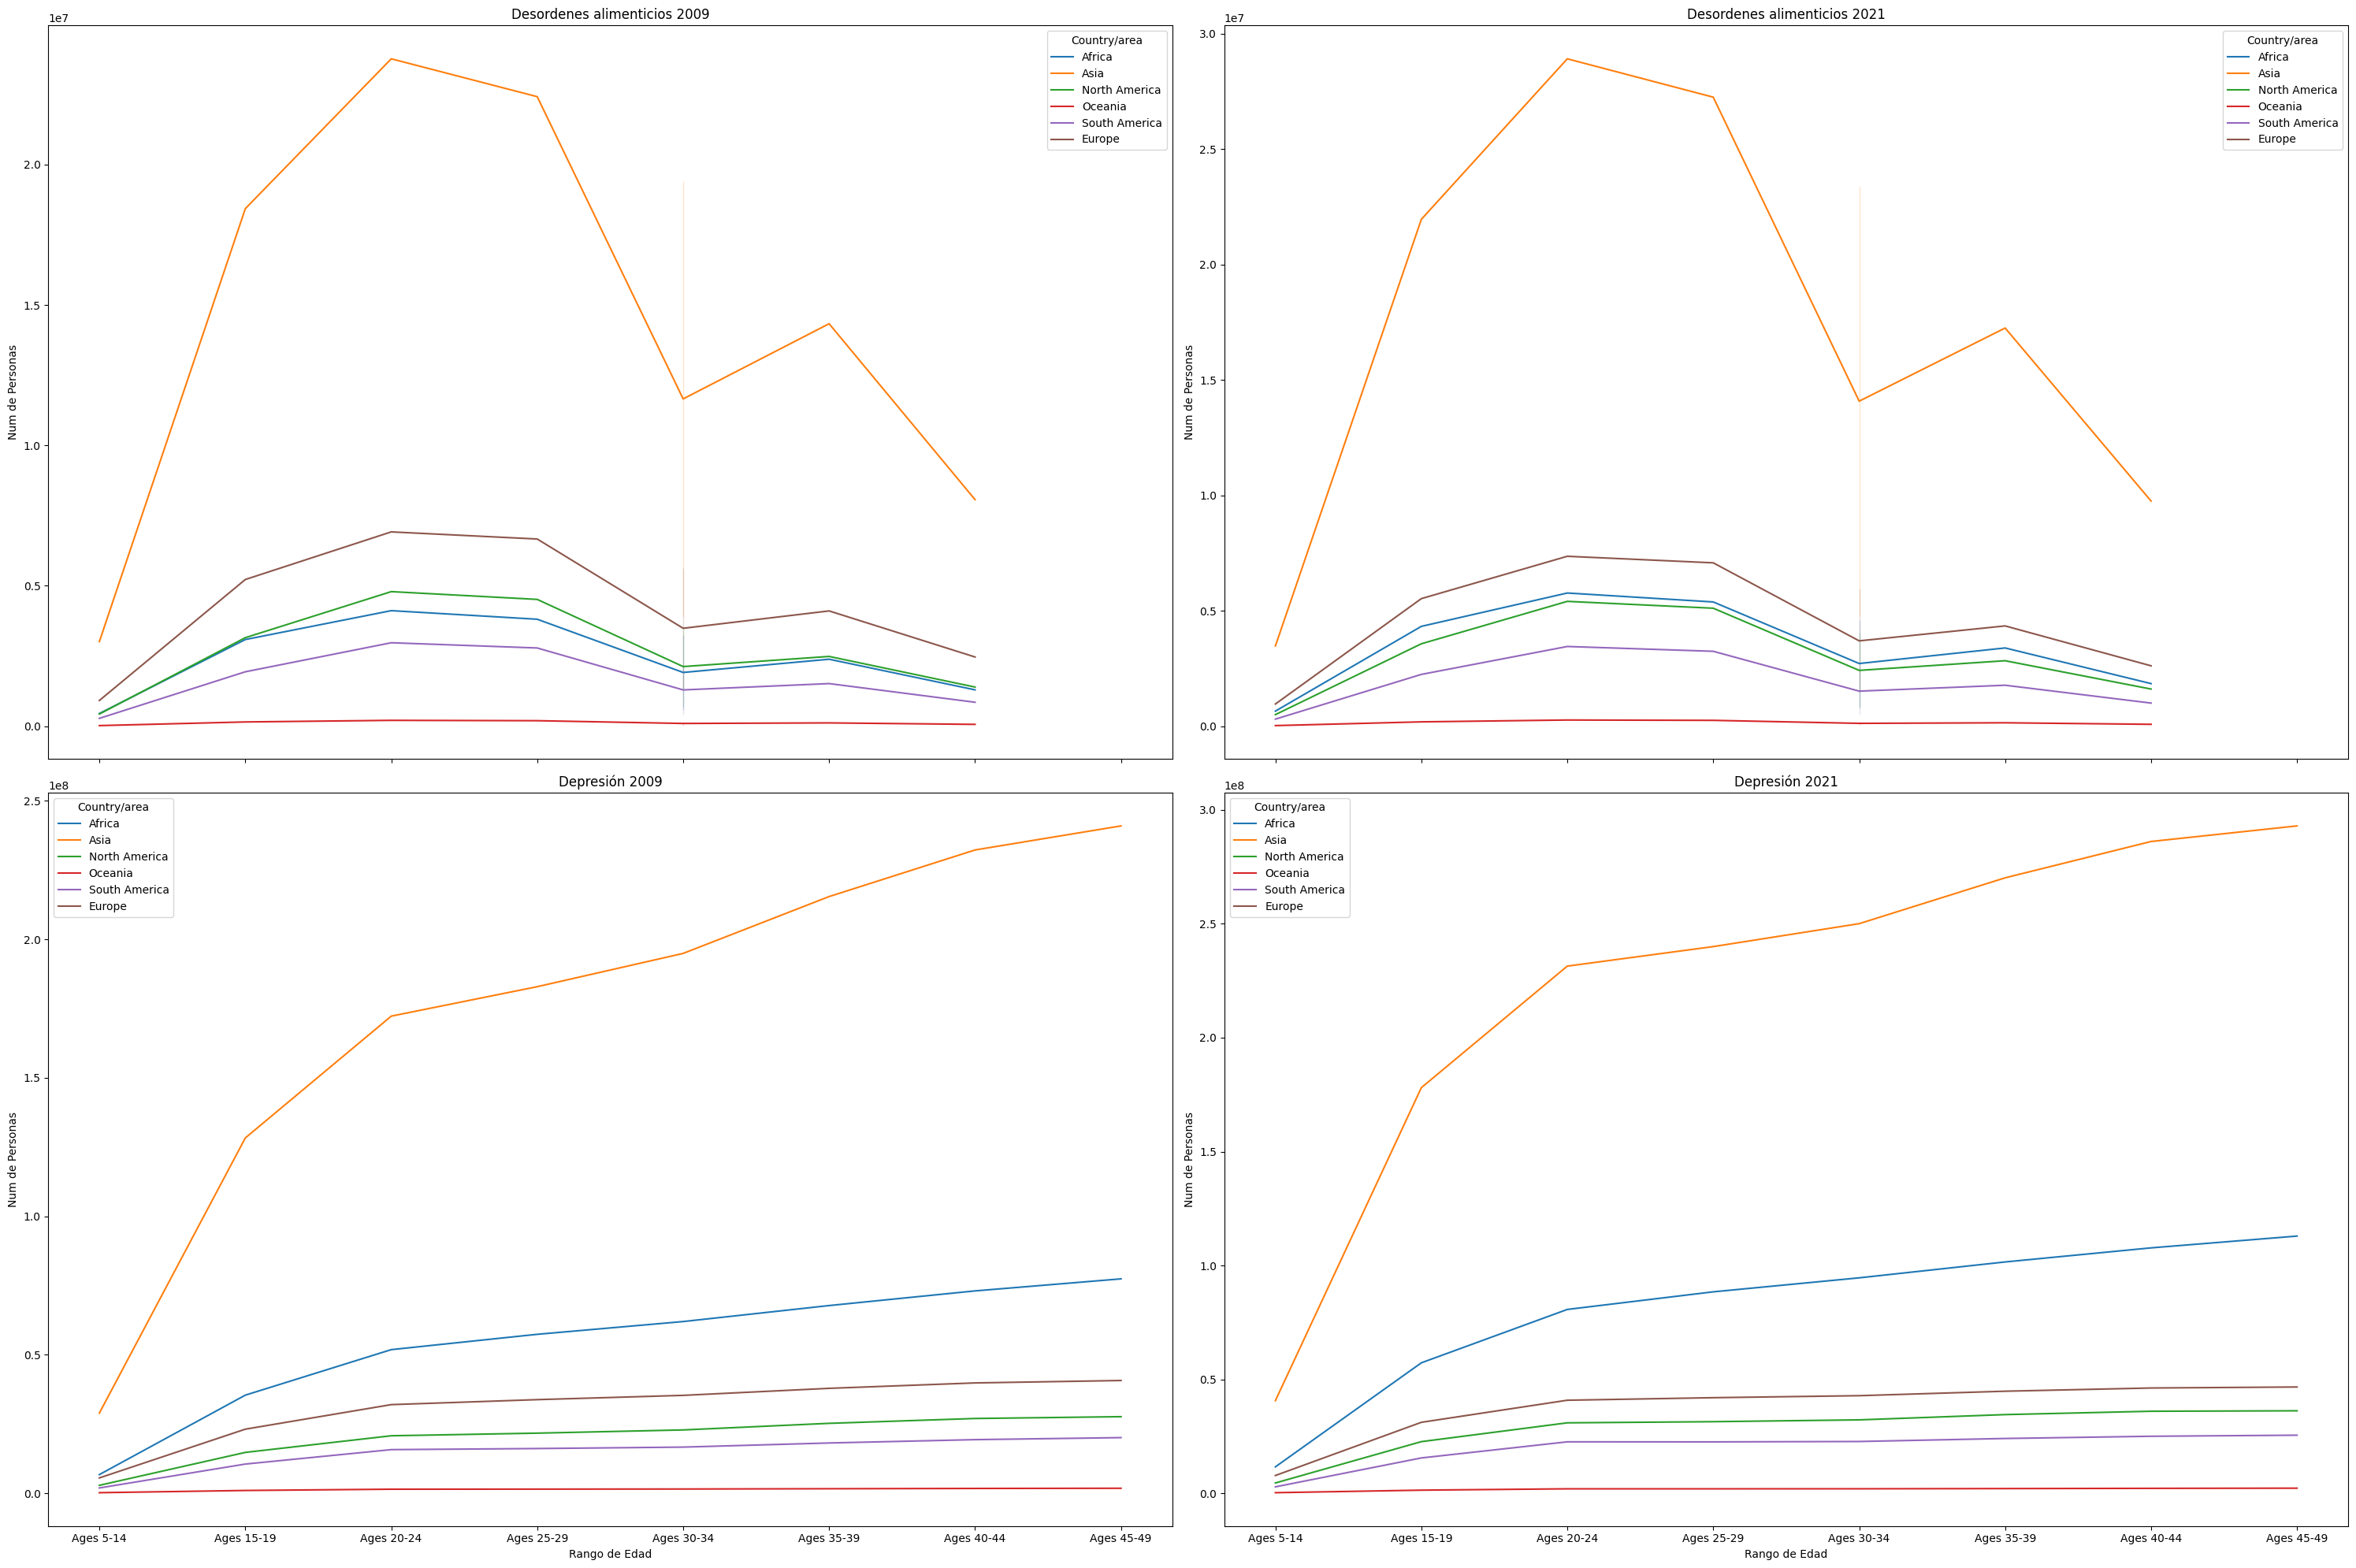

In [472]:
f, axes = plt.subplots(2,2, figsize=(30,20), sharex=True)
sns.lineplot(m_melted, x='Rango de Edad', y='Num de Personas', hue='Country/area', color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Desordenes alimenticios 2009')
sns.lineplot(n_melted, x='Rango de Edad', y='Num de Personas', hue='Country/area', color="olive", ax=axes[0, 1])
axes[0, 1].set_title('Desordenes alimenticios 2021')

sns.lineplot(q_melted, x='Rango de Edad', y='Num de Personas', hue='Country/area', color="teal", ax=axes[1, 0])
axes[1, 0].set_title('Depresión 2009')
sns.lineplot(p_melted, x='Rango de Edad', y='Num de Personas', hue='Country/area', color="gold", ax=axes[1, 1])
axes[1, 1].set_title('Depresión 2021')
# Ajustar el diseño
plt.tight_layout()
plt.show()

En este primer análisis vemos que los desórdenes alimenticios de todos los continentes alcanzan sus valores máximos en adultos jóvenes y los de depresión en edades más avanzadas.

-----------------

Vamos a estudiar si existe una cierta causalidad entre el aumento de estas enfermedaes mentales en cada edad y el uso de redes sociales. Para tener una visión más específica, vamos a analizar estos datos por continentes. Para ellos haremos una correlación de cada caso y estudiaremos que nos indica el p_valor

In [473]:
'''Hacemos una separación de los datos por los paises de cada continente'''
dep_age_21_africa=dep_age_21.loc[:,cont_paises["Africa"]]
dep_age_21_asia=dep_age_21.loc[:,cont_paises["Asia"]]
dep_age_21_oceania=dep_age_21.loc[:,cont_paises["Oceania"]]
dep_age_21_sa=dep_age_21.loc[:,cont_paises["South America"]]
dep_age_21_na=dep_age_21.loc[:,cont_paises["North America"]]
dep_age_21_eu=dep_age_21.loc[:,cont_paises["Europe"]]

dep_age_09_africa=dep_age_09.loc[:,cont_paises["Africa"]]
dep_age_09_asia=dep_age_09.loc[:,cont_paises["Asia"]]
dep_age_09_oceania=dep_age_09.loc[:,cont_paises["Oceania"]]
dep_age_09_sa=dep_age_09.loc[:,cont_paises["South America"]]
dep_age_09_na=dep_age_09.loc[:,cont_paises["North America"]]
dep_age_09_eu=dep_age_09.loc[:,cont_paises["Europe"]]

eat_age_09_africa=eat_age_09.loc[:,cont_paises["Africa"]]
eat_age_09_asia=eat_age_09.loc[:,cont_paises["Asia"]]
eat_age_09_oceania=eat_age_09.loc[:,cont_paises["Oceania"]]
eat_age_09_sa=eat_age_09.loc[:,cont_paises["South America"]]
eat_age_09_na=eat_age_09.loc[:,cont_paises["North America"]]
eat_age_09_eu=eat_age_09.loc[:,cont_paises["Europe"]]

eat_age_21_africa=eat_age_21.loc[:,cont_paises["Africa"]]
eat_age_21_asia=eat_age_21.loc[:,cont_paises["Asia"]]
eat_age_21_oceania=eat_age_21.loc[:,cont_paises["Oceania"]]
eat_age_21_sa=eat_age_21.loc[:,cont_paises["South America"]]
eat_age_21_na=eat_age_21.loc[:,cont_paises["North America"]]
eat_age_21_eu=eat_age_21.loc[:,cont_paises["Europe"]]




Tenemos que tener en cuenta que los datos de redes sociales no están dividios por edades. Vamos a hacer un análisis por continentes para ver si podemos obtener algunos datos relevantes. Para empezar vamos a hacer uso de la columna que habíamos eliminado de nuestro dataset de edades referido a "All Ages". Vamos a usar esta columna para ver si puede exisitir una cierta correlación entre los datos de "All ages" por contientes y los de Redes soiales por continentes.

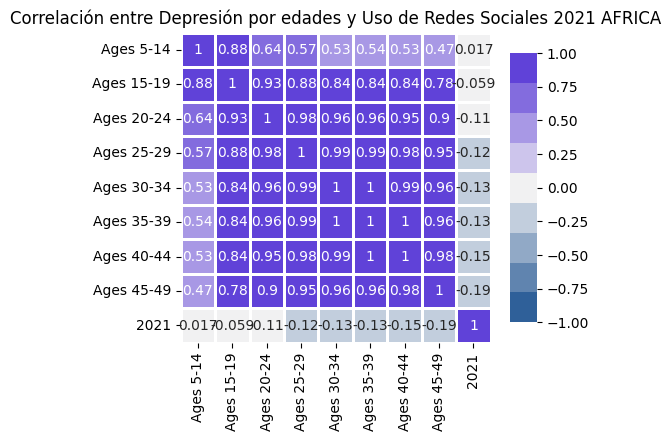

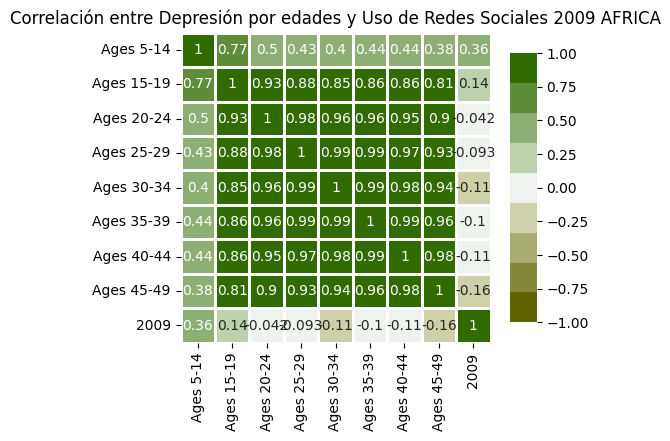

In [474]:
dep_af=pd.concat([dep_age_21_africa.T,(s_m_africa.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(dep_af.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2021 AFRICA");
correl=pd.concat([dep_age_09_africa.T,(s_m_africa.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2009 AFRICA");

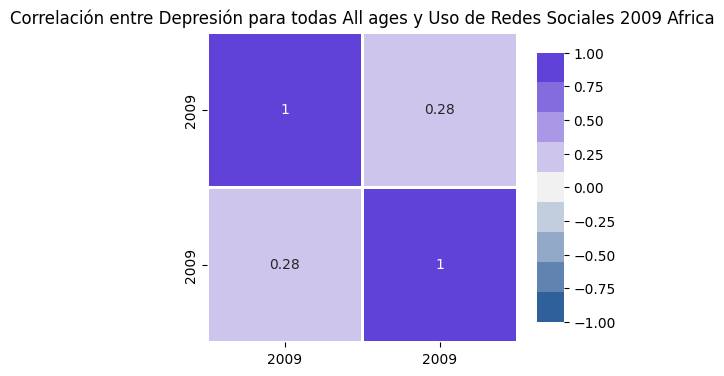

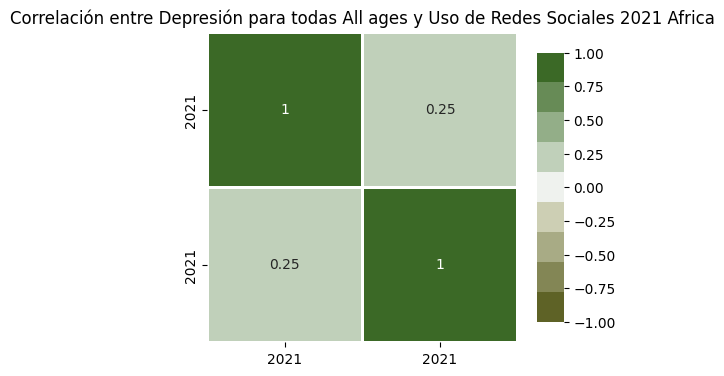

In [475]:
ex=eat_all.loc["Africa",["2009"]]
ex=eat_all.loc[cont_paises["Africa"],["2009"]]
ex1=(ex*pob_09["Africa"])/100
dep_all_af=pd.concat([ex1,(s_m_africa.T)["2009"].T],axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dep_all_af.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión para todas All ages y Uso de Redes Sociales 2009 Africa");

e=eat_all.loc["Africa",["2021"]]
e=eat_all.loc[cont_paises["Africa"],["2021"]]
e1=(e*pob_09["Africa"])/100
dep_all_eu=pd.concat([e1,(s_m_africa.T)["2021"].T],axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dep_all_eu.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión para todas All ages y Uso de Redes Sociales 2021 Africa");

In [476]:
'''Valores de All age'''
p_v_dep_09_af=test_corr(0.25,54)
p_v_dep_21_af=test_corr(0.28,54)
print(f"El p_valor de Africa en 2009 es: {p_v_dep_09_af}")
print(f"El p_valor de Africa en 2021 es: {p_v_dep_21_af}")

El p_valor de Africa en 2009 es: 0.06827286775782446
El p_valor de Africa en 2021 es: 0.040301618745325764


In [477]:
'''Valores de todas las edades'''
p_v_dep_09_af=test_corr(-0.16,54)
p_v_dep_21_af=test_corr(0.059,54)
print(f"El p_valor de Africa en 2009 es: {p_v_dep_09_af}")
print(f"El p_valor de Africa en 2021 es: {p_v_dep_21_af}")

El p_valor de Africa en 2009 es: 0.2478007667157983
El p_valor de Africa en 2021 es: 0.6717230570479216


Si analizamos los datos por edades podemos decir que no existe una causa directa entre los datos, ya que en ningún caso obtenemos un valor menor al umbral de 0.05. Sin embargo al analizarlos tomando los valores de todas las edades si que nos sale una correlación significativa. Esto quieres decir que no poidemos ealizar el estudio por edades por separado.

- *Este estudio no es válido, pero veamos de todos modos las correlaciones que obtenemos para ver si podemos considerar algún dato válido*

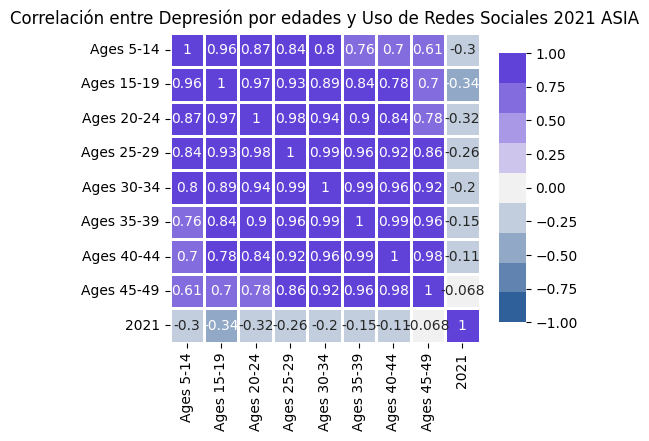

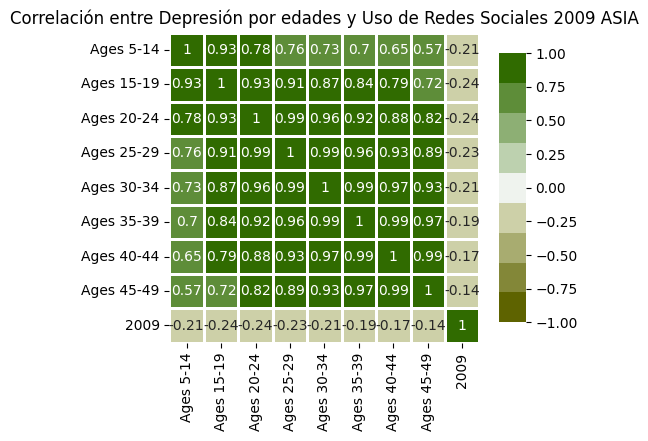

In [478]:
correl=pd.concat([dep_age_21_asia.T,(s_m_asia.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2021 ASIA");

correl1=pd.concat([dep_age_09_asia.T,(s_m_asia.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2009 ASIA");

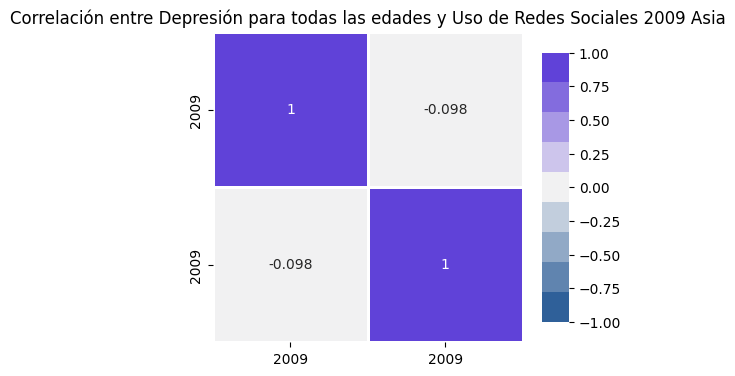

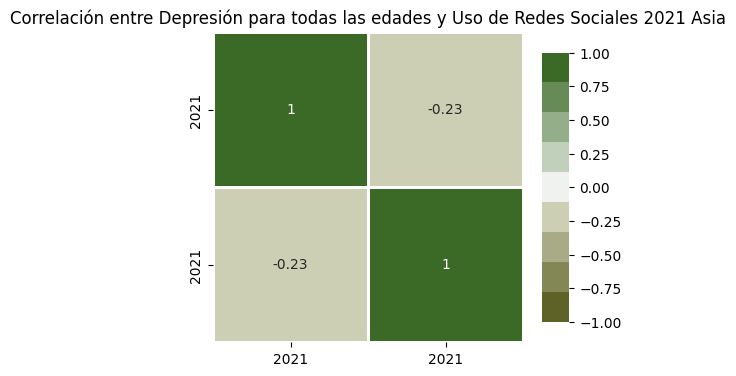

In [479]:
ex=eat_all.loc["Asia",["2009"]]
ex=eat_all.loc[cont_paises["Asia"],["2009"]]
ex1=(ex*pob_09["Asia"])/100
dep_all_as=pd.concat([ex1,(s_m_asia.T)["2009"].T],axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dep_all_as.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión para todas las edades y Uso de Redes Sociales 2009 Asia");

e=eat_all.loc["Asia",["2021"]]
e=eat_all.loc[cont_paises["Asia"],["2021"]]
e1=(e*pob_09["Asia"])/100
dep_all_as=pd.concat([e1,(s_m_asia.T)["2021"].T],axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dep_all_as.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión para todas las edades y Uso de Redes Sociales 2021 Asia");

En Asia tenemos unos valores de correlación todos negativos, por lo que no vamos a obtener una causalidad directa entre los datos

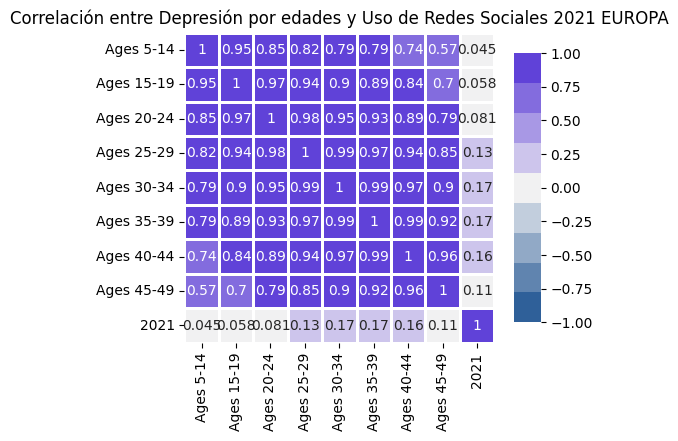

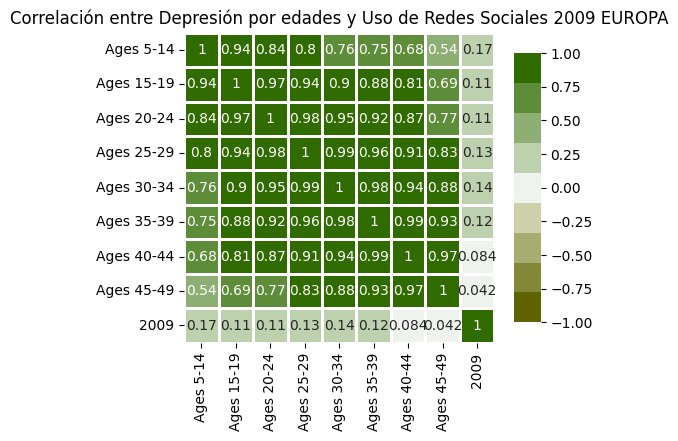

In [480]:
correl=pd.concat([dep_age_21_eu.T,(s_m_eu.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2021 EUROPA");

correl1=pd.concat([dep_age_09_eu.T,(s_m_eu.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2009 EUROPA");

In [481]:
p_v_dep_09_eu=test_corr(0.17,46)
p_v_dep_21_eu=test_corr(0.0045,46)
print(f"El p_valor de Europa en 2009 es: {p_v_dep_09_eu}")
print(f"El p_valor de Europa en 2021 es: {p_v_dep_21_eu}")

El p_valor de Europa en 2009 es: 0.2586826030252087
El p_valor de Europa en 2021 es: 0.9763217290764327


No existe un relación directa entre las variables, ya que se supera el umbral del test de correlación

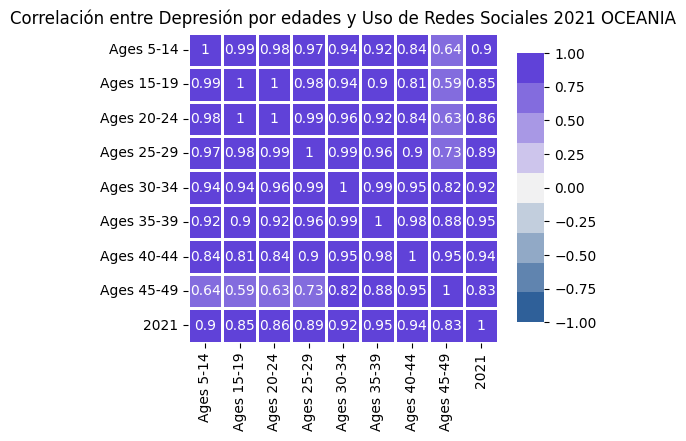

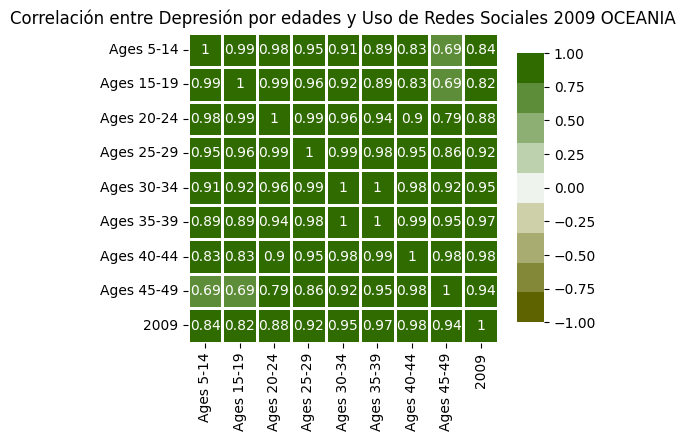

In [482]:
correl=pd.concat([dep_age_21_oceania.T,(s_m_oceania.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2021 OCEANIA");

correl1=pd.concat([dep_age_09_oceania.T,(s_m_oceania.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2009 OCEANIA");

In [483]:
p_v_dep_09_oc=test_corr(0.82,15)
p_v_dep_21_oc=test_corr(0.95,15)
print(f"El p_valor de Europa en 2009 es: {p_v_dep_09_oc}")
print(f"El p_valor de Europa en 2021 es: {p_v_dep_21_oc}")

El p_valor de Europa en 2009 es: 0.00018168506771117681
El p_valor de Europa en 2021 es: 6.08625795805396e-08


En ambos años vemos que existe una correlación directa entre las variables, ya que los p_valores se quedan muy por debajo del umbral de 0.05. En general todas las edades tiene altos valores de correlación, aunque cabe destacar en 2009 las edades de 45-49 años y en 20021 en edades de 35-39 años

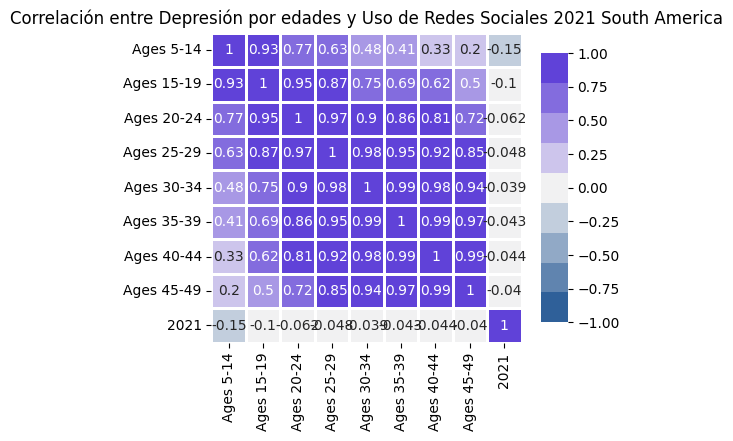

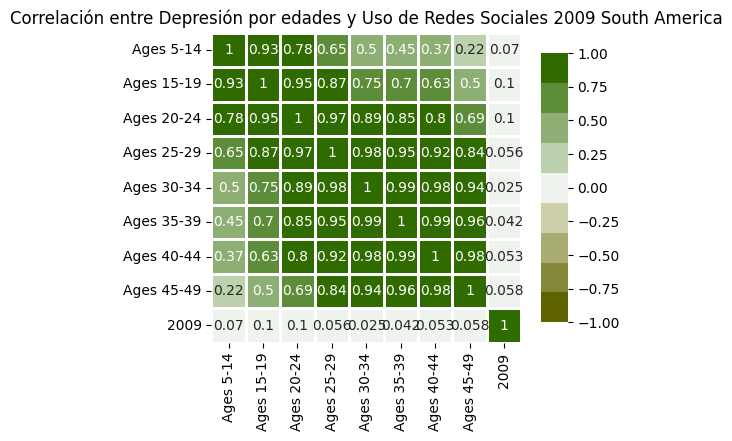

In [484]:
correl=pd.concat([dep_age_21_sa.T,(s_m_sa.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2021 South America");

correl1=pd.concat([dep_age_09_sa.T,(s_m_sa.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2009 South America");

In [485]:
p_v_dep_09_sa=test_corr(0.1,22)
p_v_dep_21_sa=test_corr(-0.1,22)
print(f"El p_valor de SA en 2009 es: {p_v_dep_09_sa}")
print(f"El p_valor de SA en 2021 es: {p_v_dep_21_sa}")

El p_valor de SA en 2009 es: 0.6579281751567844
El p_valor de SA en 2021 es: 0.6579281751567844


No existe una relación directa en ninguno de los años

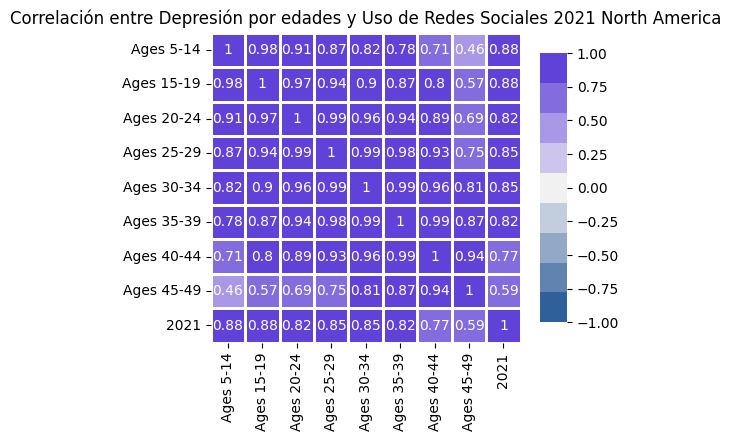

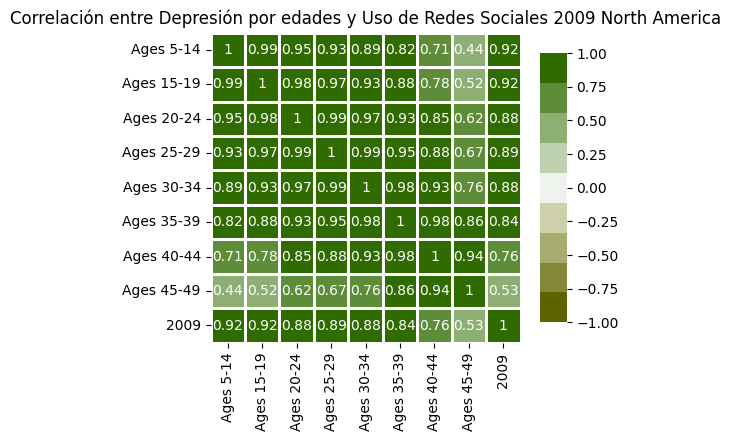

In [486]:
correl=pd.concat([dep_age_21_na.T,(s_m_na.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2021 North America");

correl1=pd.concat([dep_age_09_na.T,(s_m_na.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2009 North America");

In [487]:
p_v_dep_09_na=test_corr(0.53,14)
p_v_dep_21_na=test_corr(0.59,14)
print(f"El p_valor de NA en 2009 es: {p_v_dep_09_na}")
print(f"El p_valor de NA en 2021 es: {p_v_dep_21_na}")

El p_valor de NA en 2009 es: 0.051244788664443486
El p_valor de NA en 2021 es: 0.026353967052061694


En N.America siq ue podemos decir que existe una causa directa entre la depresión y el uso de redes en todas las edades, destacandos los rangos de edad de 5-20 años

Veamos ahora la correlación para los desórdenes alimenticios por paises en cada continente

In [488]:
all_pop_eu_09=(eat_all.loc["Europe","2009"]*100)/pob_09["Europe"]
all_pop_af_09=(eat_all.loc["Africa","2009"]*100)/pob_09["Africa"]

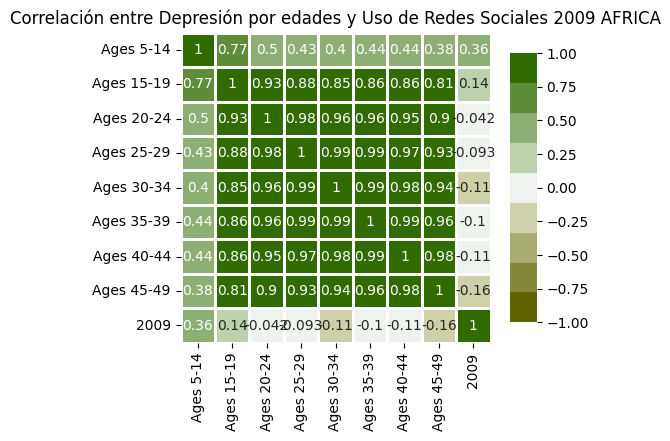

In [489]:
correl=pd.concat([dep_age_09_africa.T,(s_m.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre Depresión por edades y Uso de Redes Sociales 2009 AFRICA");

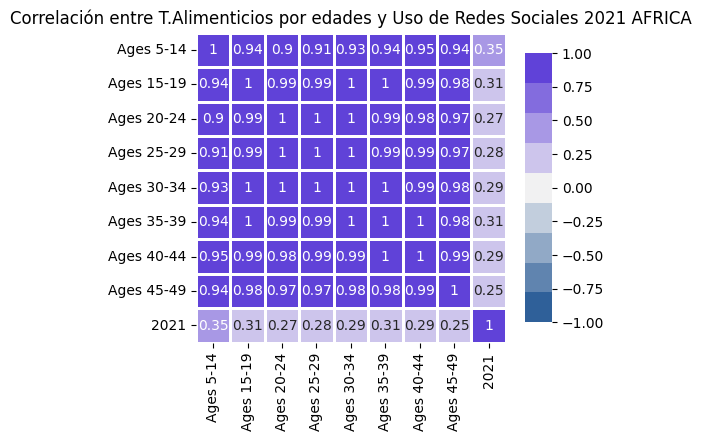

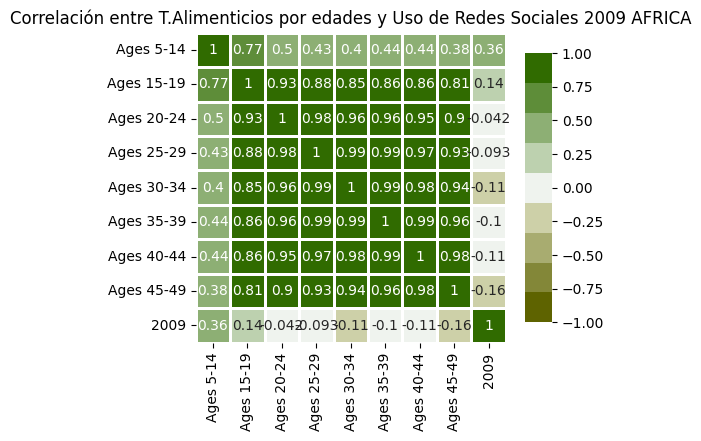

In [490]:
dep_af=pd.concat([eat_age_21_africa.T,(s_m_africa.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(dep_af.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2021 AFRICA");
correl=pd.concat([dep_age_09_africa.T,(s_m_africa.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2009 AFRICA");

In [491]:
p_v_eat_09_af=test_corr(0.36,54)
p_v_eat_21_af=test_corr(0.25,54)
print(f"El p_valor de Africa en 2009 es: {p_v_eat_09_af}")
print(f"El p_valor de Africa en 2021 es: {p_v_eat_21_af}")

El p_valor de Africa en 2009 es: 0.007498643807975737
El p_valor de Africa en 2021 es: 0.06827286775782446


    Evaluando los datos vemos que, en general, no existe una relación directa entre los datos en 2009. Sin embargo en 2021 si que tenemos una correlación condatos que superan el umbral alfa=0.05, lo que nos indica que puede existir cierta relación directa entre el uso de redes sociales y los trastornos alimneticios, destancado edades de 5-20 años

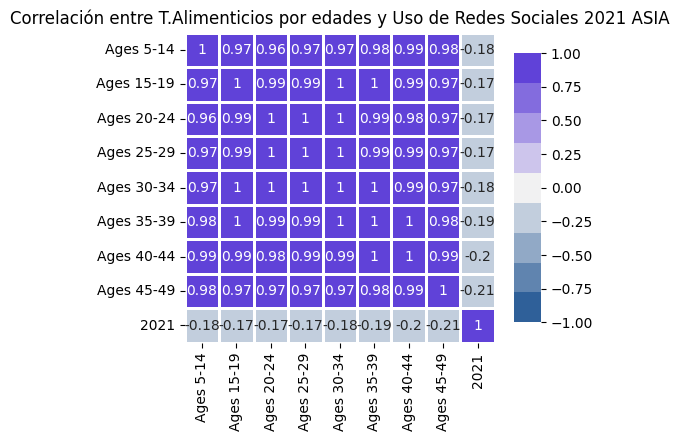

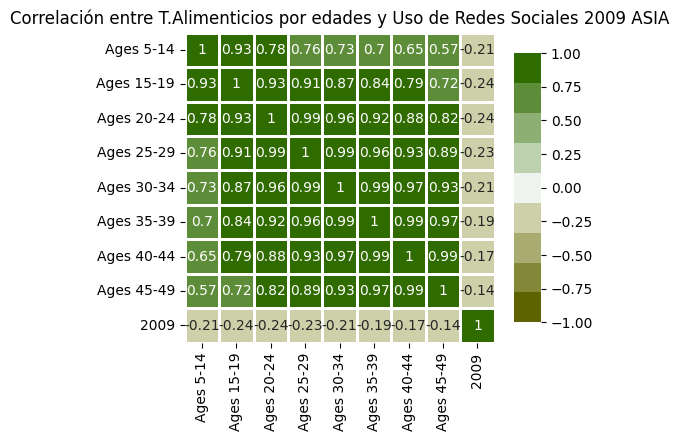

In [492]:
correl=pd.concat([eat_age_21_asia.T,(s_m_asia.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2021 ASIA");

correl1=pd.concat([dep_age_09_asia.T,(s_m_asia.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2009 ASIA");

En este caso estamos obteniendo valores negativos, lo que nos indica que los datos no va a tener una relación directa positiva

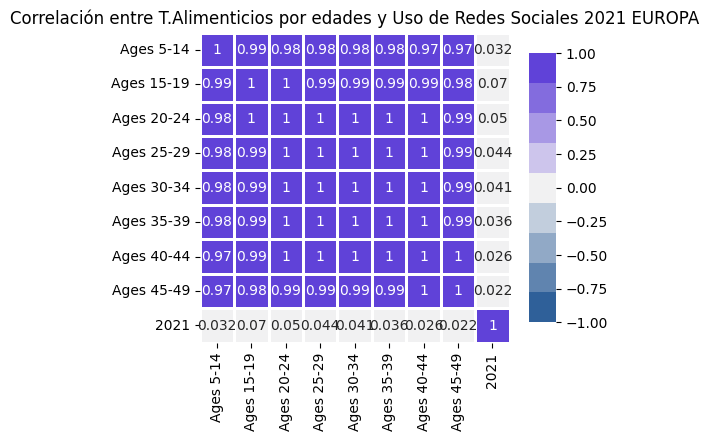

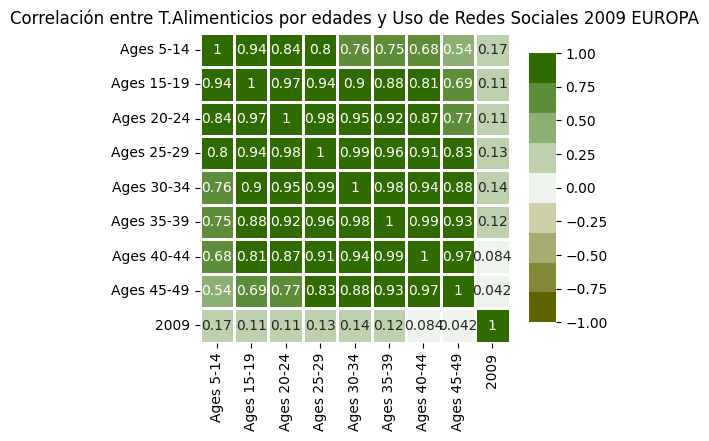

In [493]:
correl=pd.concat([eat_age_21_eu.T,(s_m_eu.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2021 EUROPA");

correl1=pd.concat([dep_age_09_eu.T,(s_m_eu.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2009 EUROPA");

In [494]:
p_v_eat_09_eu=test_corr(0.17,46)
p_v_eat_21_eu=test_corr(0.07,46)
print(f"El p_valor de Eu en 2009 es: {p_v_eat_09_eu}")
print(f"El p_valor de Eu en 2021 es: {p_v_eat_21_eu}")

El p_valor de Eu en 2009 es: 0.2586826030252087
El p_valor de Eu en 2021 es: 0.6438912059771805


En Europa no podemos asegurar una correlación entre los datos, ya que no pasan el test de correlación

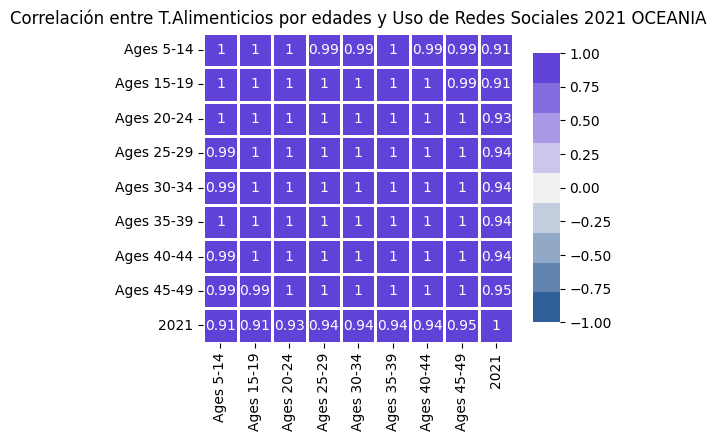

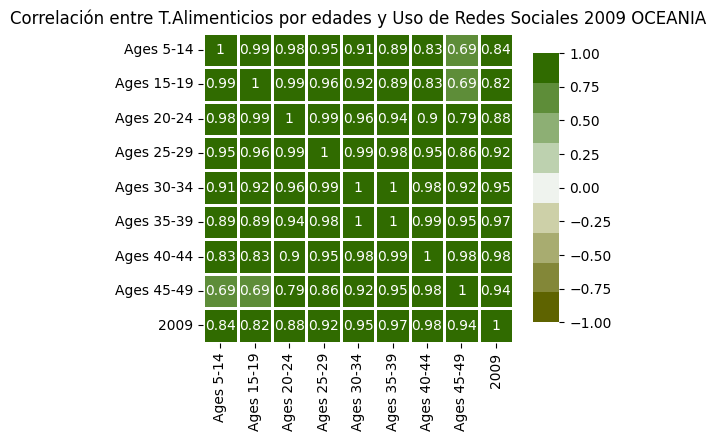

In [495]:
correl=pd.concat([eat_age_21_oceania.T,(s_m_oceania.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2021 OCEANIA");

correl1=pd.concat([dep_age_09_oceania.T,(s_m_oceania.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2009 OCEANIA");

In [496]:
p_v_eat_09_oc=test_corr(0.82,15)
p_v_eat_21_oc=test_corr(0.91,15)
print(f"El p_valor de Oceania en 2009 es: {p_v_eat_09_oc}")
print(f"El p_valor de Oceania en 2021 es: {p_v_eat_21_oc}")

El p_valor de Oceania en 2009 es: 0.00018168506771117681
El p_valor de Oceania en 2021 es: 2.5178868349307316e-06


En Oceaníavemos una relación directa entre los valores comparados, ya que los p_valores son menores que 0.05(umbral). En este caso la edad más afectada es 40-44 años, aunque todas las edades tienen una alta correlación

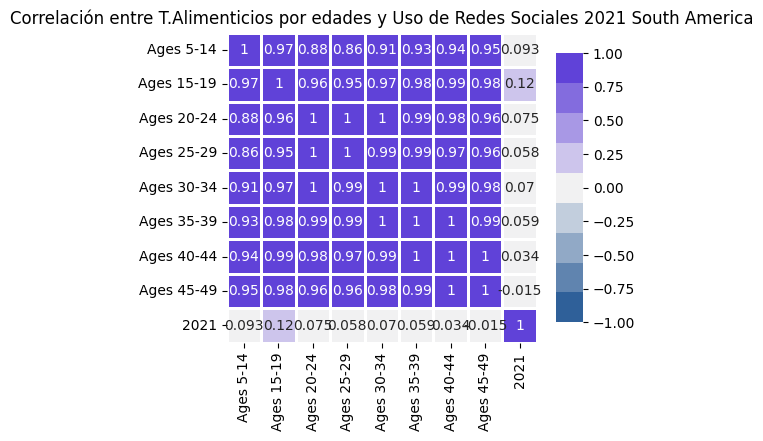

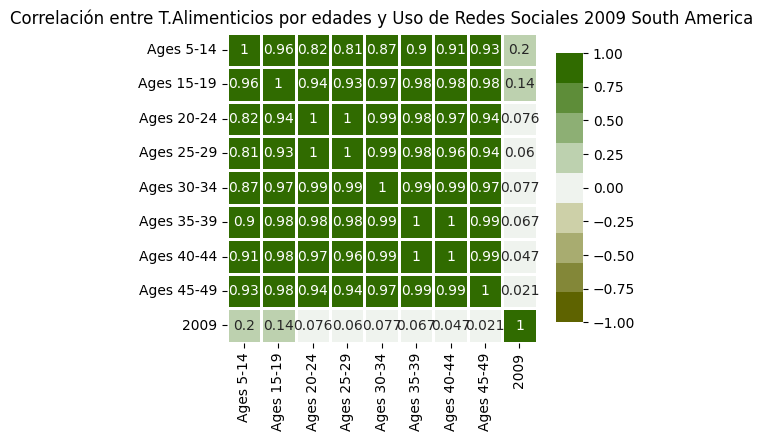

In [497]:
correl=pd.concat([eat_age_21_sa.T,(s_m_sa.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2021 South America");

correl1=pd.concat([eat_age_09_sa.T,(s_m_sa.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2009 South America");

In [498]:
p_v_eat_09_sa=test_corr(0.14,22)
p_v_eat_21_sa=test_corr(0.12,22)
print(f"El p_valor de S.A en 2009 es: {p_v_eat_09_sa}")
print(f"El p_valor de S.A en 2021 es: {p_v_eat_21_sa}")

El p_valor de S.A en 2009 es: 0.5343363231557807
El p_valor de S.A en 2021 es: 0.594778740370842


En S. America no podemos asegurar que exista una relación directa ya que supera el umbral de alpha=0.05

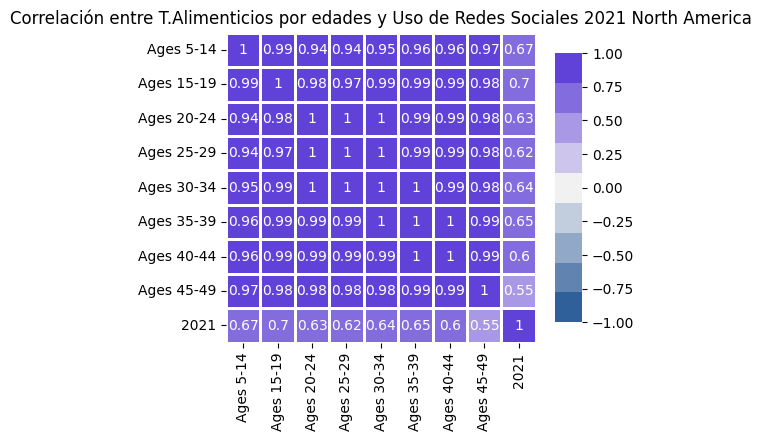

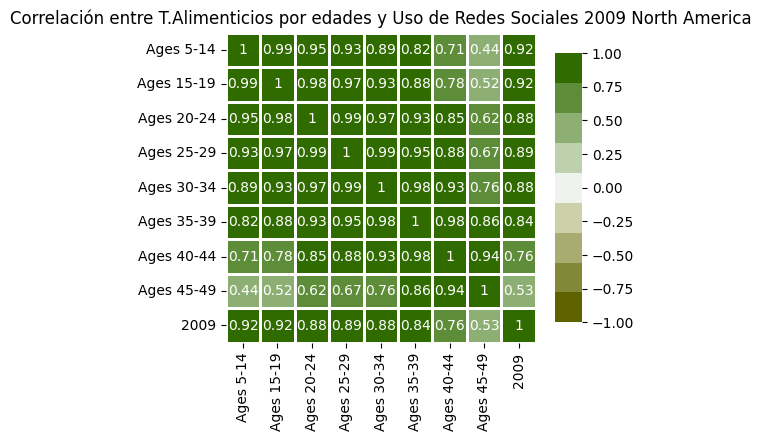

In [499]:
correl=pd.concat([eat_age_21_na.T,(s_m_na.T)["2021"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(250,270, s=80, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2021 North America");

correl1=pd.concat([dep_age_09_na.T,(s_m_na.T)["2009"]],axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(correl1.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(90, 120, s=100, l=40, n=9),
            square=True,
            linewidths=.9,
            cbar_kws={'shrink': 0.7, 'aspect': 10},
            annot=True);
plt.title("Correlación entre T.Alimenticios por edades y Uso de Redes Sociales 2009 North America");

In [500]:
p_v_eat_09_na=test_corr(0.53,14)#tenemos 14 paises
p_v_eat_21_na=test_corr(0.7,14)
print(f"El p_valor de N.A en 2009 es: {p_v_eat_09_na}")
print(f"El p_valor de N.A en 2021 es: {p_v_eat_21_na}")

El p_valor de N.A en 2009 es: 0.051244788664443486
El p_valor de N.A en 2021 es: 0.005313727160507807


En ambos años vemos que se supera el umbral, incluso on los valores más bajos. Por tanto podríamos afirmar que en N.America existe una relación directa entre los desórdenes alimneticios y el consumo de redes sociales, destacando edades de 5-19 años.

- ### RESULTADOS
A pesar de que la relación entre la prevalencia de depresión y el uso de redes sociales no es significativa en la mayoría de los continentes, en North America y Oceania sí se observó una correlación válida. Esto sugiere que, en ciertos contextos, estas variables pueden estar relacionadas, posiblemente debido a factores culturales, económicos o tecnológicos propios de estas regiones, o incluso a la concepción de cada región sobre la salud mental. 

Respecto a la hipótesis de que existe una mayor relación entre el uso de redes y las enfermedades mentales en adolescentes y adultos jóvenes no podemos validarla con estos datos.

*(En estos datos estamos suponiendo que podemos hacer el análisis, pero verdaderamente necesitaríamos una división por edades en el dataset de los datos de redes sociales. Simplemente se deja hecho el procedimiento a seguir para una futura corrección)*

# **3. SPAIN**

Ahora nos vamos a centrar en España, tengamos en cuenta la población española en cada año:
- 4636 millones en 2009
- 4742 millones en 2021

Los datos de redes sociales los tenemos por número de personas, vamos a comenzar pasándolos a porcentajes para poder hacer una comparacion con los otros datasets

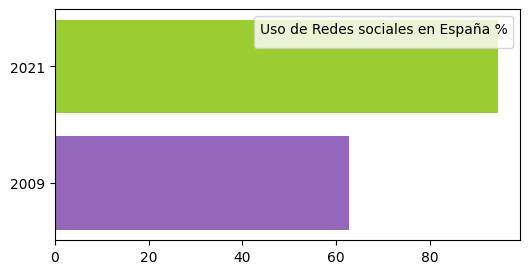

In [501]:
'''Calculamos los porcentajes en españa de los datos de redes sociales de cada año'''
x=(s_m.loc["2009","Spain"]/46360000)*100
y=(s_m.loc["2021","Spain"]/47420000)*100
plt.figure(figsize=(6,3))
plt.barh(y=s_m.index, width=[x,y],color=["#9467bd","#9ACD32"]);
plt.legend(title="Uso de Redes sociales en España %");

In [502]:
print(f"La población española que usaba redes sociales en 2021 respecto a 2009 a aumnetado un {round((y-x),2)}%")

La población española que usaba redes sociales en 2021 respecto a 2009 a aumnetado un 31.75%


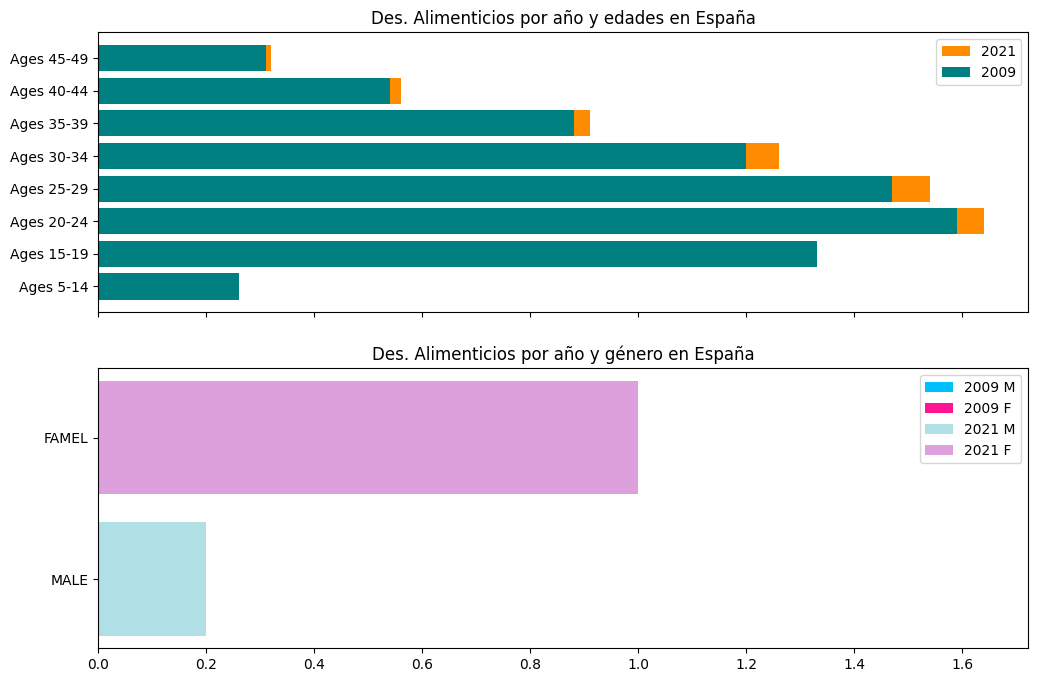

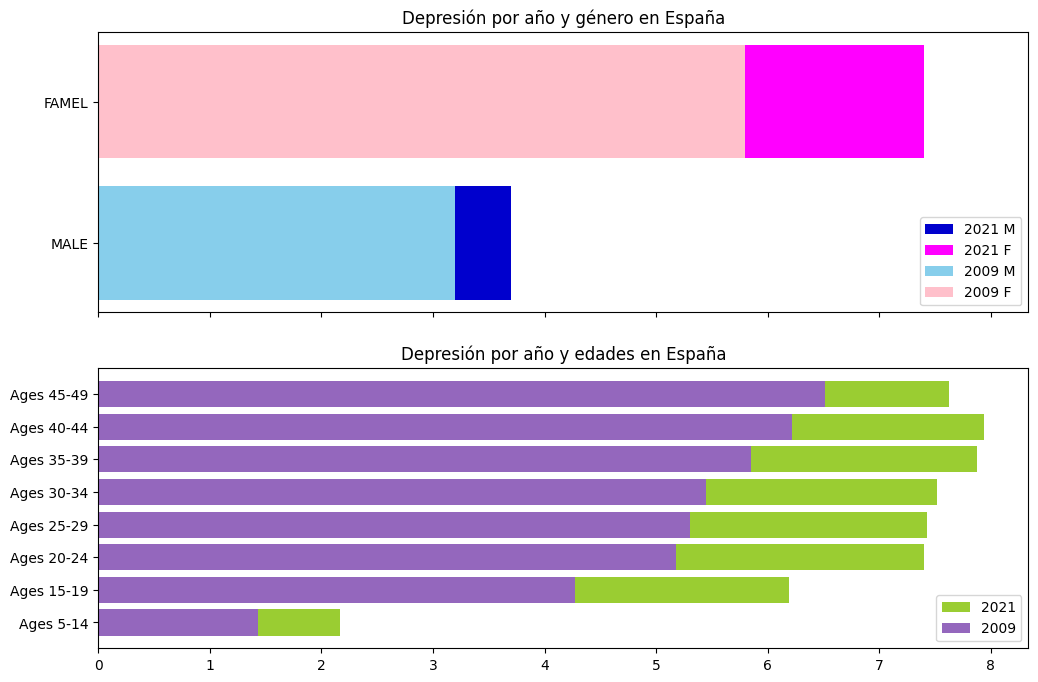

In [503]:
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

'''Desordenes alimenticios por género 2009-21'''
axes[1].barh(y=eat_gen_09.index, width=eat_gen_09["Spain"],color=color2,label =["2009 M","2009 F"]);
axes[1].barh(y=eat_gen_21.index, width=eat_gen_21["Spain"],color=color,label =["2021 M","2021 F"]);
axes[1].set_title("Des. Alimenticios por año y género en España");
axes[1].legend();

'''Desordenes alimenticios por edad 2009-21'''
axes[0].barh(y=eat_age_21.index, width=eat_age_21["Spain"],color="#FF8C00",label ="2021");
axes[0].barh(y=eat_age_09.index, width=eat_age_09["Spain"],color="#008080",label ="2009");
axes[0].set_title("Des. Alimenticios por año y edades en España")
axes[0].legend();
f, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

'''Depresión por género 2009-21'''
axes[0].barh(y=dep_gen_21.index, width=dep_gen_21["Spain"],color=['#0000CD','#FF00FF'],label=["2021 M","2021 F"]);
axes[0].barh(y=dep_gen_09.index, width=dep_gen_09["Spain"],color=['#87CEEB', "#FFC0CB"],label =["2009 M","2009 F"]);
axes[0].set_title("Depresión por año y género en España");
axes[0].legend();
'''Depresión por edad 2009-21'''
axes[1].barh(y=dep_age_21.index, width=dep_age_21["Spain"],color="#9ACD32",label ="2021");
axes[1].barh(y=dep_age_09.index, width=dep_age_09["Spain"],color="#9467bd",label ="2009");
axes[1].set_title("Depresión por año y edades en España");
axes[1].legend();

Podemos ver un gran aumento de ambos trastornos de 2009 a 2021, salvo en desórdenes alimenticios por género, que se mantiene con poca diferencia. Los grupos más afectados por trastornos alimneticios son las mujeres y la población de adultos jóvenes y adolescentes(15-25 años). Sin embargo, en lo que respecta a la depresión vemos un aumneto bastante considerble enntre un año y otro, llegando incluso a la cifra de un 8% de la población Española. Esta enfermedad se acentúa más en edades más adultas, aunque vemos un gran aumento en adolescentes y adultos jóvenes de un año a otro.

Para ser algo más conscientes de los datos con los que estamos tratando, un 8% de la población española en 2021 son 379360 personas



---------------------

Para poder apreciar estos datos de forma más precisa vamos a calcularlas:

In [504]:
'''Para ver la diferencia entre un año  y otro de forma más clara vamos a representarlo en nuevos DataFrame'''
dif_gen_Sp=pd.concat([dep_gen_09["Spain"],dep_gen_21["Spain"]],axis=1)
dif_gen_Sp["diferencia"]= dif_gen_Sp.iloc[:,0]-dif_gen_Sp.iloc[:,1]

dif_age_Sp=pd.concat([dep_age_09["Spain"],dep_age_21["Spain"]],axis=1)
dif_age_Sp["diferencia"]= dif_age_Sp.iloc[:,0]-dif_age_Sp.iloc[:,1]
display("dif_gen_Sp","dif_age_Sp")

dif_gen_Sp
       Spain  Spain  diferencia
Ages                           
MALE     3.2    3.7        -0.5
FAMEL    5.8    7.4        -1.6

dif_age_Sp
            Spain  Spain  diferencia
Ages                                
Ages 5-14    1.43   2.17       -0.74
Ages 15-19   4.27   6.19       -1.92
Ages 20-24   5.18   7.40       -2.22
Ages 25-29   5.30   7.43       -2.13
Ages 30-34   5.45   7.52       -2.07
Ages 35-39   5.85   7.88       -2.03
Ages 40-44   6.22   7.94       -1.72
Ages 45-49   6.51   7.63       -1.12

Acabamos de confirmar que el mayor aumento de depresión en España se da en mujeres y en edades de 20-29 años

In [505]:
dif_gen_Sp_eat=pd.concat([eat_gen_09["Spain"],eat_gen_21["Spain"]],axis=1)
dif_gen_Sp_eat["diferencia"]= dif_gen_Sp_eat.iloc[:,0]-dif_gen_Sp_eat.iloc[:,1]

dif_age_Sp_eat=pd.concat([eat_age_09["Spain"],eat_age_21["Spain"]],axis=1)
dif_age_Sp_eat["diferencia"]= dif_age_Sp_eat.iloc[:,0]-dif_age_Sp_eat.iloc[:,1]


display("dif_gen_Sp_eat","dif_age_Sp_eat")

dif_gen_Sp_eat
       Spain  Spain  diferencia
Ages                           
MALE     0.2    0.2         0.0
FAMEL    1.0    1.0         0.0

dif_age_Sp_eat
            Spain  Spain  diferencia
Ages                                
Ages 5-14    0.26   0.26        0.00
Ages 15-19   1.33   1.29        0.04
Ages 20-24   1.59   1.64       -0.05
Ages 25-29   1.47   1.54       -0.07
Ages 30-34   1.20   1.26       -0.06
Ages 35-39   0.88   0.91       -0.03
Ages 40-44   0.54   0.56       -0.02
Ages 45-49   0.31   0.32       -0.01

Para trastornos de la conducta alimenticia se observa una ligera disminución en adolescentes, pero un aumento en edades comprendidas entre 25 y 34 años

De forma general vemos que en España se ha producido un aumneto en el uso de redes sociales y en trastornos depresivos y alimenticios, lo que puede significar que hay cierta relación entre una mala salud mental y una alta exposición a las plataformas

------------------

## **4.¿Más likes= Más felicidad?**

Con esta última sección vamos a analizar si existe una relación entre las interacciones que se hacen en las redes sociales y las emociones dominantes. El objetivo de esta sección no es hacer un estudio detallado, sino abrir una nueva cuestión y ver un nuevo hilo del que podemos obtener más respuestas a las cuestiones iniciales. También es interesante poder ver como afectan las redes a cómo nos sentimos.

In [506]:
'''Emociones que vamos a ver'''
test["Dominant_Emotion"].unique()

array(['Neutral', 'Anxiety', 'Happiness', 'Boredom', 'Sadness', 'Anger'],
      dtype=object)

In [507]:
#tenemos un dato mal escrito que hay que corregir
test["Gender"]=test["Gender"].replace({"Marie":"Male"})

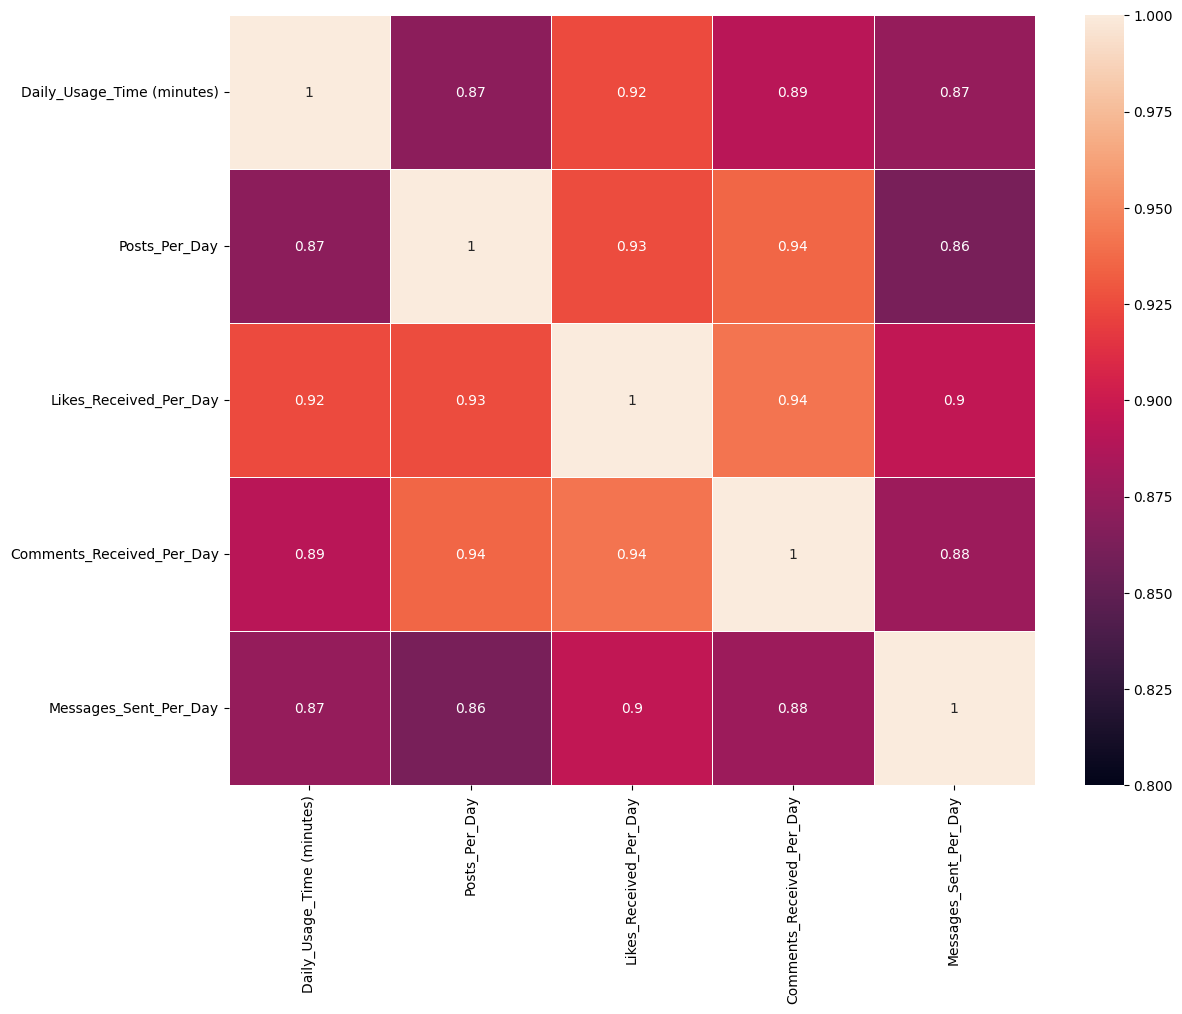

In [508]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(test[['Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day']].corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=0.8,
            vmax=1);

Podemos ver que todas las interacciones que se hacen en redes están muy relacionadas entre si, es decir, cuantos más tiempo se dedica a las redes, más likes, comentarios... se reciben.

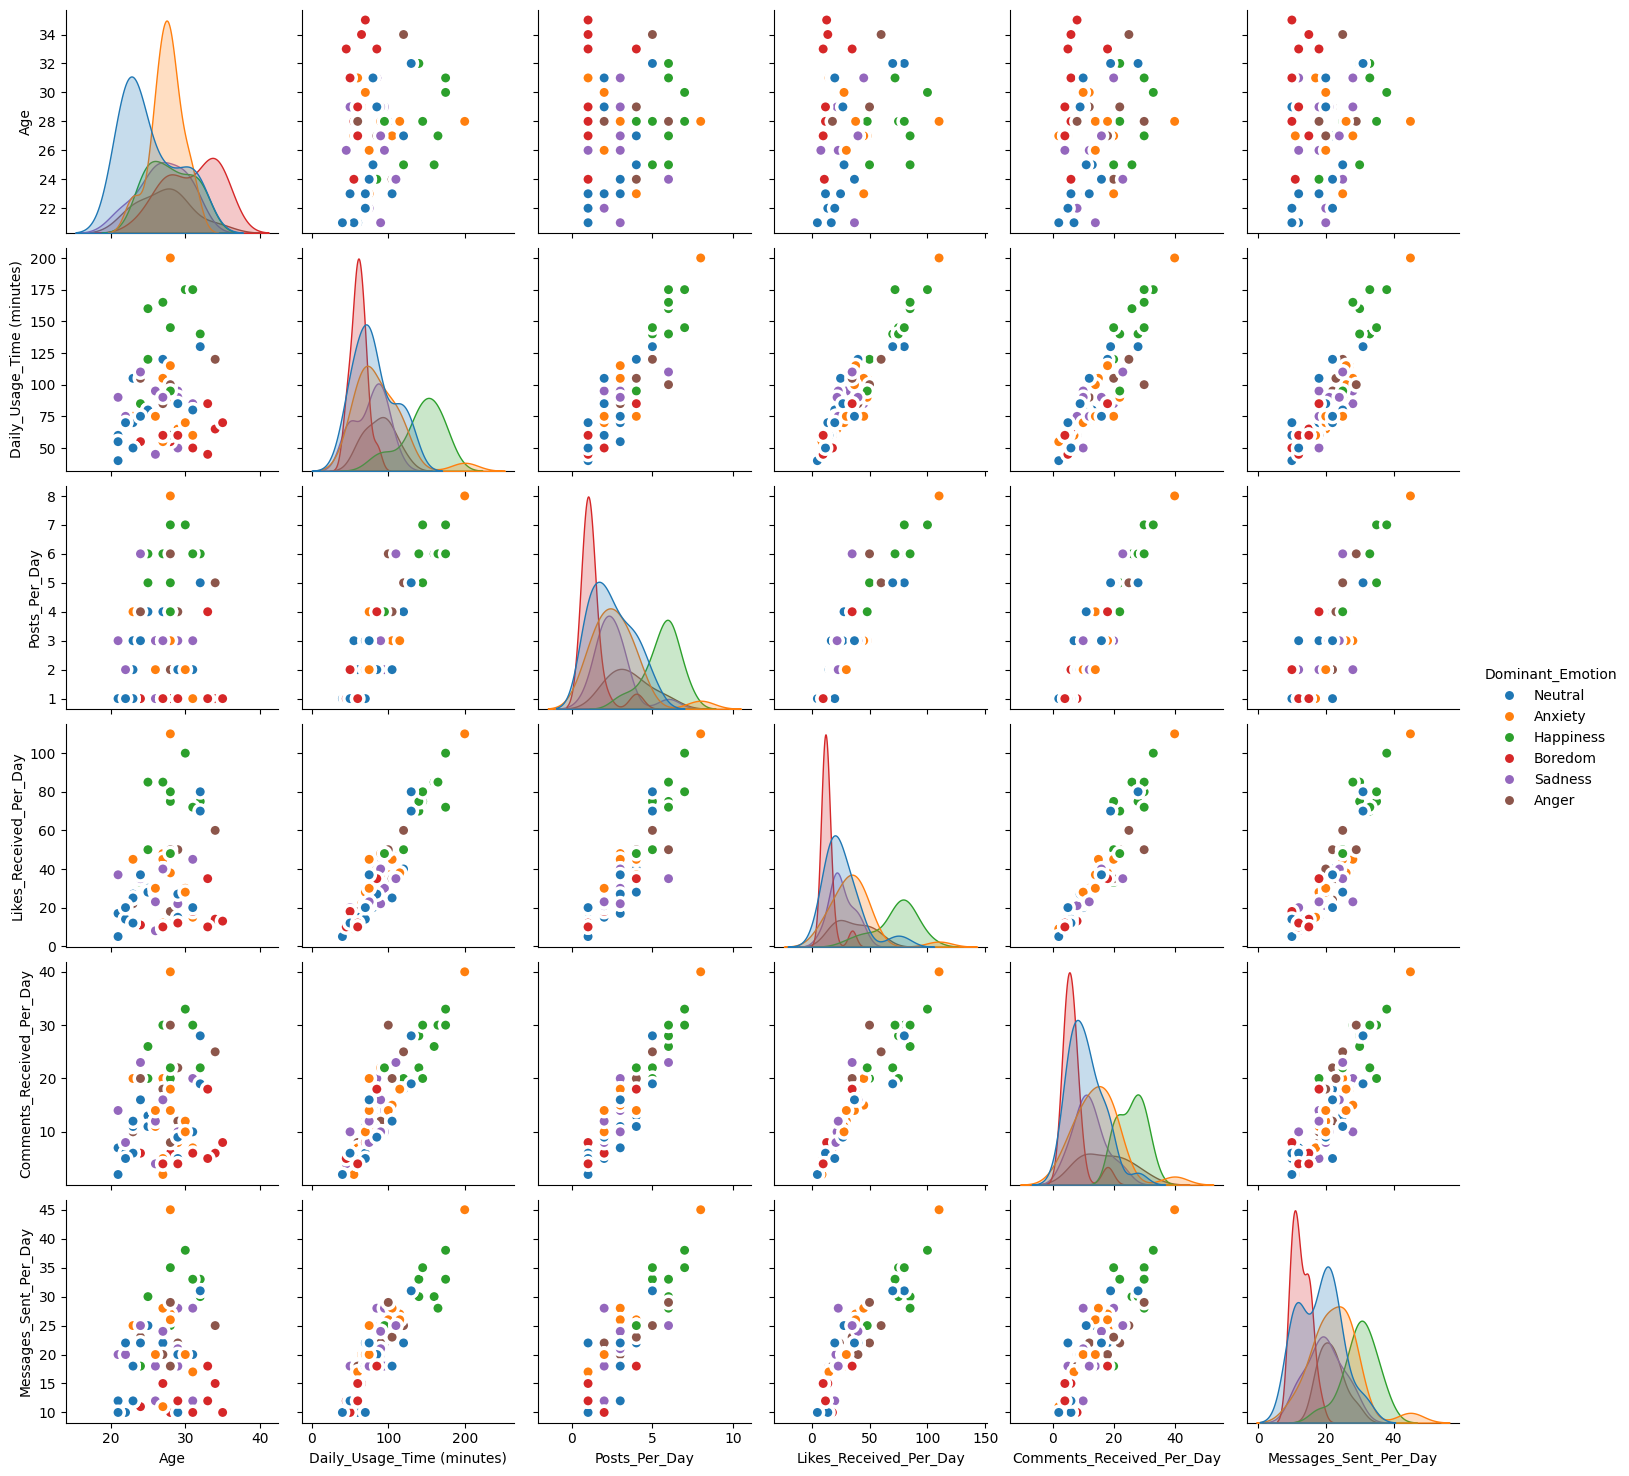

In [509]:
sns.pairplot(test,
             kind="scatter",
             hue="Dominant_Emotion",
             plot_kws=dict(s=80, edgecolor="white",
                           linewidth=2.5));

    Vemos que en los puntos más altos destacan las emociones de "Anxiety" y "Happiness". Los puntos altos en ansiedad podrían sugerir que algunas personas experimentan un incremento en la ansiedad a medida que pasan más tiempo en redes sociales y reciben más "likes". Esto podría deberse a una presión por mantener una imagen o a preocupaciones sobre cómo son percibidas por otros. Los puntos que representan felicidad pueden indicar que un mayor uso de redes sociales, combinado con un mayor número de "likes" recibidos, está asociado a sentimientos de validación y satisfacción. Esto podría reflejar que las personas perciben los "likes" como un reconocimiento positivo, lo que contribuye a su felicidad.

    Tanto la emoción de ansiedad como de felicidad destaca en edades de 20-30, por lo que puede indicarnos que es el rango de edad más condicionado al uso de las plataformas.

    Si nos fijamos en el uso diario, vemos que cuanto más tiempo se pasa en redes más felicidad y ansiedad se siente.

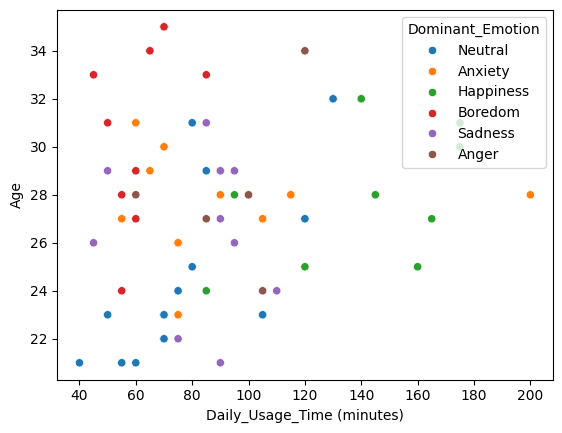

In [510]:
sns.scatterplot(test,
             x="Daily_Usage_Time (minutes)",
             y="Age",
             hue="Dominant_Emotion");

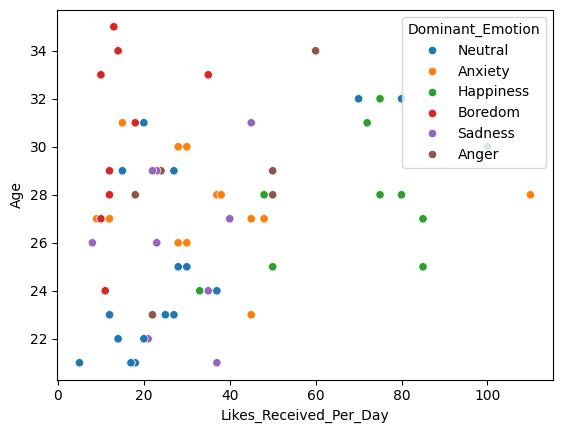

In [511]:
sns.scatterplot(test,
             x='Likes_Received_Per_Day',
             y="Age",
             hue="Dominant_Emotion");

    Podemos ver de forma más clara que en edades menores destaca más el sentimiento de "Sadness cuantos menos *likes* se recibe. Esto puede deberse a que los jóvenes tienden a compartir más sus vidas en redes y pueden buscar la aprobación de sus pares como una forma de construir su identidad y autoestima. Si reciben pocos *likes*, pueden interpretarlo como falta de aceptación o valoración, lo que puede generar tristeza.

--------------------------

# **5.CONCLUSIONES**

A través de este EDA, hemos logrado establecer un punto de partida para abordar las cuestiones iniciales planteadas. El análisis nos ha permitido identificar correlaciones entre los datos, lo que respalda algunas de las hipótesis iniciales y abre la puerta a nuevas líneas de investigación. Al explorar las distintas regiones del mundo, hemos observado una gran variedad de resultados, lo que invita a reflexionar sobre el impacto de las condiciones socioculturales en la salud mental.

En cuanto al uso de las redes sociales, los datos sugieren una posible relación directa con el estado anímico, evidenciando cómo estas plataformas pueden influir en nuestra percepción emocional y mental. Estos hallazgos subrayan la necesidad de reflexionar sobre el papel que las redes sociales desempeñan en nuestra vida diaria y fomentar una mayor conciencia sobre el impacto que la interacción a través de las pantallas puede tener en nuestro bienestar emocional.

Este análisis no solo confirma la complejidad de los factores que influyen en la salud mental, sino que también pone de manifiesto la importancia de seguir investigando cómo los aspectos socioculturales, económicos y tecnológicos interactúan entre sí.